In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.5.0'

In [9]:
import os
from pprint import pprint

tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans/mnist/GAN.model-200000')  # Path to our TensorFlow checkpoint
tf_vars = tf.train.list_variables(tf_path)
pprint(tf_vars)

[('Discriminator/conv0/biases', [64]),
 ('Discriminator/conv0/biases/Adam', [64]),
 ('Discriminator/conv0/biases/Adam_1', [64]),
 ('Discriminator/conv0/u', [1, 64]),
 ('Discriminator/conv0/w', [5, 5, 1, 64]),
 ('Discriminator/conv0/w/Adam', [5, 5, 1, 64]),
 ('Discriminator/conv0/w/Adam_1', [5, 5, 1, 64]),
 ('Discriminator/conv1/biases', [128]),
 ('Discriminator/conv1/biases/Adam', [128]),
 ('Discriminator/conv1/biases/Adam_1', [128]),
 ('Discriminator/conv1/u', [1, 128]),
 ('Discriminator/conv1/w', [5, 5, 64, 128]),
 ('Discriminator/conv1/w/Adam', [5, 5, 64, 128]),
 ('Discriminator/conv1/w/Adam_1', [5, 5, 64, 128]),
 ('Discriminator/conv2/biases', [256]),
 ('Discriminator/conv2/biases/Adam', [256]),
 ('Discriminator/conv2/biases/Adam_1', [256]),
 ('Discriminator/conv2/u', [1, 256]),
 ('Discriminator/conv2/w', [5, 5, 128, 256]),
 ('Discriminator/conv2/w/Adam', [5, 5, 128, 256]),
 ('Discriminator/conv2/w/Adam_1', [5, 5, 128, 256]),
 ('Discriminator/linear/W', [4096, 1]),
 ('Discriminator

In [10]:
import os
from pprint import pprint

tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans_inv_notrain/mnist/GAN.model-20000')  # Path to our TensorFlow checkpoint
tf_vars = tf.train.list_variables(tf_path)
pprint(tf_vars)

[('Discriminator/conv0/biases', [64]),
 ('Discriminator/conv0/u', [1, 64]),
 ('Discriminator/conv0/w', [5, 5, 1, 64]),
 ('Discriminator/conv1/biases', [128]),
 ('Discriminator/conv1/u', [1, 128]),
 ('Discriminator/conv1/w', [5, 5, 64, 128]),
 ('Discriminator/conv2/biases', [256]),
 ('Discriminator/conv2/u', [1, 256]),
 ('Discriminator/conv2/w', [5, 5, 128, 256]),
 ('Discriminator/linear/W', [4096, 1]),
 ('Discriminator/linear/bias', [1]),
 ('Discriminator/linear/u', [1, 1]),
 ('Discriminator_gen/Discriminator/conv0/biases', [64]),
 ('Discriminator_gen/Discriminator/conv0/biases/Adam', [64]),
 ('Discriminator_gen/Discriminator/conv0/biases/Adam_1', [64]),
 ('Discriminator_gen/Discriminator/conv0/u', [1, 64]),
 ('Discriminator_gen/Discriminator/conv0/u/Adam', [1, 64]),
 ('Discriminator_gen/Discriminator/conv0/u/Adam_1', [1, 64]),
 ('Discriminator_gen/Discriminator/conv0/w', [5, 5, 1, 64]),
 ('Discriminator_gen/Discriminator/conv0/w/Adam', [5, 5, 1, 64]),
 ('Discriminator_gen/Discriminato

In [1]:
import torch
import torch.nn as nn
import tensorflow as tf
import os 
import numpy as np
import matplotlib.pyplot as plt


In [6]:
tf.__version__

'2.5.0'

In [7]:
import os
from pprint import pprint

tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans/mnist/GAN.model-200000')  # Path to our TensorFlow checkpoint
tf_vars = tf.train.list_variables(tf_path)
pprint(tf_vars)

[('Discriminator/conv0/biases', [64]),
 ('Discriminator/conv0/biases/Adam', [64]),
 ('Discriminator/conv0/biases/Adam_1', [64]),
 ('Discriminator/conv0/u', [1, 64]),
 ('Discriminator/conv0/w', [5, 5, 1, 64]),
 ('Discriminator/conv0/w/Adam', [5, 5, 1, 64]),
 ('Discriminator/conv0/w/Adam_1', [5, 5, 1, 64]),
 ('Discriminator/conv1/biases', [128]),
 ('Discriminator/conv1/biases/Adam', [128]),
 ('Discriminator/conv1/biases/Adam_1', [128]),
 ('Discriminator/conv1/u', [1, 128]),
 ('Discriminator/conv1/w', [5, 5, 64, 128]),
 ('Discriminator/conv1/w/Adam', [5, 5, 64, 128]),
 ('Discriminator/conv1/w/Adam_1', [5, 5, 64, 128]),
 ('Discriminator/conv2/biases', [256]),
 ('Discriminator/conv2/biases/Adam', [256]),
 ('Discriminator/conv2/biases/Adam_1', [256]),
 ('Discriminator/conv2/u', [1, 256]),
 ('Discriminator/conv2/w', [5, 5, 128, 256]),
 ('Discriminator/conv2/w/Adam', [5, 5, 128, 256]),
 ('Discriminator/conv2/w/Adam_1', [5, 5, 128, 256]),
 ('Discriminator/linear/W', [4096, 1]),
 ('Discriminator

In [11]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        net_dim = 64
        use_sn = False
        update_collection = None
        self.bn_linear = nn.BatchNorm1d(4*4*4*net_dim)
        self.relu = nn.ReLU()
        self.deconv_0 = nn.ConvTranspose2d(4*net_dim,2*net_dim,5,2)
        self.bn_0 = nn.BatchNorm2d(2*net_dim)
        self.deconv_1 = nn.ConvTranspose2d(2*net_dim,net_dim,5,2)
        self.bn_1 = nn.BatchNorm2d(net_dim)
        self.deconv_2 = nn.ConvTranspose2d(net_dim,1,5,2)
        self.linear = nn.Linear(128,4*4*4*net_dim)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        net_dim = 64
        output = self.linear(x)
        print("lienar_output",output.shape)
        print("lienar_output",output)
        output = self.bn_linear(output)
        print("bn_linear_output",output.shape)
        print("bn_linear_output",output)
        output = self.relu(output)
        print("relu_output",output.shape)
        print("relu_output",output)
        output = output.view(-1,4*net_dim,4,4)
        a = output
        a.permute(0,2,3,1)
        print(a)
        print(output.shape)
        output = self.deconv_0(output)
#         a = output
        print("deconv0_output",output.shape)
        print("deconv0_output",output)
        output = self.bn_0(output)
        print("bn_0_output",output.shape)
        print("bn_0_output",output)
        output = output[:,:,:7,:7]
        output = self.deconv_1(output)
        print("deconv1_output",output.shape)
        print("deconv1_output",output)
        output = self.bn_1(output)
        print("bn1_output",output.shape)
        print("bn1_output",output)
        output = self.relu(output)
        print("relu_output",output.shape)
        print("relu_output",output)
        output = self.deconv_2(output)
        print("decinv2_output",output.shape)
        print("deconv2_output",output)
        output = self.sigmoid(output)
        print("digmoid_output",output.shape)
        print("sigmoid_output",output)
        
        return output
        
        
        
 

In [9]:
# gen = Generator()
# z = torch.randn(10,128)
# print(gen(z))

In [10]:
# a = nn.init.xavier_uniform_(torch.empty(10, 10))

In [11]:
# a.requires_grad

In [12]:
# import os
# from pprint import pprint
# import re
# import numpy as np



# Weight Loading Starts

In [13]:
# tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans/mnist/GAN.model-200000')  # Path to our TensorFlow checkpoint
# init_vars = tf.train.list_variables(tf_path)
# # pprint(tf_vars)

# model = Generator()  # load the un-initialized PyTorch model we have created

# # Retrieve weights from TF checkpoint
# # tf_path = os.path.abspath(gpt2_checkpoint_path)
# # init_vars = tf.train.list_variables(tf_path)
# tf_vars = []
# for name, shape in init_vars:
#     print("Loading TF weight {} with shape {}".format(name, shape))
#     array = tf.train.load_variable(tf_path, name)
#     tf_vars.append((name, array))


In [14]:
# tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans/mnist/GAN.model-200000')  # Path to our TensorFlow checkpoint
# init_vars = tf.train.list_variables(tf_path)

# model = Generator()  # load the un-initialized PyTorch model we have created

# tf_vars = []
# for name, shape in init_vars:
#     print("Loading TF weight {} with shape {}".format(name, shape))
#     array = tf.train.load_variable(tf_path, name)
#     tf_vars.append((name, array))

# # tf_vars




In [15]:
# for name, array in tf_vars:
#     # skip the prefix ('model/') and split the path-like variable name in a list of sub-path
#     if name[:9] == "Generator":
#         name = name[10:].split('/')
#         print(name)
#         print(array.shape)


In [12]:
tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans/mnist/GAN.model-200000')  # Path to our TensorFlow checkpoint
init_vars = tf.train.list_variables(tf_path)

model = Generator()  # load the un-initialized PyTorch model we have created

tf_vars = []
for name, shape in init_vars:
    print("Loading TF weight {} with shape {}".format(name, shape))
    array = tf.train.load_variable(tf_path, name)
    tf_vars.append((name, array))

# tf_vars



# FOr each variable in the PyTorch model
for name, array in tf_vars:
    # skip the prefix ('model/') and split the path-like variable name in a list of sub-path
    if name[:9] == "Generator":
        name = name[10:].split('/')

        # Initiate the pointer from the main model class
        pointer = model

        # We iterate along the scopes and move our pointer accordingly
#         for m_name in name:
        l = name
        print(l)
        if len(l) == 3:
            continue
        # we take special care of the `h0`, `h1`... paths and split them in `h` + the number
#             if re.fullmatch(r'[A-Za-z]+\d+', m_name):
#                 l = re.split(r'(\d+)', m_name)
#             else:
#                 l = [m_name]


        # Convert parameters final names to the PyTorch modules equivalent names
        if l[0] == "bn_0" or l[0] == "bn_1" or l[0] == "bn_linear":
            pointer = getattr(pointer,l[0])
            if l[1] == "beta":
                pointer = getattr(pointer,"bias")
            elif l[1] == "gamma":
                pointer = getattr(pointer,"weight")
            elif l[1] == "moving_mean":
                pointer = getattr(pointer,"running_mean")
            elif l[1] == "moving_variance":
                pointer = getattr(pointer,"running_var")
        if l[0] == "deconv_0" or l[0] == "deconv_1" or l[0] == "deconv_2":
            pointer = getattr(pointer,l[0])
            if l[1] == "biases":
                pointer = getattr(pointer,"bias")
            elif l[1] == "w":
                pointer = getattr(pointer,"weight")
        if l[0] == "linear":
            pointer = getattr(pointer,l[0])
            if l[1] == "W":
                pointer = getattr(pointer,"weight")
            elif l[1] == "bias":
                pointer = getattr(pointer,"bias")

#             if l[0] == 'w' or l[0] == 'g':
#                 pointer = getattr(pointer, 'weight')
#             elif l[0] == 'b':
#                 pointer = getattr(pointer, 'bias')
#             elif l[0] == 'wpe' or l[0] == 'wte':
#                 pointer = getattr(pointer, l[0])
#                 pointer = getattr(pointer, 'weight')
#             else:
#                 pointer = getattr(pointer, l[0])

        # If we had a `hXX` name, let's access the sub-module with the right number
#             if len(l) >= 2:
#                 num = int(l[1])
#                 pointer = pointer[num]
#         try:
#             assert pointer.shape == array.shape  # Catch error if the array shapes are not identical
#         except AssertionError as e:
#             e.args += (pointer.shape, array.shape)
#             raise
        print(array.shape)

        print("Initialize PyTorch weight {}".format(name))
        if (l[1] == "W" or l[1] == "w") and l[0] != "linear":
            temp_tensor = torch.from_numpy(array)
#             if len(temp_tensor.shape) == 3:
#                 temp_tensor = torch.unsqueeze(temp_tensor,2)
            temp_tensor = temp_tensor.permute(3,2,1,0)
            pointer.data = temp_tensor 
        elif l[0] == "linear" and l[1] == "W":
            temp_tensor = torch.from_numpy(array)
            temp_tensor = temp_tensor.permute(1,0)
            pointer.data = temp_tensor 
        else:
#             if l[1] == "moving_mean" or l[1] == "moving_var":
#                 print(array)
#                 print(torch.from_numpy(array))
            pointer.data = torch.from_numpy(array)

Loading TF weight Discriminator/conv0/biases with shape [64]
Loading TF weight Discriminator/conv0/biases/Adam with shape [64]
Loading TF weight Discriminator/conv0/biases/Adam_1 with shape [64]
Loading TF weight Discriminator/conv0/u with shape [1, 64]
Loading TF weight Discriminator/conv0/w with shape [5, 5, 1, 64]
Loading TF weight Discriminator/conv0/w/Adam with shape [5, 5, 1, 64]
Loading TF weight Discriminator/conv0/w/Adam_1 with shape [5, 5, 1, 64]
Loading TF weight Discriminator/conv1/biases with shape [128]
Loading TF weight Discriminator/conv1/biases/Adam with shape [128]
Loading TF weight Discriminator/conv1/biases/Adam_1 with shape [128]
Loading TF weight Discriminator/conv1/u with shape [1, 128]
Loading TF weight Discriminator/conv1/w with shape [5, 5, 64, 128]
Loading TF weight Discriminator/conv1/w/Adam with shape [5, 5, 64, 128]
Loading TF weight Discriminator/conv1/w/Adam_1 with shape [5, 5, 64, 128]
Loading TF weight Discriminator/conv2/biases with shape [256]
Loadin

##  It is very important that the inference be done on the model in eval mode otherwise the values of mean and varince of batchnorm layers will change after each inference and become different from when it was loaded

In [13]:
print(model)

Generator(
  (bn_linear): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (deconv_0): ConvTranspose2d(256, 128, kernel_size=(5, 5), stride=(2, 2))
  (bn_0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv_1): ConvTranspose2d(128, 64, kernel_size=(5, 5), stride=(2, 2))
  (bn_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv_2): ConvTranspose2d(64, 1, kernel_size=(5, 5), stride=(2, 2))
  (linear): Linear(in_features=128, out_features=4096, bias=True)
  (sigmoid): Sigmoid()
)


In [18]:
model.eval()
b = a(torch.randn(1,100))
# Error Reason : the batch norm is only relevant if there is more than one example in a mini batch or the size of a mini batch is atleast 2

NameError: name 'a' is not defined

In [120]:
#Exp
my_layer = nn.BatchNorm2d(128)

In [121]:
#exp
my_layer.weight = model.bn_0.weight
my_layer.bias = model.bn_0.bias
my_layer.running_mean = model.bn_0.running_mean
my_layer.running_var = model.bn_0.running_var

In [35]:
z = torch.randn(2,128)
model = model.eval()
output = model(z)
print(output,output.shape)

lienar_output torch.Size([2, 4096])
lienar_output tensor([[ 0.5111,  0.9609,  0.7236,  ..., -0.7537,  0.1741, -1.0042],
        [-0.4471, -0.5955, -0.1410,  ...,  0.3843, -0.5410,  0.3338]],
       grad_fn=<AddmmBackward>)
bn_linear_output torch.Size([2, 4096])
bn_linear_output tensor([[ 0.5174,  1.6461,  0.9191,  ..., -1.0835,  0.0263, -1.7358],
        [-0.9263, -1.1364, -0.6003,  ..., -0.4999, -0.8760,  0.6377]],
       grad_fn=<NativeBatchNormBackward>)
relu_output torch.Size([2, 4096])
relu_output tensor([[0.5174, 1.6461, 0.9191,  ..., 0.0000, 0.0263, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.6377]],
       grad_fn=<ReluBackward0>)
deconv0_output torch.Size([2, 128, 11, 11])
deconv0_output tensor([[[[-2.2337e+00, -1.9937e+00, -2.6233e+00,  ..., -1.2605e+00,
           -1.8499e+00, -7.9977e-01],
          [-1.8414e+00, -6.7936e-01, -1.1196e+00,  ..., -1.7455e-01,
           -4.4219e-01, -2.2986e-01],
          [-3.4697e+00, -2.2062e+00, -3.4241e+00,  ...,  1

tensor([[[8.0545e-01, 2.2524e-01, 2.8955e-02,  ..., 6.2634e-02,
          5.5704e-01, 8.9033e-01],
         [7.2153e-01, 2.3911e-06, 7.4849e-12,  ..., 5.8943e-25,
          3.7663e-09, 9.7515e-01],
         [2.9045e-01, 3.9478e-09, 2.2704e-21,  ..., 0.0000e+00,
          2.5456e-13, 9.8499e-01],
         ...,
         [3.7991e-01, 8.2790e-26, 0.0000e+00,  ..., 0.0000e+00,
          2.4326e-10, 9.6815e-01],
         [3.4660e-01, 1.9539e-13, 5.1890e-20,  ..., 1.0648e-24,
          2.4639e-05, 8.9693e-01],
         [3.8347e-01, 1.9325e-01, 5.6716e-01,  ..., 2.8956e-04,
          3.1682e-02, 3.6004e-01]]], grad_fn=<SelectBackward>)


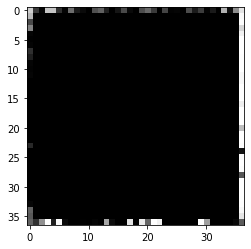

In [36]:
out = output[0]
out = out 
print(out)
out = np.squeeze(out.detach().numpy())
plt.imshow(out, cmap="gray")
plt.show()

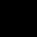

<PIL.Image.Image image mode=L size=37x37 at 0x7FA6BFEF8410>
(37, 37)


In [37]:
from torchvision import transforms
im = transforms.ToPILImage()(out).convert("L")
display(im)
print(im)
print(im.size)

In [268]:
#Till here all the weights match completely yet the image should have been a MNIST digit if the gen has been trained well

## Important points while weight loading 

1 To load weight from tf conv layer to pytorch conv layer always permute first because in tf dimension of weight  is (*kernel size, input_dim, output_dim) while in pytorch it is (output_dim,input_dim,*kernelsize)
eg : tf - > (5,5,128,256)
    pyt -> (256,128,5,5)
   
   Keep this in mind while checking weight as well

2 I did a mistake of loading bn_x/beta/adam_1 of tf to bn_x/bias of pytorch 

3 for batch norm layers (tf)beta -> bias (pyt)
gamma -> weight
moving_mean -> running_mean
moving_variance -> running_var

4 Linear layers are the same keep in mind the transpose one has (output,input) and the other has (input,output)
5 w of tf corresponds to weight of pytorch 
  bias of tf corresponds to bias of pytorch 
  
6 When we do self.conv = nn.Conv2d() then this class automatically initialises weights and bias of the layer as nn.Params internally since this class nn.Conv2d is implemented by torch developers. However we can initalise the weights ourselves in the init class using nn.Parameter(using nn.Parameter is important as this way the weights are registered and also their requires_grad is set true automatically) if we declare weights as a normal tensor inside our own class's init function then we would have to set requires grad to be true as any tensor we make has it false by default also other difficulties may arise)

7 using getattr(pointer,"name_of_attr") we can get access to the value pointer.name_of_attr 

8 The .data is important when loading weights so model.bn_0.weight.data = array rather than model.bn_0.weight = array


## Tensorflow Implementation from here

In [272]:
tf.__version__

'2.5.0'

In [ ]:
!pip uninstall tensorflow


In [1]:
import tensorflow as tf 
tf.__version__

'2.5.0'

In [3]:
"""The building block ops for Spectral Normalization GAN."""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf


# tf.truncated_normal_initializer(stddev=0.02)
# from tensorflow.python.ops.losses.losses_impl import Reduction

weight_init = tf.contrib.layers.xavier_initializer()
# weight_init = tf.keras.initializers.GlorotUniform()
# rng = np.random.RandomState([2016, 6, 1])


def conv2d(x, out_channels, kernel=3, stride=1, sn=False, update_collection=None, name='conv2d'):

    with tf.variable_scope(name):
        w = tf.get_variable('w', [kernel, kernel, x.get_shape()[-1], out_channels], initializer=weight_init)

        if sn:
            w = spectral_norm(w, update_collection=update_collection)

        conv = tf.nn.conv2d(x, w, strides=[1, stride, stride, 1], padding='SAME')

        bias = tf.get_variable('biases', [out_channels], initializer=tf.zeros_initializer())
        conv = tf.nn.bias_add(conv, bias)

        return conv


def deconv2d(x, out_channels, kernel=4, stride=2, sn=False, update_collection=None, name='deconv2d'):

    with tf.variable_scope(name):
        x_shape = x.get_shape().as_list()
        output_shape = [x_shape[0], x_shape[1]*stride, x_shape[2]*stride, out_channels]

        w = tf.get_variable('w', [kernel, kernel, out_channels, x_shape[-1]], initializer=weight_init)

        if sn:
            w = spectral_norm(w, update_collection=update_collection)

        deconv = tf.nn.conv2d_transpose(x, w, output_shape=output_shape, strides=[1, stride, stride, 1], padding='SAME')

        bias = tf.get_variable('biases', [out_channels], initializer=tf.zeros_initializer())
        deconv = tf.nn.bias_add(deconv, bias)
        deconv.shape.assert_is_compatible_with(output_shape)

        return deconv


def linear(x, out_features, sn=False, update_collection=None, name='linear'):

    with tf.variable_scope(name):
        x_shape = x.get_shape().as_list()
        assert (len(x_shape) == 2)

        matrix = tf.get_variable('W', [x_shape[1], out_features], tf.float32, initializer=weight_init)

        if sn:
            matrix = spectral_norm(matrix, update_collection=update_collection)

        bias = tf.get_variable('bias', [out_features], initializer=tf.zeros_initializer())
        out = tf.matmul(x, matrix) + bias
        return out



##################################################################################
# Normalization
##################################################################################

def batch_norm(x, is_training=True, name='batch_norm'):
    return tf.contrib.layers.batch_norm(x, decay=0.9, epsilon=1e-05,
                                        center=True, scale=True,
                                        is_training=is_training, scope=name, updates_collections=None)







In [4]:
def mnist_generator(z, is_training=True):
    net_dim = 64
    use_sn = False
    update_collection = None
    with tf.variable_scope('Generator', reuse=tf.AUTO_REUSE):
        output = linear(z, 4*4*4*net_dim, sn=use_sn, name='linear')
        output = batch_norm(output, is_training=is_training, name='bn_linear')
        output = tf.nn.relu(output)
        output = tf.reshape(output, [-1, 4, 4, 4*net_dim])
        
        # deconv-bn-relu
        output = deconv2d(output, 2*net_dim, 5, 2, sn=use_sn, name='deconv_0')
        output = batch_norm(output, is_training=is_training, name='bn_0')
        output = tf.nn.relu(output)

        output = output[:, :7, :7, :]

        output = deconv2d(output, net_dim, 5, 2, sn=use_sn, name='deconv_1')
        output = batch_norm(output, is_training=is_training, name='bn_1')
        output = tf.nn.relu(output)

        output = deconv2d(output, 1, 5, 2, sn=use_sn, name='deconv_2')
        output = tf.sigmoid(output)

        return output

In [16]:
z = tf.random.uniform([2,128])
tf.print(z)
model_gen = mnist_generator(z)
print(model_gen)

Tensor("Generator_3/Sigmoid:0", shape=(2, 28, 28, 1), dtype=float32)


In [39]:
print(model)

Generator(
  (bn_linear): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (deconv_0): ConvTranspose2d(256, 128, kernel_size=(5, 5), stride=(2, 2))
  (bn_0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv_1): ConvTranspose2d(128, 64, kernel_size=(5, 5), stride=(2, 2))
  (bn_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv_2): ConvTranspose2d(64, 1, kernel_size=(5, 5), stride=(2, 2))
  (linear): Linear(in_features=128, out_features=4096, bias=True)
  (sigmoid): Sigmoid()
)


In [38]:
print(model.bn_0.running_var)

tensor([10.3234, 10.1713, 10.4720, 11.7635, 13.1387, 10.2366, 12.5889, 10.5630,
         8.7075, 10.3518, 13.4372, 12.3444, 14.8339, 14.3919, 11.0642, 11.1831,
        11.7455, 16.5836, 12.1152, 10.5740, 12.1011, 12.1821, 11.3373, 15.1699,
        11.4460, 11.2401, 10.1121, 10.3004,  8.8734, 10.5979, 10.1152, 10.1758,
        11.3230, 10.3869, 10.7628,  9.8194, 10.4184, 10.2791, 10.1517, 11.5050,
         8.3314, 12.8367,  9.3972, 11.3158, 10.0808, 12.2568, 11.6941, 10.7239,
        18.2286, 10.4378,  8.4708, 12.0539, 10.4252, 11.1574, 11.6824, 29.5657,
        10.4575, 10.1319,  7.0575, 10.9822, 11.0687, 40.6103, 11.3120, 11.7046,
        12.2155, 11.4014, 11.4445, 10.7117, 14.8595,  8.5924, 10.5152, 10.9499,
        11.5781, 12.2678, 11.4013, 11.0148,  9.6479, 12.5108, 11.3273, 11.7145,
         9.0673,  8.6692, 14.0071, 11.9825, 11.3783, 14.6559, 10.7671, 25.0635,
        10.7206, 12.4842, 11.0135,  9.9232, 18.9352, 11.0362, 13.8595, 10.7316,
        11.6101, 10.4685, 12.5636, 11.12

In [41]:
z = torch.randn(5,128)
model = model.eval()
output = model(z)
print(output,output.shape)

lienar_output torch.Size([5, 4096])
lienar_output tensor([[ 0.3193, -0.6115, -0.4693,  ...,  0.2874, -0.3011,  0.5762],
        [-1.3116, -0.4180, -0.9398,  ..., -0.0971,  0.0730, -0.3406],
        [ 0.2935,  0.9333, -0.3197,  ..., -0.4532,  0.1633,  0.4120],
        [-0.9589, -0.1967, -0.0591,  ..., -0.5998,  0.9388,  1.1915],
        [-0.4009,  0.2549,  0.1691,  ...,  0.4328,  0.1484, -0.1122]],
       grad_fn=<AddmmBackward>)
bn_linear_output torch.Size([5, 4096])
bn_linear_output tensor([[ 0.2284, -1.1649, -1.1773,  ..., -0.5496, -0.5733,  1.0676],
        [-2.2290, -0.8190, -2.0041,  ..., -0.7468, -0.1013, -0.5587],
        [ 0.1896,  1.5968, -0.9144,  ..., -0.9294,  0.0127,  0.7764],
        [-1.6976, -0.4234, -0.4564,  ..., -1.0046,  0.9914,  2.1592],
        [-0.8567,  0.3839, -0.0555,  ..., -0.4750, -0.0060, -0.1535]],
       grad_fn=<NativeBatchNormBackward>)
relu_output torch.Size([5, 4096])
relu_output tensor([[0.2284, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0676],
        

deconv1_output tensor([[[[-6.6742e-01, -6.4379e-01, -4.8998e-01,  ..., -3.4832e-01,
           -4.9252e-01, -7.8365e-02],
          [-8.0107e-01, -5.1323e-01, -5.5011e-01,  ..., -1.1990e-01,
           -2.0702e-01, -3.5748e-02],
          [-9.7727e-01, -6.5676e-01,  2.7138e-01,  ...,  2.2869e+00,
           -1.9127e-02,  4.4897e-01],
          ...,
          [-2.0275e+00, -8.2347e-01,  2.2940e+00,  ...,  2.0034e+00,
            1.1918e+00,  7.1791e-01],
          [-4.6011e-01,  1.3166e+00,  1.7200e+00,  ...,  2.1828e+00,
            1.1829e+00,  5.0631e-01],
          [ 2.3577e-01,  7.6965e-01, -5.4646e-01,  ..., -8.5302e-01,
            7.3752e-01, -2.7434e-01]],

         [[-4.2291e-01, -6.0678e-01,  5.6999e-01,  ...,  9.1626e-01,
            4.1139e-01, -1.3130e-01],
          [ 1.5155e-02, -5.5273e-01,  2.8358e-01,  ...,  2.9507e-01,
            3.4989e-01, -3.9441e-01],
          [ 3.1686e-01, -2.8755e-01,  1.3377e+00,  ...,  2.0410e+00,
            1.2774e+00,  9.6718e-02],
     

In [ ]:
nn.Conv2d(256, 128 , kernel_size=1),
             	nn.ReLU(inplace=True)
nn.ConvTranspose2d(128, 128, kernel_size=3, stride=2, padding=3 // 2, output_padding=1),
             	nn.ReLU(inplace=True)

In [44]:
import torch.nn.functional as F

In [47]:
x = torch.randn(5, 256, 4, 4)
x = F.pad(x, (1, 2,1, 2), )
print(x.shape)
x = nn.ConvTranspose2d(256, 128, 5, 2)(x)
x.shape

torch.Size([5, 256, 7, 7])


torch.Size([5, 128, 17, 17])

In [13]:
%cd ~/Desktop/projects/sigmared/invgan/invgan

/home/manas/Desktop/projects/sigmared/invgan/invgan


In [14]:
!ls

blackbox.py	    debug.py		       plots
cifar10.tar.gz	    download_dataset.py        README.md
classification.py   evaluate.py		       requirements.txt
classifiers	    experiments		       setup.sh
classifiers.tar.gz  figures		       tflib
cleverhans	    _init_paths.py	       train_cgan.py
cmp_tf_pyt_gen.py   LICENSE		       train.py
comparison	    mnist.tar.gz	       utils
data		    models		       whitebox_cifar.py
datasets	    mse_roc_classification.py  whitebox.py
debug		    output


In [3]:
from utils.config import load_config, gan_from_config

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [22]:
import tensorflow as tf
from utils.config import load_config, gan_from_config
from models.dataset_networks import mnist_generator
import numpy as np
from PIL import Image
from matplotlib import cm

tf.executing_eagerly()

False

In [23]:


test_mode = True
ckpt_path = "experiments/cfgs/gans_inv/mnist.yml"
cfg = load_config(ckpt_path)


# gan = gan_from_config(cfg, test_mode)

# sess = gan.sess
# gan.initialize_uninitialized()

# gan.load_generator(ckpt_path=ckpt_path)






# gan._build()


# samples = gan.sess.run(
#     gan.x_hat_sample, feed_dict={gan.encoder_training: False, gan.discriminator_training: False},
# )

# print(type(samples))


DuplicateFlagError: The flag 'cfg_path' is defined twice. First from utils.config, Second from utils.config.  Description from first occurrence: config path.

In [8]:
output = samples
sam = np.squeeze(samples[0])


In [9]:
print(samples.shape)

(28, 28)


## Comparing output shapes 

In [1]:
import torch

In [2]:
#seed_concept

torch.manual_seed(15678)

print("Print 5 random numbers")
print(torch.rand(5))

print("Print 5 more random numbers")
print(torch.rand(5))

print("Set the starting point to 15678 again")
torch.manual_seed(15678)

print("Print 5 random numbers")
print(torch.rand(5))

Print 5 random numbers
tensor([0.6280, 0.7428, 0.1772, 0.4848, 0.6624])
Print 5 more random numbers
tensor([0.4395, 0.9383, 0.1213, 0.3481, 0.1033])
Set the starting point to 15678 again
Print 5 random numbers
tensor([0.6280, 0.7428, 0.1772, 0.4848, 0.6624])


In [3]:
print(torch.rand(5))

tensor([0.4395, 0.9383, 0.1213, 0.3481, 0.1033])


In [4]:
torch.randn(2,128)

tensor([[-1.9283,  2.7688,  1.9123,  0.5134,  1.1493, -2.0589,  0.3083, -2.0969,
          1.5133,  1.3078, -0.1938, -1.6718,  1.0918, -0.6199,  0.9041, -1.0653,
          0.2895,  1.5948, -0.6112, -0.1551,  0.5589, -1.3196,  0.0529, -1.2720,
          0.1800, -2.0774, -0.9885,  0.2435,  0.8936, -1.9041, -0.0480, -0.0672,
         -0.2584, -1.6203,  1.2159,  0.9329, -1.5149,  1.9205, -0.0867, -0.4226,
         -0.5559, -0.4553, -0.2159, -0.2824,  0.0067,  1.0483, -1.8004,  0.7973,
         -0.4099,  1.3159, -1.0721,  1.1688, -0.5447, -1.1157,  1.6924,  0.6475,
         -0.1790, -0.0585, -0.5682,  1.2534,  0.3059, -0.6895, -0.5594, -0.6315,
          1.4431,  0.8037, -1.1780, -3.3634, -1.0905,  0.3235,  0.4182, -0.4271,
          0.8537,  0.0241, -0.8704,  0.2980, -1.1254,  0.7356,  0.8890,  0.9726,
         -0.2286, -1.2240, -0.7902, -0.8921,  0.2725, -0.0183, -0.7689,  0.5173,
          1.1227, -0.4582, -1.0992, -1.1382,  0.7970,  0.3993, -0.7044,  1.8757,
         -0.2555,  0.9405, -

In [55]:
#z_same is a tensor drawn from uniform random distribution see above tensor, this same tensor is used as initial in the 
#tf file by simple copy pasting
z_same = torch.Tensor([[-1.9283,  2.7688,  1.9123,  0.5134,  1.1493, -2.0589,  0.3083, -2.0969,
          1.5133,  1.3078, -0.1938, -1.6718,  1.0918, -0.6199,  0.9041, -1.0653,
          0.2895,  1.5948, -0.6112, -0.1551,  0.5589, -1.3196,  0.0529, -1.2720,
          0.1800, -2.0774, -0.9885,  0.2435,  0.8936, -1.9041, -0.0480, -0.0672,
         -0.2584, -1.6203,  1.2159,  0.9329, -1.5149,  1.9205, -0.0867, -0.4226,
         -0.5559, -0.4553, -0.2159, -0.2824,  0.0067,  1.0483, -1.8004,  0.7973,
         -0.4099,  1.3159, -1.0721,  1.1688, -0.5447, -1.1157,  1.6924,  0.6475,
         -0.1790, -0.0585, -0.5682,  1.2534,  0.3059, -0.6895, -0.5594, -0.6315,
          1.4431,  0.8037, -1.1780, -3.3634, -1.0905,  0.3235,  0.4182, -0.4271,
          0.8537,  0.0241, -0.8704,  0.2980, -1.1254,  0.7356,  0.8890,  0.9726,
         -0.2286, -1.2240, -0.7902, -0.8921,  0.2725, -0.0183, -0.7689,  0.5173,
          1.1227, -0.4582, -1.0992, -1.1382,  0.7970,  0.3993, -0.7044,  1.8757,
         -0.2555,  0.9405, -0.1748, -0.7677, -0.9033,  0.3615, -0.4695, -0.0857,
         -0.0753, -0.8706,  1.4214,  0.7415,  0.6215, -0.2851, -0.7456,  0.3459,
         -0.9828, -0.0330, -0.5048,  1.0308,  0.8042,  0.5502, -0.6126,  0.5251,
          0.3975, -0.1305, -0.4978, -0.2209, -1.1550, -0.0376, -0.6591, -0.7800],
        [ 0.7428,  2.0105, -0.9835,  0.5920,  0.7965, -1.3262,  0.4229,  0.8360,
          0.7642,  0.1448, -0.3501,  0.0717, -2.1135,  0.0059, -0.4323,  0.0787,
          0.6055,  0.0811, -1.4112,  0.0576, -0.4598,  0.3889,  0.8371,  3.4993,
         -1.5743,  0.9668,  0.0926,  0.3715,  0.8899, -0.3950, -0.1339,  2.0859,
         -2.7667, -1.1946,  0.0768,  0.8880,  0.6156,  0.3904,  0.3018, -0.3333,
         -1.0623, -1.9733,  0.3245,  1.8893, -1.0704, -0.3712, -0.8592,  1.8665,
          1.2664, -0.3463,  0.8792, -0.9145, -1.3785,  0.6663, -0.0097, -2.0127,
         -0.6964, -2.6171,  0.1033,  0.5692,  1.1947,  0.0432, -0.2141,  0.7920,
         -0.0754,  0.3429, -1.2375,  1.6103, -0.6346,  0.2630,  0.6389,  0.3970,
         -1.3343,  1.4615,  0.4728, -0.6481,  0.2730,  1.4107, -0.4004, -0.6128,
          0.7553, -1.0540,  0.5715,  0.3378,  0.6097, -0.8205,  2.1021, -1.1119,
          0.3928,  0.3493,  0.9750,  1.2226, -0.7350, -0.9588,  0.0474, -0.9106,
          1.4326,  0.6924, -0.5693,  1.0242,  0.1555, -1.4326, -0.9242, -1.5584,
         -0.4377,  3.1167, -1.0250, -0.0388,  1.1994,  0.4246, -0.9651,  0.9338,
         -1.2601,  1.0314, -0.0330, -0.0106, -2.3576, -1.5177,  0.2608,  0.0128,
         -0.2360, -0.3022,  2.4710,  1.1538, -0.3755, -0.5416, -1.3389,  0.0478]]
                     )

In [56]:
print(z_same.shape)

torch.Size([2, 128])


In [57]:
print(z_same)

tensor([[-1.9283,  2.7688,  1.9123,  0.5134,  1.1493, -2.0589,  0.3083, -2.0969,
          1.5133,  1.3078, -0.1938, -1.6718,  1.0918, -0.6199,  0.9041, -1.0653,
          0.2895,  1.5948, -0.6112, -0.1551,  0.5589, -1.3196,  0.0529, -1.2720,
          0.1800, -2.0774, -0.9885,  0.2435,  0.8936, -1.9041, -0.0480, -0.0672,
         -0.2584, -1.6203,  1.2159,  0.9329, -1.5149,  1.9205, -0.0867, -0.4226,
         -0.5559, -0.4553, -0.2159, -0.2824,  0.0067,  1.0483, -1.8004,  0.7973,
         -0.4099,  1.3159, -1.0721,  1.1688, -0.5447, -1.1157,  1.6924,  0.6475,
         -0.1790, -0.0585, -0.5682,  1.2534,  0.3059, -0.6895, -0.5594, -0.6315,
          1.4431,  0.8037, -1.1780, -3.3634, -1.0905,  0.3235,  0.4182, -0.4271,
          0.8537,  0.0241, -0.8704,  0.2980, -1.1254,  0.7356,  0.8890,  0.9726,
         -0.2286, -1.2240, -0.7902, -0.8921,  0.2725, -0.0183, -0.7689,  0.5173,
          1.1227, -0.4582, -1.0992, -1.1382,  0.7970,  0.3993, -0.7044,  1.8757,
         -0.2555,  0.9405, -

In [54]:
# this cell initialises the Generator class and also loads the weight after this cell we will have available
#model which is the loaded generator.

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        net_dim = 64
        use_sn = False
        update_collection = None
        self.bn_linear = nn.BatchNorm1d(4*4*4*net_dim)
        self.relu = nn.ReLU()
        self.deconv_0 = nn.ConvTranspose2d(4*net_dim,2*net_dim,5,2, padding = 2,output_padding = 1)
        self.bn_0 = nn.BatchNorm2d(2*net_dim)
        self.deconv_1 = nn.ConvTranspose2d(2*net_dim,net_dim,5,2, padding = 2,output_padding = 1)
        self.bn_1 = nn.BatchNorm2d(net_dim)
        self.deconv_2 = nn.ConvTranspose2d(net_dim,1,5,2,padding = 2,output_padding = 1)
        self.linear = nn.Linear(128,4*4*4*net_dim)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        net_dim = 64
        output = self.linear(x)
        print("lienar_output",output.shape)
        print("lienar_output",output)
        output = self.bn_linear(output)
        print("bn_linear_output",output.shape)
        print("bn_linear_output",output)
        output = self.relu(output)
        print("relu_output",output.shape)
        print("relu_output",output)
#         output = output.view(-1,4*net_dim,4,4)
        output = output.view(-1,4,4,4*net_dim)
        print(output,output.shape)
        output = output.permute(0,3,1,2)
        print(output)
        output = self.deconv_0(output)
#         a = output
        print("deconv0_output",output.permute(0,2,3,1).shape)
        print("deconv0_output",output.permute(0,2,3,1))
        output = self.bn_0(output)
        print("bn_0_output",output.shape)
        print("bn_0_output",output)
        output = output[:,:,:7,:7]
        print(output.shape,"slicing")
        output = self.deconv_1(output)
        print("deconv1_output",output.shape)
        print("deconv1_output",output)
        output = self.bn_1(output)
        print("bn1_output",output.shape)
        print("bn1_output",output)
        output = self.relu(output)
        print("relu_output",output.shape)
        print("relu_output",output)
        output = self.deconv_2(output)
        print("decinv2_output",output.shape)
        print("deconv2_output",output)
        output = self.sigmoid(output)
        print("digmoid_output",output.permute(0,2,3,1).shape)
        print("sigmoid_output",output.permute(0,2,3,1))
        
        return output
        
        
        
tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans/mnist/GAN.model-200000')  # Path to our TensorFlow checkpoint
init_vars = tf.train.list_variables(tf_path)

model = Generator()  # load the un-initialized PyTorch model we have created

tf_vars = []
for name, shape in init_vars:
    print("Loading TF weight {} with shape {}".format(name, shape))
    array = tf.train.load_variable(tf_path, name)
    tf_vars.append((name, array))

# tf_vars



# FOr each variable in the PyTorch model
for name, array in tf_vars:
    # skip the prefix ('model/') and split the path-like variable name in a list of sub-path
    if name[:9] == "Generator":
        name = name[10:].split('/')

        # Initiate the pointer from the main model class
        pointer = model

        # We iterate along the scopes and move our pointer accordingly
#         for m_name in name:
        l = name
        print(l)
        if len(l) == 3:
            continue
        # we take special care of the `h0`, `h1`... paths and split them in `h` + the number
#             if re.fullmatch(r'[A-Za-z]+\d+', m_name):
#                 l = re.split(r'(\d+)', m_name)
#             else:
#                 l = [m_name]


        # Convert parameters final names to the PyTorch modules equivalent names
        if l[0] == "bn_0" or l[0] == "bn_1" or l[0] == "bn_linear":
            pointer = getattr(pointer,l[0])
            if l[1] == "beta":
                pointer = getattr(pointer,"bias")
            elif l[1] == "gamma":
                pointer = getattr(pointer,"weight")
            elif l[1] == "moving_mean":
                pointer = getattr(pointer,"running_mean")
            elif l[1] == "moving_variance":
                pointer = getattr(pointer,"running_var")
        if l[0] == "deconv_0" or l[0] == "deconv_1" or l[0] == "deconv_2":
            pointer = getattr(pointer,l[0])
            if l[1] == "biases":
                pointer = getattr(pointer,"bias")
            elif l[1] == "w":
                pointer = getattr(pointer,"weight")
        if l[0] == "linear":
            pointer = getattr(pointer,l[0])
            if l[1] == "W":
                pointer = getattr(pointer,"weight")
            elif l[1] == "bias":
                pointer = getattr(pointer,"bias")

#             if l[0] == 'w' or l[0] == 'g':
#                 pointer = getattr(pointer, 'weight')
#             elif l[0] == 'b':
#                 pointer = getattr(pointer, 'bias')
#             elif l[0] == 'wpe' or l[0] == 'wte':
#                 pointer = getattr(pointer, l[0])
#                 pointer = getattr(pointer, 'weight')
#             else:
#                 pointer = getattr(pointer, l[0])

        # If we had a `hXX` name, let's access the sub-module with the right number
#             if len(l) >= 2:
#                 num = int(l[1])
#                 pointer = pointer[num]
#         try:
#             assert pointer.shape == array.shape  # Catch error if the array shapes are not identical
#         except AssertionError as e:
#             e.args += (pointer.shape, array.shape)
#             raise
        print(array.shape)

        print("Initialize PyTorch weight {}".format(name))
        if (l[1] == "W" or l[1] == "w") and l[0] != "linear":
            temp_tensor = torch.from_numpy(array)
#             if len(temp_tensor.shape) == 3:
#                 temp_tensor = torch.unsqueeze(temp_tensor,2)
            temp_tensor = temp_tensor.permute(3,2,0,1)
            pointer.data = temp_tensor 
        elif l[0] == "linear" and l[1] == "W":
            temp_tensor = torch.from_numpy(array)
            temp_tensor = temp_tensor.permute(1,0)
            pointer.data = temp_tensor 
        else:
#             if l[1] == "moving_mean" or l[1] == "moving_var":
#                 print(array)
#                 print(torch.from_numpy(array))
            pointer.data = torch.from_numpy(array)

Loading TF weight Discriminator/conv0/biases with shape [64]
Loading TF weight Discriminator/conv0/biases/Adam with shape [64]
Loading TF weight Discriminator/conv0/biases/Adam_1 with shape [64]
Loading TF weight Discriminator/conv0/u with shape [1, 64]
Loading TF weight Discriminator/conv0/w with shape [5, 5, 1, 64]
Loading TF weight Discriminator/conv0/w/Adam with shape [5, 5, 1, 64]
Loading TF weight Discriminator/conv0/w/Adam_1 with shape [5, 5, 1, 64]
Loading TF weight Discriminator/conv1/biases with shape [128]
Loading TF weight Discriminator/conv1/biases/Adam with shape [128]
Loading TF weight Discriminator/conv1/biases/Adam_1 with shape [128]
Loading TF weight Discriminator/conv1/u with shape [1, 128]
Loading TF weight Discriminator/conv1/w with shape [5, 5, 64, 128]
Loading TF weight Discriminator/conv1/w/Adam with shape [5, 5, 64, 128]
Loading TF weight Discriminator/conv1/w/Adam_1 with shape [5, 5, 64, 128]
Loading TF weight Discriminator/conv2/biases with shape [256]
Loadin

In [58]:
z = z_same
model = model.eval()
output = model(z)
print(output,output.shape)

lienar_output torch.Size([2, 4096])
lienar_output tensor([[ 0.1910, -0.6046,  0.1924,  ..., -0.2471, -0.8474,  0.2205],
        [-0.0632,  0.7507,  0.4019,  ...,  0.4868, -0.0528,  0.0131]],
       grad_fn=<AddmmBackward>)
bn_linear_output torch.Size([2, 4096])
bn_linear_output tensor([[ 0.0351, -1.1527, -0.0144,  ..., -0.8237, -1.2627,  0.4368],
        [-0.3480,  1.2703,  0.3537,  ..., -0.4474, -0.2600,  0.0688]],
       grad_fn=<NativeBatchNormBackward>)
relu_output torch.Size([2, 4096])
relu_output tensor([[0.0351, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.4368],
        [0.0000, 1.2703, 0.3537,  ..., 0.0000, 0.0000, 0.0688]],
       grad_fn=<ReluBackward0>)
tensor([[[[0.0351, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.5080, 0.8442, 1.4978,  ..., 0.6904, 0.0000, 0.0000],
          [0.0000, 0.0000, 1.2544,  ..., 1.3934, 0.0000, 0.0000],
          [0.0000, 0.1670, 0.0000,  ..., 0.0000, 0.7005, 0.0000]],

         [[0.0000, 0.9908, 0.0000,  ..., 0.0000, 0.3332, 0.5307],

relu_output torch.Size([2, 64, 14, 14])
relu_output tensor([[[[ 0.0000,  0.0000,  0.0000,  ...,  4.0552,  0.0000,  3.8574],
          [ 0.0000,  0.0000,  0.0000,  ..., 11.8981,  8.5134,  0.0000],
          [ 4.0952,  0.0000, 33.3453,  ..., 22.5364,  2.7666,  0.0000],
          ...,
          [ 0.8779,  0.0000,  0.0000,  ..., 15.5448,  4.9113,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 2.6870,  0.4733,  2.5268,  ...,  0.0000,  2.4750,  0.0000]],

         [[13.4668, 30.8760, 39.1107,  ..., 15.2290,  3.9074,  0.0000],
          [14.5410,  9.4045, 27.6090,  ..., 22.1409, 16.6733,  0.0000],
          [42.7413, 37.0091, 56.8658,  ..., 13.5652,  0.0000,  0.0000],
          ...,
          [ 9.0296,  7.8432, 13.5527,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

         [[20.9976, 16.8060, 29.4288,  ...,  6.825

In [59]:
print(output.shape)
out = output.permute(0,2,3,1)
out = out.detach().numpy()
print(type(out))
print(out.dtype)
out = np.squeeze(out)
print(out.shape)

torch.Size([2, 1, 28, 28])
<class 'numpy.ndarray'>
float32
(2, 28, 28)


In [60]:
import numpy as np

from PIL import Image as im

def save_images(X, save_path = None):
    print(type(X))
    print(X.dtype)
    print("hello bitches")
    # [0, 1] -> [0,255]
    if isinstance(X.flatten()[0], np.floating):
        print("hello")
        X = (255.99*X).astype('uint8')
        print(X)

    n_samples = X.shape[0]
    rows = int(np.sqrt(n_samples))
    while n_samples % rows != 0:
        rows -= 1

    nh, nw = rows, n_samples/rows
    print(X.ndim)
    if X.ndim == 2:
        X = np.reshape(X, (X.shape[0], int(np.sqrt(X.shape[1])), int(np.sqrt(X.shape[1]))))
    print(X.shape)
    if X.ndim == 4:
        # BCHW -> BHWC
        if X.shape[1] == 3:
            X = X.transpose(0,2,3,1)

        h, w = X[0].shape[:2]
#         nw = int(nw)
        img = np.zeros((h*nh, w*nw, 3))
    elif X.ndim == 3:
        h, w = X[0].shape[:2]
        nw = int(nw)
        img = np.zeros((h*nh, w*nw))

    for n, x in enumerate(X):
        print(n)
        j = n/nw
        i = n%nw
        print(i,j)
        j = int(j)
        print(j)
        img[j*h:j*h+h, i*w:i*w+w] = x

    print(type(img))
    print(img.shape)
    # imsave(save_path, img)
    data = im.fromarray(img)
    data = data.convert("L")
    data.save('match_pyt.png')

In [61]:
save_images(out)

<class 'numpy.ndarray'>
float32
hello bitches
hello
[[[  0   0   0 ...   7 140 246]
  [  0   0   0 ...   0   5 237]
  [  0   0   0 ...   0   2 241]
  ...
  [ 10 220 255 ... 255 255 247]
  [ 89 253 255 ... 255 255 252]
  [222 252 251 ... 254 249 223]]

 [[  0   0   0 ...  41 248 197]
  [  0   0   0 ...   1 255 244]
  [  0   0   0 ...   0   0   0]
  ...
  [150 193 225 ... 255 255 161]
  [254 253 255 ... 255 255 245]
  [249 253 252 ... 253 248 219]]]
3
(2, 28, 28)
0
0 0.0
0
1
1 0.5
0
<class 'numpy.ndarray'>
(28, 56)


torch.Size([1, 28, 28])


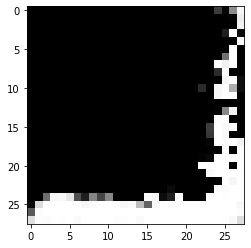

In [62]:
out = output[0]
print(out.shape)
out = np.squeeze(out.detach().numpy())
plt.imshow(out, cmap="gray")
plt.show()

### Why first reshape in the same tf NHWC format and then convert into NCHW using permute rather than directly use view first to convert into NCHW and then convert into NHWC using permute and compare. 

In [37]:
import torch 

In [38]:
torch.randn(2,16)



tensor([[ 0.3102,  0.7723, -0.0214,  ...,  1.5262, -0.0845,  0.8039],
        [ 0.2302,  0.4447, -0.0173,  ..., -0.0460, -2.5915, -0.1912]])

In [70]:
a = torch.rand(2,16)

In [71]:
b = a

In [72]:
b

tensor([[0.4137, 0.1982, 0.7981, 0.2698, 0.0699, 0.5373, 0.3168, 0.0947, 0.9213,
         0.7689, 0.0546, 0.9418, 0.3495, 0.7275, 0.6778, 0.5108],
        [0.3890, 0.5343, 0.5897, 0.0522, 0.0954, 0.9116, 0.1377, 0.3343, 0.3814,
         0.7556, 0.1218, 0.5222, 0.2500, 0.1875, 0.8351, 0.4087]])

In [73]:
a

tensor([[0.4137, 0.1982, 0.7981, 0.2698, 0.0699, 0.5373, 0.3168, 0.0947, 0.9213,
         0.7689, 0.0546, 0.9418, 0.3495, 0.7275, 0.6778, 0.5108],
        [0.3890, 0.5343, 0.5897, 0.0522, 0.0954, 0.9116, 0.1377, 0.3343, 0.3814,
         0.7556, 0.1218, 0.5222, 0.2500, 0.1875, 0.8351, 0.4087]])

In [74]:
print(a.shape)
k = a.view(2,2,2,4)
print(k.shape)
k = k.permute(0,3,1,2)
print(k)

torch.Size([2, 16])
torch.Size([2, 2, 2, 4])
tensor([[[[0.4137, 0.0699],
          [0.9213, 0.3495]],

         [[0.1982, 0.5373],
          [0.7689, 0.7275]],

         [[0.7981, 0.3168],
          [0.0546, 0.6778]],

         [[0.2698, 0.0947],
          [0.9418, 0.5108]]],


        [[[0.3890, 0.0954],
          [0.3814, 0.2500]],

         [[0.5343, 0.9116],
          [0.7556, 0.1875]],

         [[0.5897, 0.1377],
          [0.1218, 0.8351]],

         [[0.0522, 0.3343],
          [0.5222, 0.4087]]]])


In [75]:
m = b.view(2,4,2,2)
print(m)

tensor([[[[0.4137, 0.1982],
          [0.7981, 0.2698]],

         [[0.0699, 0.5373],
          [0.3168, 0.0947]],

         [[0.9213, 0.7689],
          [0.0546, 0.9418]],

         [[0.3495, 0.7275],
          [0.6778, 0.5108]]],


        [[[0.3890, 0.5343],
          [0.5897, 0.0522]],

         [[0.0954, 0.9116],
          [0.1377, 0.3343]],

         [[0.3814, 0.7556],
          [0.1218, 0.5222]],

         [[0.2500, 0.1875],
          [0.8351, 0.4087]]]])


In [11]:
model.deconv_0.weight.shape

torch.Size([256, 128, 5, 5])

### Below cell will give output dimension as 2*n given input dimension as n always

Without output_padding it was not possible as the formula is (n-1)*s-2p+f now keeping this equal to 2*n with stride fixed as 2 and f fixed as 5 would not work as p would be decimal but with output padding =1 and setting padding = 2 this works as now (n-1)*s-2p+f+output_padding = 2*n put s = 2,p=2,f=5 to get both output_padding = 1 to satisfy the eq

In [113]:

a = nn.ConvTranspose2d(256,128,5,2,padding = 2,output_padding = 1)
z = torch.randn(2,256,16,16)
# a.weight = nn.Parameter(torch.randn(128,256,5,2))
print(a.weight.shape)
output = a(z) 
print(output.shape)

torch.Size([256, 128, 5, 5])
torch.Size([2, 128, 32, 32])


In [13]:
a.weight.shape

torch.Size([256, 128, 5, 5])

In [114]:
import tensorflow as tf 

In [115]:
tf.__version__

'2.5.0'

## TODO
1 take a tensor (2,4,4,16) format is NHWC <br>
2 perform conv2dtranspose with f = 5, s = 2, padding = same <br>
3 take the same tensor in format 2,16,4,4 via permute of 2,4,4,16 <br>
4 initilaise both the conv operations with the same weights <br>
5 compare output<br>


## Below experiment is to see that if the initial input is same and the weights are the same then do the tf and pyt deconv produce the same output in case of zero padding or no padding

### TLDR Yes it produces same

In [84]:
initial = np.random.randn(2,8,8,16)


In [85]:
initial

array([[[[ 0.68809202, -1.04759941, -0.04471632, ...,  0.06378264,
          -0.81433782,  0.6352217 ],
         [ 1.13727751,  0.89026434,  0.00409089, ..., -1.4225827 ,
           1.50922146, -0.10984781],
         [ 0.13663266, -0.07850941, -0.35117058, ...,  0.9986991 ,
           0.21989222,  0.07452177],
         ...,
         [ 0.35423563, -0.38714769, -1.43215941, ..., -0.15556366,
           0.27391065,  0.17857775],
         [ 2.03247611,  0.80060064,  0.33620157, ..., -1.00887832,
           1.10844115,  1.03618418],
         [-0.28006152,  1.62113641, -2.60774582, ...,  0.54992769,
          -0.63695934,  0.49115584]],

        [[ 1.31363946,  0.20887009,  0.87131557, ...,  0.45827645,
          -0.77609058, -0.83069074],
         [ 0.3625582 , -1.57179918,  0.8072878 , ..., -0.49117172,
          -0.22348986, -0.3326102 ],
         [ 0.56440727,  0.88764627, -0.25637505, ...,  0.07735405,
          -0.48522469, -2.20800723],
         ...,
         [ 2.30692521,  0.35403321

In [86]:
tf_initial = tf.convert_to_tensor(initial, dtype=tf.float32)

In [87]:
print(tf_initial)

tf.Tensor(
[[[[ 0.688092   -1.0475994  -0.04471632 ...  0.06378264 -0.8143378
     0.6352217 ]
   [ 1.1372775   0.89026433  0.00409089 ... -1.4225827   1.5092214
    -0.10984781]
   [ 0.13663267 -0.07850941 -0.3511706  ...  0.99869907  0.21989222
     0.07452177]
   ...
   [ 0.35423562 -0.3871477  -1.4321594  ... -0.15556365  0.27391064
     0.17857775]
   [ 2.0324762   0.80060065  0.33620158 ... -1.0088784   1.1084411
     1.0361842 ]
   [-0.2800615   1.6211364  -2.607746   ...  0.5499277  -0.6369593
     0.49115583]]

  [[ 1.3136394   0.20887008  0.8713156  ...  0.45827645 -0.77609056
    -0.83069074]
   [ 0.3625582  -1.5717992   0.8072878  ... -0.49117172 -0.22348987
    -0.3326102 ]
   [ 0.5644073   0.88764626 -0.25637504 ...  0.07735405 -0.4852247
    -2.2080073 ]
   ...
   [ 2.3069253   0.3540332  -0.9572416  ... -1.0141858   2.388555
     0.3518176 ]
   [-0.04279199  1.0869302   0.95361406 ...  0.6159681   0.98678917
     0.38995588]
   [ 1.4230014   0.4191475   1.2919071  ...  

In [88]:
pyt_initial = torch.from_numpy(initial)
pyt_initial

tensor([[[[ 0.6881, -1.0476, -0.0447,  ...,  0.0638, -0.8143,  0.6352],
          [ 1.1373,  0.8903,  0.0041,  ..., -1.4226,  1.5092, -0.1098],
          [ 0.1366, -0.0785, -0.3512,  ...,  0.9987,  0.2199,  0.0745],
          ...,
          [ 0.3542, -0.3871, -1.4322,  ..., -0.1556,  0.2739,  0.1786],
          [ 2.0325,  0.8006,  0.3362,  ..., -1.0089,  1.1084,  1.0362],
          [-0.2801,  1.6211, -2.6077,  ...,  0.5499, -0.6370,  0.4912]],

         [[ 1.3136,  0.2089,  0.8713,  ...,  0.4583, -0.7761, -0.8307],
          [ 0.3626, -1.5718,  0.8073,  ..., -0.4912, -0.2235, -0.3326],
          [ 0.5644,  0.8876, -0.2564,  ...,  0.0774, -0.4852, -2.2080],
          ...,
          [ 2.3069,  0.3540, -0.9572,  ..., -1.0142,  2.3886,  0.3518],
          [-0.0428,  1.0869,  0.9536,  ...,  0.6160,  0.9868,  0.3900],
          [ 1.4230,  0.4191,  1.2919,  ...,  0.7990,  0.1399,  0.1388]],

         [[ 0.1597, -0.0622,  0.5473,  ...,  0.7609,  0.7821,  1.1988],
          [ 0.5384, -0.8395,  

In [89]:
print(tf_initial.shape)
print(pyt_initial.shape)

(2, 8, 8, 16)
torch.Size([2, 8, 8, 16])


In [40]:
initializer = tf.keras.initializers.Constant(3.)
# initializer = tf.keras.initializers.GlorotUniform()

In [59]:
tf_layer = tf.keras.layers.Conv2DTranspose(32, 5, strides=2, padding='valid',data_format="channels_last",kernel_initializer=initializer,dilation_rate = 1)

In [60]:
output_tf = tf_layer(tf_initial)
print(output_tf)

tf.Tensor(
[[[[-11.272159  -11.272159  -11.272159  ... -11.272159  -11.272159
    -11.272159 ]
   [-11.272159  -11.272159  -11.272159  ... -11.272159  -11.272159
    -11.272159 ]
   [-15.8112    -15.8112    -15.8112    ... -15.8112    -15.8112
    -15.8112   ]
   ...
   [  4.356427    4.356427    4.356427  ...   4.356427    4.356427
      4.356427 ]
   [  8.9703245   8.9703245   8.9703245 ...   8.9703245   8.9703245
      8.9703245]
   [  8.9703245   8.9703245   8.9703245 ...   8.9703245   8.9703245
      8.9703245]]

  [[-11.272159  -11.272159  -11.272159  ... -11.272159  -11.272159
    -11.272159 ]
   [-11.272159  -11.272159  -11.272159  ... -11.272159  -11.272159
    -11.272159 ]
   [-15.8112    -15.8112    -15.8112    ... -15.8112    -15.8112
    -15.8112   ]
   ...
   [  4.356427    4.356427    4.356427  ...   4.356427    4.356427
      4.356427 ]
   [  8.9703245   8.9703245   8.9703245 ...   8.9703245   8.9703245
      8.9703245]
   [  8.9703245   8.9703245   8.9703245 ...   8.97

In [61]:
a = pyt_initial
pyt_layer = nn.ConvTranspose2d(16,32,5,2)
constant_weight = 3. * torch.ones((16,32,5,5))
print(constant_weight)
weight = nn.Parameter(constant_weight)
pyt_layer.weight = weight
a = a.permute(0,3,1,2)
a = a.to(torch.float32)
print(a.dtype)
output = pyt_layer(a).permute(0,2,3,1)
print(output,output.shape)

tensor([[[[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],

         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],

         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],

         ...,

         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],

         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],

         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]]],


        [[[

In [62]:
np.amax(np.abs( output_tf- output.detach().numpy()))


0.034399033

### Conclusion is that both tf and pyt deconv operations are the same although they operate on different inital matrices in terms of shape difference. (one is 2,4,4,16 and the other is 2,16,4,4)

### Understanding what happens in same padding in tf with stride!=1 problem is of padding = same 

### Below experiment tries to mimic what the tf does in case of same padding when stride > 1 which is the output shape is always stride*input_shape

To do this we first try with the output_padding parameter but it produces very large difference between the outputs of the tf and pyt so we disregard this, next we try to use only padding parameter. if we solve for 
(n-1)*s - 2p +f = n*s.(which the same padding does, then p = f-s/2) here f=5 and s = 2 which give p = 1.5.
which is not possible as in pytorch the padding is always int. Hence we try below approach.(was hit and trial)


(n-1)*2 - 2*1 + 5 = 2*n+1, so if the input shape is 4,4 then output is 9,9 (p = 1,s=2,f=5) we compare this output with 8,8 produced by same padding of tf. I found that apart from the last row and column the output of pyt matches with tf so we trim this output as :8,:8 which removes the last row and column. Now we compare the amax and find that this always holds true that the rest of the matrix is same. So in every deconv layer we use f=5,s=2,p=1.

In [90]:
initializer = tf.keras.initializers.Constant(3.)
tf_layer = tf.keras.layers.Conv2DTranspose(32, 5, strides=2, padding='same',data_format="channels_last",kernel_initializer=initializer,dilation_rate = 1)

When padding = same and strides > 1 then the output shape is not the same as input shape but it is stride*input_shape

the formula is (n-1)*s-2p+f+p' = n*s  (p' = output padding in pytorch, 0 in tf)
solving we get p = (f-s+p')/2 
or 2p-p' = f-s



In [91]:
b = tf_layer(tf_initial)
b

<tf.Tensor: shape=(2, 16, 16, 32), dtype=float32, numpy=
array([[[[ -5.8449497 ,  -5.8449497 ,  -5.8449497 , ...,  -5.8449497 ,
           -5.8449497 ,  -5.8449497 ],
         [-18.554703  , -18.554703  , -18.554703  , ..., -18.554703  ,
          -18.554703  , -18.554703  ],
         [-18.554703  , -18.554703  , -18.554703  , ..., -18.554703  ,
          -18.554703  , -18.554703  ],
         ...,
         [ 21.014662  ,  21.014662  ,  21.014662  , ...,  21.014662  ,
           21.014662  ,  21.014662  ],
         [ 30.876005  ,  30.876005  ,  30.876005  , ...,  30.876005  ,
           30.876005  ,  30.876005  ],
         [ 30.876005  ,  30.876005  ,  30.876005  , ...,  30.876005  ,
           30.876005  ,  30.876005  ]],

        [[ 13.755117  ,  13.755117  ,  13.755117  , ...,  13.755117  ,
           13.755117  ,  13.755117  ],
         [ -8.765687  ,  -8.765687  ,  -8.765687  , ...,  -8.765687  ,
           -8.765687  ,  -8.765687  ],
         [ -8.765687  ,  -8.765687  ,  -8.76568

In [93]:
a = pyt_initial
pyt_layer = nn.ConvTranspose2d(16,32,5,2,padding = 1)
constant_weight = 3. * torch.ones((16,32,5,5))
print(constant_weight)
weight = nn.Parameter(constant_weight)
pyt_layer.weight = weight
a = a.permute(0,3,1,2)
a = a.to(torch.float32)
print(a.dtype)
output = pyt_layer(a).permute(0,2,3,1)
print(output,output.shape)
a = output[:,14,:14,:]
print(a.shape )

tensor([[[[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],

         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],

         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],

         ...,

         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],

         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],

         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]]],


        [[[

In [83]:
np.amax(np.abs( b- a.detach().numpy()))

0.035230637

In [11]:
# End to End comparison
initial = np.random.randn(2,7,7,16)
tf_initial = tf.convert_to_tensor(initial, dtype=tf.float32)
pyt_initial = torch.from_numpy(initial)


In [29]:
initializer = tf.keras.initializers.Constant(3.)
tf_layer = tf.keras.layers.Conv2DTranspose(32, 5, strides=2, padding='same',data_format="channels_last",kernel_initializer=initializer,dilation_rate = 1)
# bias = tf.convert_to_tensor(np.ones(32), dtype=tf.float32)
b = tf_layer(tf_initial)
print(b)
print(tf_layer.weights)



tf.Tensor(
[[[[  5.0271044   5.0271044   5.0271044 ...   5.0271044   5.0271044
      5.0271044]
   [ 21.49662    21.49662    21.49662   ...  21.49662    21.49662
     21.49662  ]
   [ 21.49662    21.49662    21.49662   ...  21.49662    21.49662
     21.49662  ]
   ...
   [-14.884981  -14.884981  -14.884981  ... -14.884981  -14.884981
    -14.884981 ]
   [-18.31171   -18.31171   -18.31171   ... -18.31171   -18.31171
    -18.31171  ]
   [-18.31171   -18.31171   -18.31171   ... -18.31171   -18.31171
    -18.31171  ]]

  [[  9.789846    9.789846    9.789846  ...   9.789846    9.789846
      9.789846 ]
   [ 25.810652   25.810652   25.810652  ...  25.810652   25.810652
     25.810652 ]
   [ 25.810652   25.810652   25.810652  ...  25.810652   25.810652
     25.810652 ]
   ...
   [-13.101576  -13.101576  -13.101576  ... -13.101576  -13.101576
    -13.101576 ]
   [-17.672966  -17.672966  -17.672966  ... -17.672966  -17.672966
    -17.672966 ]
   [-17.672966  -17.672966  -17.672966  ... -17.6729

In [18]:
constant_weight = 3. * np.ones((5,5,32,16))
constant_weight = tf.convert_to_tensor(constant_weight, dtype=tf.float32)
b = tf.nn.conv2d_transpose(tf_initial, constant_weight,[2,14,14,32], [1,2,2,1], padding='SAME',data_format='NHWC', dilations=None, name=None)
print(b)


tf.Tensor(
[[[[  5.0271044   5.0271044   5.0271044 ...   5.0271044   5.0271044
      5.0271044]
   [ 21.49662    21.49662    21.49662   ...  21.49662    21.49662
     21.49662  ]
   [ 21.49662    21.49662    21.49662   ...  21.49662    21.49662
     21.49662  ]
   ...
   [-14.884981  -14.884981  -14.884981  ... -14.884981  -14.884981
    -14.884981 ]
   [-18.31171   -18.31171   -18.31171   ... -18.31171   -18.31171
    -18.31171  ]
   [-18.31171   -18.31171   -18.31171   ... -18.31171   -18.31171
    -18.31171  ]]

  [[  9.789846    9.789846    9.789846  ...   9.789846    9.789846
      9.789846 ]
   [ 25.810652   25.810652   25.810652  ...  25.810652   25.810652
     25.810652 ]
   [ 25.810652   25.810652   25.810652  ...  25.810652   25.810652
     25.810652 ]
   ...
   [-13.101576  -13.101576  -13.101576  ... -13.101576  -13.101576
    -13.101576 ]
   [-17.672966  -17.672966  -17.672966  ... -17.672966  -17.672966
    -17.672966 ]
   [-17.672966  -17.672966  -17.672966  ... -17.6729

In [32]:
a = pyt_initial
pyt_layer = nn.ConvTranspose2d(16,32,5,2,padding = 1) #will produce output = 2*n+1
constant_weight = 3. * torch.ones((16,32,5,5))
print(constant_weight)
weight = nn.Parameter(constant_weight)
pyt_layer.weight = weight
# pyt_layer.bias = nn.Parameter(torch.ones(32))
a = a.permute(0,3,1,2) # to convert to NCHW
a = a.to(torch.float32)
# print(a.dtype)
output = pyt_layer(a).permute(0,2,3,1) #again permute to compare 
# print(output,output.shape)
a = output[:,:14,:14,:] #slice last dimension so that output shape is 2*n to match same padding of tf
print(a )
print(pyt_layer.weight)
print(pyt_layer.bias)

tensor([[[[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],

         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],

         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],

         ...,

         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],

         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],

         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]]],


        [[[

In [24]:
pyt_layer.bias

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [103]:
np.amax(np.abs( b- a.detach().numpy()))

0.032035828

### Conclusion Till now is that by careful comparison between tf and pytorch the weights were loaded and the shapes were corrected but the output simply did not match, now if the weights are anywhere close then within few epochs of traning the generator should start producing good imagesm that's the plan 

### Edit : The error was in weight loading i was under the wrong assumption that the weights were properly loaded. Also the deconv (2*n+1) assessment helped.

### Discrepancy in weight loading 

In [34]:
tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans/mnist/GAN.model-200000')  # Path to our TensorFlow checkpoint
init_vars = tf.train.list_variables(tf_path)

tf_vars = []
for name, shape in init_vars:
    print("Loading TF weight {} with shape {}".format(name, shape))
    array = tf.train.load_variable(tf_path, name)
    print(array)
    tf_vars.append((name, array))

Loading TF weight Discriminator/conv0/biases with shape [64]
[-1.81604043e-01  2.40280828e-03  7.05448212e-03 -1.01595372e-02
  1.87460810e-01  1.14704808e-02 -1.47862658e-01 -2.63591528e-01
  3.25941457e-03  8.62790458e-03  3.78883369e-02  1.91307098e-01
  1.66965872e-01 -3.32405255e-03 -3.80871701e-03 -8.57117993e-04
  2.41386201e-02 -8.40694085e-02  4.57377918e-03  3.07422504e-02
  1.08155124e-02  2.76915245e-02  2.75080502e-02 -2.68035978e-01
 -6.28961205e-01  4.56295122e-04  2.78053563e-02 -2.62715220e-02
 -4.95217228e-03  2.73783738e-03 -6.36394992e-02 -1.39248902e-02
  3.75123397e-02  5.41230217e-02  6.33271113e-02  3.36424112e-02
  1.00874086e-03  1.83627214e-02 -1.41035458e-02 -3.82392853e-02
  7.02102296e-03 -6.39787763e-02  1.48047283e-01 -1.15043707e-02
  6.32480010e-02  4.36727852e-01 -1.43257737e-01  3.77385244e-02
  4.41313200e-02 -2.45491713e-01 -2.09730744e-01 -1.14173237e-02
  4.07053623e-04  4.86299135e-02 -1.46179378e-03 -3.28656891e-03
  1.15354517e-02 -1.28944758e

[0.8640676  1.0240695  1.006328   ... 0.2780375  0.70503676 0.9970133 ]
Loading TF weight Generator/bn_linear/gamma/Adam with shape [4096]
[-2.2594730e-05  2.2802816e-04  3.5225059e-04 ... -2.2657634e-05
  1.3483812e-04 -6.8299647e-05]
Loading TF weight Generator/bn_linear/gamma/Adam_1 with shape [4096]
[6.0350675e-07 5.4584882e-07 5.2591008e-07 ... 2.8022112e-10 5.7997136e-09
 7.9325275e-09]
Loading TF weight Generator/bn_linear/moving_mean with shape [4096]
[ 0.00086324  0.00197997  0.01806149 ...  0.01479989 -0.02349914
 -0.00119727]
Loading TF weight Generator/bn_linear/moving_variance with shape [4096]
[0.3288514  0.3281109  0.32791525 ... 0.29390195 0.3121194  0.31590024]
Loading TF weight Generator/deconv_0/biases with shape [128]
[ 1.0548623e-03  2.8000434e-03  2.5840520e-04  1.0741000e-03
 -6.5958872e-04  1.2897862e-03  7.3887015e-05  1.9774924e-03
  2.0894034e-04  3.3500365e-03 -3.0076762e-03  1.2483603e-04
  1.0386072e-03 -1.5323105e-03 -1.4485780e-03 -7.7148358e-04
  6.4345

[3.25492395e-17 1.14388061e-17 3.11021598e-17 1.50815374e-17
 2.62364071e-17 9.36974347e-17 2.48102088e-17 5.40200887e-17
 9.59931917e-17 1.66818226e-17 1.45089928e-17 2.02360588e-17
 1.59250439e-16 1.96945603e-16 3.00982537e-17 6.59686531e-17
 3.27299420e-17 2.60453053e-17 8.59141151e-17 2.45556804e-17
 1.95910912e-17 3.64903481e-17 1.30777884e-17 9.48480032e-17
 2.33518067e-17 8.36733970e-18 1.06681227e-17 5.76962315e-17
 4.84956406e-17 7.97849516e-17 2.74233468e-17 1.13017925e-16
 4.03233343e-17 3.00132956e-17 1.63278008e-17 5.31938180e-17
 3.37027858e-17 4.02630990e-17 1.37454177e-16 3.65059322e-17
 1.34208987e-17 2.89879622e-17 2.28081587e-17 1.66142363e-16
 1.26282016e-17 2.12670237e-17 9.44237505e-18 6.55391346e-17
 2.95882141e-17 1.84704335e-17 1.86203981e-17 1.52346204e-17
 1.35915295e-17 3.10100681e-17 1.28865765e-17 1.37726804e-17
 3.30419579e-17 1.44732454e-17 2.09245179e-17 1.13711831e-16
 3.57489296e-17 6.50494701e-17 9.96061611e-18 1.43083730e-16]
Loading TF weight Gener

In [47]:
model.deconv_0.weight.permute(2,3,1,0)


tensor([[[[ 1.9555e-02, -5.8787e-02,  1.8306e-02,  ..., -3.2576e-02,
           -6.8103e-02, -1.4750e-02],
          [-4.6769e-02,  1.6482e-02, -1.1176e-01,  ..., -3.3371e-03,
           -2.6199e-03,  4.2230e-02],
          [-4.3994e-02, -3.7983e-02, -5.6565e-02,  ..., -8.6948e-02,
           -1.3505e-02, -1.0679e-03],
          ...,
          [ 1.1540e-02, -4.1560e-02,  1.4211e-02,  ...,  6.0008e-02,
           -4.8696e-02, -8.7057e-03],
          [-8.4605e-02, -5.0070e-02,  1.5791e-03,  ...,  3.9166e-02,
           -2.9097e-02, -1.0489e-01],
          [-1.9423e-02, -5.0168e-02,  2.4132e-02,  ...,  2.0246e-02,
           -2.7998e-02, -2.3791e-02]],

         [[ 7.8311e-02,  2.9869e-02, -1.5916e-01,  ..., -3.0345e-02,
           -3.0635e-02, -6.6436e-02],
          [ 6.0211e-02, -5.7930e-02, -6.6339e-02,  ..., -2.0416e-02,
           -6.4192e-02, -5.7423e-02],
          [ 5.8494e-02, -2.7916e-02, -2.1168e-02,  ..., -1.8760e-02,
           -2.8955e-03,  2.2967e-04],
          ...,
     

In [52]:
# this cell initialises the Generator class and also loads the weight after this cell we will have available
#model which is the loaded generator.

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        net_dim = 64
        use_sn = False
        update_collection = None
        self.bn_linear = nn.BatchNorm1d(4*4*4*net_dim)
        self.relu = nn.ReLU()
        self.deconv_0 = nn.ConvTranspose2d(4*net_dim,2*net_dim,5,2, padding = 2,output_padding = 1)
        self.bn_0 = nn.BatchNorm2d(2*net_dim)
        self.deconv_1 = nn.ConvTranspose2d(2*net_dim,net_dim,5,2, padding = 2,output_padding = 1)
        self.bn_1 = nn.BatchNorm2d(net_dim)
        self.deconv_2 = nn.ConvTranspose2d(net_dim,1,5,2,padding = 2,output_padding = 1)
        self.linear = nn.Linear(128,4*4*4*net_dim)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        net_dim = 64
        output = self.linear(x)
        print("lienar_output",output.shape)
        print("lienar_output",output)
        output = self.bn_linear(output)
        print("bn_linear_output",output.shape)
        print("bn_linear_output",output)
        output = self.relu(output)
        print("relu_output",output.shape)
        print("relu_output",output)
#         output = output.view(-1,4*net_dim,4,4)
        output = output.view(-1,4,4,4*net_dim)
        print(output,output.shape)
        output = output.permute(0,3,1,2)
        print(output)
        output = self.deconv_0(output)
#         a = output
        print("deconv0_output",output.permute(0,2,3,1).shape)
        print("deconv0_output",output.permute(0,2,3,1))
        output = self.bn_0(output)
        print("bn_0_output",output.shape)
        print("bn_0_output",output)
        output = output[:,:,:7,:7]
        print(output.shape,"slicing")
        output = self.deconv_1(output)
        print("deconv1_output",output.shape)
        print("deconv1_output",output)
        output = self.bn_1(output)
        print("bn1_output",output.shape)
        print("bn1_output",output)
        output = self.relu(output)
        print("relu_output",output.shape)
        print("relu_output",output)
        output = self.deconv_2(output)
        print("decinv2_output",output.shape)
        print("deconv2_output",output)
        output = self.sigmoid(output)
        print("digmoid_output",output.permute(0,2,3,1).shape)
        print("sigmoid_output",output.permute(0,2,3,1))
        
        return output
        
        
        
tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans/mnist/GAN.model-200000')  # Path to our TensorFlow checkpoint
init_vars = tf.train.list_variables(tf_path)

model = Generator()  # load the un-initialized PyTorch model we have created

tf_vars = []
for name, shape in init_vars:
    print("Loading TF weight {} with shape {}".format(name, shape))
    array = tf.train.load_variable(tf_path, name)
    tf_vars.append((name, array))

# tf_vars



# FOr each variable in the PyTorch model
for name, array in tf_vars:
    # skip the prefix ('model/') and split the path-like variable name in a list of sub-path
    if name[:9] == "Generator":
        name = name[10:].split('/')

        # Initiate the pointer from the main model class
        pointer = model

        # We iterate along the scopes and move our pointer accordingly
#         for m_name in name:
        l = name
        print(l)
        if len(l) == 3:
            continue
        # we take special care of the `h0`, `h1`... paths and split them in `h` + the number
#             if re.fullmatch(r'[A-Za-z]+\d+', m_name):
#                 l = re.split(r'(\d+)', m_name)
#             else:
#                 l = [m_name]


        # Convert parameters final names to the PyTorch modules equivalent names
        if l[0] == "bn_0" or l[0] == "bn_1" or l[0] == "bn_linear":
            pointer = getattr(pointer,l[0])
            if l[1] == "beta":
                pointer = getattr(pointer,"bias")
            elif l[1] == "gamma":
                pointer = getattr(pointer,"weight")
            elif l[1] == "moving_mean":
                pointer = getattr(pointer,"running_mean")
            elif l[1] == "moving_variance":
                pointer = getattr(pointer,"running_var")
        if l[0] == "deconv_0" or l[0] == "deconv_1" or l[0] == "deconv_2":
            pointer = getattr(pointer,l[0])
            if l[1] == "biases":
                pointer = getattr(pointer,"bias")
            elif l[1] == "w":
                pointer = getattr(pointer,"weight")
        if l[0] == "linear":
            pointer = getattr(pointer,l[0])
            if l[1] == "W":
                pointer = getattr(pointer,"weight")
            elif l[1] == "bias":
                pointer = getattr(pointer,"bias")

#             if l[0] == 'w' or l[0] == 'g':
#                 pointer = getattr(pointer, 'weight')
#             elif l[0] == 'b':
#                 pointer = getattr(pointer, 'bias')
#             elif l[0] == 'wpe' or l[0] == 'wte':
#                 pointer = getattr(pointer, l[0])
#                 pointer = getattr(pointer, 'weight')
#             else:
#                 pointer = getattr(pointer, l[0])

        # If we had a `hXX` name, let's access the sub-module with the right number
#             if len(l) >= 2:
#                 num = int(l[1])
#                 pointer = pointer[num]
#         try:
#             assert pointer.shape == array.shape  # Catch error if the array shapes are not identical
#         except AssertionError as e:
#             e.args += (pointer.shape, array.shape)
#             raise
        print(array.shape)

        print("Initialize PyTorch weight {}".format(name))
        if (l[1] == "W" or l[1] == "w") and l[0] != "linear":
            temp_tensor = torch.from_numpy(array)
#             if len(temp_tensor.shape) == 3:
#                 temp_tensor = torch.unsqueeze(temp_tensor,2)
            temp_tensor = temp_tensor.permute(3,2,0,1)
            print(array)
            print(temp_tensor.permute(2,3,1,0))
            pointer.data = temp_tensor 
        elif l[0] == "linear" and l[1] == "W":
            temp_tensor = torch.from_numpy(array)
            temp_tensor = temp_tensor.permute(1,0)
            pointer.data = temp_tensor 
        else:
#             if l[1] == "moving_mean" or l[1] == "moving_var":
#                 print(array)
#                 print(torch.from_numpy(array))
            pointer.data = torch.from_numpy(array)

Loading TF weight Discriminator/conv0/biases with shape [64]
Loading TF weight Discriminator/conv0/biases/Adam with shape [64]
Loading TF weight Discriminator/conv0/biases/Adam_1 with shape [64]
Loading TF weight Discriminator/conv0/u with shape [1, 64]
Loading TF weight Discriminator/conv0/w with shape [5, 5, 1, 64]
Loading TF weight Discriminator/conv0/w/Adam with shape [5, 5, 1, 64]
Loading TF weight Discriminator/conv0/w/Adam_1 with shape [5, 5, 1, 64]
Loading TF weight Discriminator/conv1/biases with shape [128]
Loading TF weight Discriminator/conv1/biases/Adam with shape [128]
Loading TF weight Discriminator/conv1/biases/Adam_1 with shape [128]
Loading TF weight Discriminator/conv1/u with shape [1, 128]
Loading TF weight Discriminator/conv1/w with shape [5, 5, 64, 128]
Loading TF weight Discriminator/conv1/w/Adam with shape [5, 5, 64, 128]
Loading TF weight Discriminator/conv1/w/Adam_1 with shape [5, 5, 64, 128]
Loading TF weight Discriminator/conv2/biases with shape [256]
Loadin

In [53]:
# this cell initialises the Generator class and also loads the weight after this cell we will have available
#model which is the loaded generator.

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        net_dim = 64
        use_sn = False
        update_collection = None
        self.bn_linear = nn.BatchNorm1d(4*4*4*net_dim)
        self.relu = nn.ReLU()
        self.deconv_0 = nn.ConvTranspose2d(4*net_dim,2*net_dim,5,2, padding = 2,output_padding = 1)
        self.bn_0 = nn.BatchNorm2d(2*net_dim)
        self.deconv_1 = nn.ConvTranspose2d(2*net_dim,net_dim,5,2, padding = 2,output_padding = 1)
        self.bn_1 = nn.BatchNorm2d(net_dim)
        self.deconv_2 = nn.ConvTranspose2d(net_dim,1,5,2,padding = 2,output_padding = 1)
        self.linear = nn.Linear(128,4*4*4*net_dim)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        net_dim = 64
        output = self.linear(x)
        print("lienar_output",output.shape)
        print("lienar_output",output)
        output = self.bn_linear(output)
        print("bn_linear_output",output.shape)
        print("bn_linear_output",output)
        output = self.relu(output)
        print("relu_output",output.shape)
        print("relu_output",output)
#         output = output.view(-1,4*net_dim,4,4)
        output = output.view(-1,4,4,4*net_dim)
        print(output,output.shape)
        output = output.permute(0,3,1,2)
        print(output)
        output = self.deconv_0(output)
#         a = output
        print("deconv0_output",output.permute(0,2,3,1).shape)
        print("deconv0_output",output.permute(0,2,3,1))
        output = self.bn_0(output)
        print("bn_0_output",output.shape)
        print("bn_0_output",output)
        output = output[:,:,:7,:7]
        print(output.shape,"slicing")
        output = self.deconv_1(output)
        print("deconv1_output",output.shape)
        print("deconv1_output",output)
        output = self.bn_1(output)
        print("bn1_output",output.shape)
        print("bn1_output",output)
        output = self.relu(output)
        print("relu_output",output.shape)
        print("relu_output",output)
        output = self.deconv_2(output)
        print("decinv2_output",output.shape)
        print("deconv2_output",output)
        output = self.sigmoid(output)
        print("digmoid_output",output.permute(0,2,3,1).shape)
        print("sigmoid_output",output.permute(0,2,3,1))
        
        return output
        
        
        
tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans/mnist/GAN.model-200000')  # Path to our TensorFlow checkpoint
init_vars = tf.train.list_variables(tf_path)

model = Generator()  # load the un-initialized PyTorch model we have created

tf_vars = []
for name, shape in init_vars:
    print("Loading TF weight {} with shape {}".format(name, shape))
    array = tf.train.load_variable(tf_path, name)
    tf_vars.append((name, array))

# tf_vars



# FOr each variable in the PyTorch model
for name, array in tf_vars:
    # skip the prefix ('model/') and split the path-like variable name in a list of sub-path
    if name[:9] == "Generator":
        name = name[10:].split('/')

        # Initiate the pointer from the main model class
        pointer = model

        # We iterate along the scopes and move our pointer accordingly
#         for m_name in name:
        l = name
        print(l)
        if len(l) == 3:
            continue
        # we take special care of the `h0`, `h1`... paths and split them in `h` + the number
#             if re.fullmatch(r'[A-Za-z]+\d+', m_name):
#                 l = re.split(r'(\d+)', m_name)
#             else:
#                 l = [m_name]


        # Convert parameters final names to the PyTorch modules equivalent names
        if l[0] == "bn_0" or l[0] == "bn_1" or l[0] == "bn_linear":
            pointer = getattr(pointer,l[0])
            if l[1] == "beta":
                pointer = getattr(pointer,"bias")
            elif l[1] == "gamma":
                pointer = getattr(pointer,"weight")
            elif l[1] == "moving_mean":
                pointer = getattr(pointer,"running_mean")
            elif l[1] == "moving_variance":
                pointer = getattr(pointer,"running_var")
        if l[0] == "deconv_0" or l[0] == "deconv_1" or l[0] == "deconv_2":
            pointer = getattr(pointer,l[0])
            if l[1] == "biases":
                pointer = getattr(pointer,"bias")
            elif l[1] == "w":
                pointer = getattr(pointer,"weight")
        if l[0] == "linear":
            pointer = getattr(pointer,l[0])
            if l[1] == "W":
                pointer = getattr(pointer,"weight")
            elif l[1] == "bias":
                pointer = getattr(pointer,"bias")

#             if l[0] == 'w' or l[0] == 'g':
#                 pointer = getattr(pointer, 'weight')
#             elif l[0] == 'b':
#                 pointer = getattr(pointer, 'bias')
#             elif l[0] == 'wpe' or l[0] == 'wte':
#                 pointer = getattr(pointer, l[0])
#                 pointer = getattr(pointer, 'weight')
#             else:
#                 pointer = getattr(pointer, l[0])

        # If we had a `hXX` name, let's access the sub-module with the right number
#             if len(l) >= 2:
#                 num = int(l[1])
#                 pointer = pointer[num]
#         try:
#             assert pointer.shape == array.shape  # Catch error if the array shapes are not identical
#         except AssertionError as e:
#             e.args += (pointer.shape, array.shape)
#             raise
        print(array.shape)

        print("Initialize PyTorch weight {}".format(name))
        if (l[1] == "W" or l[1] == "w") and l[0] != "linear":
            temp_tensor = torch.from_numpy(array)
#             if len(temp_tensor.shape) == 3:
#                 temp_tensor = torch.unsqueeze(temp_tensor,2)
            temp_tensor = temp_tensor.permute(3,2,1,0)
            print(array)
            print(temp_tensor.permute(2,3,1,0))
            pointer.data = temp_tensor 
        elif l[0] == "linear" and l[1] == "W":
            temp_tensor = torch.from_numpy(array)
            temp_tensor = temp_tensor.permute(1,0)
            pointer.data = temp_tensor 
        else:
#             if l[1] == "moving_mean" or l[1] == "moving_var":
#                 print(array)
#                 print(torch.from_numpy(array))
            pointer.data = torch.from_numpy(array)

Loading TF weight Discriminator/conv0/biases with shape [64]
Loading TF weight Discriminator/conv0/biases/Adam with shape [64]
Loading TF weight Discriminator/conv0/biases/Adam_1 with shape [64]
Loading TF weight Discriminator/conv0/u with shape [1, 64]
Loading TF weight Discriminator/conv0/w with shape [5, 5, 1, 64]
Loading TF weight Discriminator/conv0/w/Adam with shape [5, 5, 1, 64]
Loading TF weight Discriminator/conv0/w/Adam_1 with shape [5, 5, 1, 64]
Loading TF weight Discriminator/conv1/biases with shape [128]
Loading TF weight Discriminator/conv1/biases/Adam with shape [128]
Loading TF weight Discriminator/conv1/biases/Adam_1 with shape [128]
Loading TF weight Discriminator/conv1/u with shape [1, 128]
Loading TF weight Discriminator/conv1/w with shape [5, 5, 64, 128]
Loading TF weight Discriminator/conv1/w/Adam with shape [5, 5, 64, 128]
Loading TF weight Discriminator/conv1/w/Adam_1 with shape [5, 5, 64, 128]
Loading TF weight Discriminator/conv2/biases with shape [256]
Loadin

In [72]:
# End to End comparison
initial = np.random.randn(2,7,7,16)
tf_initial = tf.convert_to_tensor(initial, dtype=tf.float32)
pyt_initial = torch.from_numpy(initial)

# print(tf_initial)
# print(pyt_initial)

b = tf.math.sigmoid(tf_initial)
# a = torch.nn.Sigmoid()
# output = a(pyt_initial)
a = torch.nn.Sigmoid()
a = a(pyt_initial)

print(a)
print(b)

tensor([[[[0.2675, 0.5557, 0.6689,  ..., 0.3021, 0.4111, 0.5777],
          [0.3389, 0.6730, 0.7916,  ..., 0.3432, 0.2100, 0.1357],
          [0.3713, 0.5132, 0.5439,  ..., 0.4398, 0.2095, 0.4081],
          ...,
          [0.7868, 0.6123, 0.3252,  ..., 0.6128, 0.2050, 0.1963],
          [0.5509, 0.2071, 0.1997,  ..., 0.3545, 0.6386, 0.3301],
          [0.3729, 0.8561, 0.5049,  ..., 0.7188, 0.4399, 0.9039]],

         [[0.3925, 0.3159, 0.5141,  ..., 0.7697, 0.3600, 0.4598],
          [0.7827, 0.6168, 0.6331,  ..., 0.6678, 0.1301, 0.4882],
          [0.3304, 0.7024, 0.4032,  ..., 0.4026, 0.7910, 0.6412],
          ...,
          [0.4325, 0.7274, 0.1170,  ..., 0.5418, 0.3772, 0.2745],
          [0.4004, 0.2512, 0.6319,  ..., 0.7618, 0.6876, 0.6354],
          [0.2077, 0.3537, 0.7126,  ..., 0.4819, 0.5004, 0.5659]],

         [[0.7770, 0.6029, 0.4975,  ..., 0.6654, 0.7733, 0.3531],
          [0.5646, 0.4730, 0.7667,  ..., 0.4717, 0.6777, 0.5641],
          [0.6537, 0.3805, 0.4379,  ..., 0

In [71]:
print(tf_initial)
print(pyt_initial)

tf.Tensor(
[[[[ 1.439759   -0.34336436 -0.22247443 ...  0.46629858  0.9827242
    -0.16907507]
   [-0.04570242 -1.2967097   2.2666364  ... -1.1000971  -0.7073157
     1.7328947 ]
   [ 3.0460043  -2.1287336  -0.29099566 ...  0.3560169   1.5123353
     1.099969  ]
   ...
   [ 0.32872185 -0.2898304  -1.1606148  ... -1.4311813   0.11173311
     0.70238125]
   [-0.88110405 -0.97322893  1.04779    ...  0.3347155  -0.4496545
    -1.2798145 ]
   [ 0.5389867  -0.0515469   1.4791276  ...  0.20267919 -0.281171
    -1.1244326 ]]

  [[ 0.3072361  -0.31794912 -0.5122044  ... -1.1000576   0.5298329
     1.0544543 ]
   [ 0.8659204   0.35694963  1.223212   ... -0.87892646 -1.7265328
     1.3179532 ]
   [-0.6275175  -0.09807479 -1.2138885  ... -0.03047738 -0.5549772
     2.8506737 ]
   ...
   [ 0.59006166  1.2171104  -0.7012626  ...  1.4379355   1.5070692
    -0.49692547]
   [-1.7616357  -0.06873302 -2.0655122  ... -1.0477401  -3.1225674
     1.0475223 ]
   [-0.21422504  0.1099932  -0.03721902 ...  0.82

In [75]:
a = nn.Conv2d(1,64,5,2)
print(a.weight.shape)# End to End comparison
initial = np.random.randn(2,7,7,16)
tf_initial = tf.convert_to_tensor(initial, dtype=tf.float32)
pyt_initial = torch.from_numpy(initial)

# print(tf_initial)
# print(pyt_initial)

b = tf.math.sigmoid(tf_initial)
# a = torch.nn.Sigmoid()
# output = a(pyt_initial)
a = torch.nn.Sigmoid()
a = a(pyt_initial)

print(a)
print(b)

tensor([[[[0.2892, 0.6939, 0.6445,  ..., 0.2243, 0.4259, 0.6661],
          [0.8314, 0.0863, 0.2030,  ..., 0.5185, 0.5144, 0.3877],
          [0.7791, 0.5747, 0.4067,  ..., 0.3653, 0.1479, 0.7548],
          ...,
          [0.7396, 0.6786, 0.6271,  ..., 0.2703, 0.3600, 0.7351],
          [0.5350, 0.6855, 0.4464,  ..., 0.2490, 0.6473, 0.5098],
          [0.6401, 0.0952, 0.6472,  ..., 0.7548, 0.1874, 0.5244]],

         [[0.7618, 0.6291, 0.8011,  ..., 0.7141, 0.7103, 0.4223],
          [0.5182, 0.5603, 0.2516,  ..., 0.4560, 0.7826, 0.2720],
          [0.1491, 0.7392, 0.5297,  ..., 0.1783, 0.3545, 0.4827],
          ...,
          [0.8775, 0.2377, 0.2683,  ..., 0.3191, 0.8980, 0.8363],
          [0.3633, 0.6952, 0.2821,  ..., 0.7585, 0.7151, 0.3078],
          [0.2599, 0.7072, 0.3749,  ..., 0.6007, 0.6908, 0.1626]],

         [[0.6891, 0.6392, 0.7128,  ..., 0.6089, 0.7681, 0.5582],
          [0.4653, 0.2485, 0.7574,  ..., 0.4897, 0.7741, 0.1800],
          [0.5943, 0.6538, 0.2552,  ..., 0

# The Most Important Discovery

1 In the format NCHW the sequence W comes after H is important, even if it is a square matrix we cannot replace one with the other. I did this mistake while weight loading. Basically the original weights were in (kernel,kernel,out,in) to load them into pytorch layer I permuted it to (3,2,1,0) but it had to be (3,2,0,1). The first two layers matched hence I did not detect it during the weight loading phase, but now the weights were not loaded properly in the deconv layer. To compare tf and pyt weights both should be in the same format use permute<br>

2 Always check if the weights are properly loaded or not later if this issue arises then it is difficult to trace it back to this weight loading phase because we are under the assumption that weights are proper.<br>

3 I did an experiment which is detailed above about how to mimic the same padding parameter of tensorflow.<br>

4 This article helped tonnnes. Also weight loading is very tricky. https://medium.com/huggingface/from-tensorflow-to-pytorch-265f40ef2a28<br>

5 The evaluation part is necessary to match the outputs of the hidden states, if I had made my mind to abandon this process of model conversion then I would have to fine tune this generator with the current weights and I also would have to write the whole gan training code, load the discrimnator or start with a new discrimnator for training the gan. Basically all this was skipped and now I have a pretrained GAN in pytorch!!!!!! Clear images are being generated as digits by the pyt model.

6 So I converted a TF-1 pretrained model to pytorch pretrained model. Awesome !!!!!!<br>

7 In case of conv_transpose2d the weights are (in,out,k,k) <br>

8 In case of conv2d the weights are (out,in,k,k)<br>



## Loading Encoder Weights

In [1]:
import torch
import torch.nn as nn
import tensorflow as tf
import os 
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [8]:
# encoder trained for 20000 iterations

tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans_inv_notrain/mnist/GAN.model-20000')  # Path to our TensorFlow checkpoint
init_vars = tf.train.list_variables(tf_path)
tf_vars = []
# pprint(tf_vars)

for name, shape in init_vars:
    # print("Loading TF weight {} with shape {}".format(name, shape))
    array = tf.train.load_variable(tf_path, name)
    tf_vars.append((name, array))
    print(name,array.shape)
    


Discriminator/conv0/biases (64,)
Discriminator/conv0/u (1, 64)
Discriminator/conv0/w (5, 5, 1, 64)
Discriminator/conv1/biases (128,)
Discriminator/conv1/u (1, 128)
Discriminator/conv1/w (5, 5, 64, 128)
Discriminator/conv2/biases (256,)
Discriminator/conv2/u (1, 256)
Discriminator/conv2/w (5, 5, 128, 256)
Discriminator/linear/W (4096, 1)
Discriminator/linear/bias (1,)
Discriminator/linear/u (1, 1)
Discriminator_gen/Discriminator/conv0/biases (64,)
Discriminator_gen/Discriminator/conv0/biases/Adam (64,)
Discriminator_gen/Discriminator/conv0/biases/Adam_1 (64,)
Discriminator_gen/Discriminator/conv0/u (1, 64)
Discriminator_gen/Discriminator/conv0/u/Adam (1, 64)
Discriminator_gen/Discriminator/conv0/u/Adam_1 (1, 64)
Discriminator_gen/Discriminator/conv0/w (5, 5, 1, 64)
Discriminator_gen/Discriminator/conv0/w/Adam (5, 5, 1, 64)
Discriminator_gen/Discriminator/conv0/w/Adam_1 (5, 5, 1, 64)
Discriminator_gen/Discriminator/conv1/biases (128,)
Discriminator_gen/Discriminator/conv1/biases/Adam (12

In [ ]:

def mnist_encoder(x, is_training=False, use_bn=False, net_dim=64, latent_dim=128):
    with tf.variable_scope('Encoder', reuse=tf.AUTO_REUSE):
        x = conv2d(x, net_dim, 5, 2, name='conv0')
        if use_bn:
            x = batch_norm(x, is_training=is_training, name='bn0')
        x = tf.nn.relu(x)

        x = conv2d(x, 2*net_dim, 5, 2, name='conv1')
        if use_bn:
            x = batch_norm(x, is_training=is_training, name='bn1')
        x = tf.nn.relu(x)

        x = conv2d(x, 4*net_dim, 5, 2, name='conv2')
        if use_bn:
            x = batch_norm(x, is_training=is_training, name='bn2')
        x = tf.nn.relu(x)

        x = tf.reshape(x, [-1, 4 * 4 * 4 * net_dim])
        x = linear(x, 2*latent_dim, name='linear')

        return x[:, :latent_dim], x[:, latent_dim:]

In [62]:
# encoder architecture pytorch
net_dim = 64

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.conv0 = nn.Conv2d(1,net_dim,5,2,padding = 2)
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(net_dim,2*net_dim,5,2,padding = 2)
        self.conv2 = nn.Conv2d(2*net_dim,4*net_dim,5,2,padding = 2) #(N,256,4,4)
#         self.linear = nn.Linear(4096,128) # even if i define the output no of features to be 128 it will still output 256 as the dimension of the weight loaded is (4096,256) hence this initilaised value will be overridden by using the dimensions from the weights which is 256
        self.linear = nn.Linear(4096,256)
    def forward(self,x):
        output = self.conv0(x)
        print(output.shape)
        output = self.relu(output)
        output = self.conv1(output)
        print(output.shape)
        output = self.relu(output)
        output = self.conv2(output)
        print(output.shape)
        output = self.relu(output)
        output = output.view(-1,4*4*4*net_dim)
        print(output.shape)
        output = self.linear(output)
        print(output.shape)
        
        return output[:,:128],output[:,128:] #(N,128)
    

        
    
    
    

In [63]:
# encoder trained for 20000 iterations

tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans_inv_notrain/mnist/GAN.model-20000')  # Path to our TensorFlow checkpoint
init_vars = tf.train.list_variables(tf_path)
tf_vars = []
# pprint(tf_vars)

for name, shape in init_vars:
    # print("Loading TF weight {} with shape {}".format(name, shape))
    array = tf.train.load_variable(tf_path, name)
    tf_vars.append((name, array))
    print(name,array.shape)
    


Discriminator/conv0/biases (64,)
Discriminator/conv0/u (1, 64)
Discriminator/conv0/w (5, 5, 1, 64)
Discriminator/conv1/biases (128,)
Discriminator/conv1/u (1, 128)
Discriminator/conv1/w (5, 5, 64, 128)
Discriminator/conv2/biases (256,)
Discriminator/conv2/u (1, 256)
Discriminator/conv2/w (5, 5, 128, 256)
Discriminator/linear/W (4096, 1)
Discriminator/linear/bias (1,)
Discriminator/linear/u (1, 1)
Discriminator_gen/Discriminator/conv0/biases (64,)
Discriminator_gen/Discriminator/conv0/biases/Adam (64,)
Discriminator_gen/Discriminator/conv0/biases/Adam_1 (64,)
Discriminator_gen/Discriminator/conv0/u (1, 64)
Discriminator_gen/Discriminator/conv0/u/Adam (1, 64)
Discriminator_gen/Discriminator/conv0/u/Adam_1 (1, 64)
Discriminator_gen/Discriminator/conv0/w (5, 5, 1, 64)
Discriminator_gen/Discriminator/conv0/w/Adam (5, 5, 1, 64)
Discriminator_gen/Discriminator/conv0/w/Adam_1 (5, 5, 1, 64)
Discriminator_gen/Discriminator/conv1/biases (128,)
Discriminator_gen/Discriminator/conv1/biases/Adam (12

In [64]:
#Load Weights

tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans_inv_notrain/mnist/GAN.model-20000')
init_vars = tf.train.list_variables(tf_path)

model = Encoder()

tf_vars = []

for name, shape in init_vars:
    # print("Loading TF weight {} with shape {}".format(name, shape))
    array = tf.train.load_variable(tf_path, name)
    tf_vars.append((name, array))

for name, array in tf_vars:

    if name[:7] == "Encoder":
        name = name[8:].split('/')

        pointer = model

        l = name
        print(l)
        if len(l) == 3:
            continue


        if l[0] == "conv0" or l[0] == "conv1" or l[0] == "conv2":
            pointer = getattr(pointer,l[0])
            if l[1] == "biases":
                pointer = getattr(pointer,"bias")
            elif l[1] == "w":
                pointer = getattr(pointer,"weight")
        if l[0] == "linear":
            pointer = getattr(pointer,l[0])
            if l[1] == "W":
                pointer = getattr(pointer,"weight")
            elif l[1] == "bias":
                pointer = getattr(pointer,"bias")

        print(array.shape)

        # print("Initialize PyTorch weight {}".format(name))
        if (l[1] == "W" or l[1] == "w") and l[0] != "linear":
            temp_tensor = torch.from_numpy(array)

            temp_tensor = temp_tensor.permute(3,2,0,1)
            pointer.data = temp_tensor 
        elif l[0] == "linear" and l[1] == "W":
            temp_tensor = torch.from_numpy(array)
            temp_tensor = temp_tensor.permute(1,0)
            pointer.data = temp_tensor 
        else:

            pointer.data = torch.from_numpy(array)

 




['conv0', 'biases']
(64,)
['conv0', 'biases', 'Adam']
['conv0', 'biases', 'Adam_1']
['conv0', 'w']
(5, 5, 1, 64)
['conv0', 'w', 'Adam']
['conv0', 'w', 'Adam_1']
['conv1', 'biases']
(128,)
['conv1', 'biases', 'Adam']
['conv1', 'biases', 'Adam_1']
['conv1', 'w']
(5, 5, 64, 128)
['conv1', 'w', 'Adam']
['conv1', 'w', 'Adam_1']
['conv2', 'biases']
(256,)
['conv2', 'biases', 'Adam']
['conv2', 'biases', 'Adam_1']
['conv2', 'w']
(5, 5, 128, 256)
['conv2', 'w', 'Adam']
['conv2', 'w', 'Adam_1']
['linear', 'W']
(4096, 256)
['linear', 'W', 'Adam']
['linear', 'W', 'Adam_1']
['linear', 'bias']
(256,)
['linear', 'bias', 'Adam']
['linear', 'bias', 'Adam_1']


In [12]:
#to check for dimensions of weights in normal conv layer(out,in,k,k)
#in case of transposed conv weights are of the shape (in,out,k,k) mentioned in the source code of both conv and conv_transpose
a = nn.Conv2d(1,64,5,2)
print(a.weight.shape)

torch.Size([64, 1, 5, 5])


### Weight Comparison of loaded pytorch model and tf IMP Carefully check at this stage

In [22]:
# encoder trained for 20000 iterations

tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans_inv_notrain/mnist/GAN.model-20000')  # Path to our TensorFlow checkpoint
init_vars = tf.train.list_variables(tf_path)
tf_vars = []
# pprint(tf_vars)

for name, shape in init_vars:
#     print(name)
    if name[:7] == "Encoder":
    # print("Loading TF weight {} with shape {}".format(name, shape))
        array = tf.train.load_variable(tf_path, name)
        tf_vars.append((name, array))
        print(name,array,array.shape)
    


Encoder/conv0/biases [ 2.01207687e-04 -3.06759798e-03 -3.93599644e-02 -1.48534225e-02
 -2.06742324e-02 -1.41245138e-03 -2.07042065e-03 -1.39718270e-03
 -1.94571808e-03 -7.71000123e-05 -3.73874704e-04 -5.77271245e-02
 -8.10498819e-02 -2.88079795e-03 -6.30355964e-04 -1.53890299e-02
 -5.67592098e-04  3.10536493e-02  2.99745065e-04 -1.58635750e-02
 -6.70588051e-04 -1.72594376e-03 -1.01555872e-03 -4.00380827e-02
 -7.32604007e-04  7.93389743e-04 -3.18111212e-04  3.08408984e-04
  8.93775281e-03 -6.11378346e-04 -9.18120965e-02 -4.98400826e-04
 -6.28781170e-02  1.09051894e-02 -1.89773180e-03  4.91493556e-05
  4.87681106e-03 -9.39095684e-04  1.25561433e-04  6.48096949e-02
 -1.81397554e-02  2.15914156e-02 -2.05697562e-03 -8.05764168e-04
 -9.73178772e-04 -9.66097519e-04 -1.77935027e-02 -1.38770826e-02
 -6.63671584e-04 -7.71943182e-02 -1.83365599e-03 -3.21111307e-02
 -6.82910148e-04 -8.13272223e-02 -1.71440206e-02 -4.26822691e-04
 -1.52641824e-02 -7.97386223e-04 -1.25170758e-04 -9.00432020e-02
 -8.

Encoder/conv2/w [[[[-6.05417602e-02  2.13013422e-02  1.10350847e-02 ...  3.00736371e-02
     3.64536792e-02 -4.73974319e-03]
   [ 4.01056483e-02  1.89854263e-03 -1.15466295e-02 ...  1.25663029e-02
    -5.55650005e-03  4.07731801e-04]
   [-4.73369025e-02 -2.56382525e-02 -8.45974982e-02 ... -4.68762554e-02
    -6.18733913e-02  9.79015324e-03]
   ...
   [ 1.77806744e-03 -3.07409354e-02  6.25922624e-03 ... -2.40619499e-02
    -8.14412162e-02  2.01253053e-02]
   [-6.82314485e-02 -5.31514883e-02 -2.13679876e-02 ... -9.81011521e-03
     1.66181233e-02 -3.03655844e-02]
   [ 1.19201234e-02 -1.10321194e-02  5.34931058e-03 ...  7.54529517e-03
    -2.07549194e-04 -4.66360934e-02]]

  [[-2.83330809e-02  2.36609727e-02  4.27753548e-04 ...  3.36860912e-03
     2.76284851e-03  3.92486751e-02]
   [ 3.78849879e-02 -1.25448583e-02  1.68486424e-02 ...  3.60976122e-02
    -3.10049895e-02  6.13038726e-02]
   [-7.20102713e-02 -5.12698703e-02  6.29550964e-03 ... -5.62942587e-02
    -1.97934546e-03 -3.17865312

In [55]:
# model.conv2.weight.permute(2,3,1,0)
# model.conv2.bias

model.linear.weight.permute(1,0).shape

torch.Size([4096, 256])

### Weights are proper , have Checked !

In [65]:
a = torch.randn(2,1,28,28)
model = model.eval() #not necessary as no batchnorm or dropout layers in encoder
(z,_) = model(a)
print(z,z.shape)

torch.Size([2, 64, 14, 14])
torch.Size([2, 128, 7, 7])
torch.Size([2, 256, 4, 4])
torch.Size([2, 4096])
torch.Size([2, 256])
tensor([[ 1.7651e+00, -8.5962e-01, -3.2513e-01, -1.0671e+00,  5.0040e-01,
          3.4447e-01,  1.1260e+00, -3.6376e-01, -3.1006e-01, -4.1296e-01,
          2.7662e-01, -3.4060e-01, -2.8893e+00, -5.4211e-02, -5.3976e-01,
          4.9208e-01,  9.6531e-01,  3.0092e+00, -6.6581e-01,  1.0950e+00,
          7.7405e-02, -1.3015e+00, -7.9939e-01, -2.3958e-01,  6.8412e-01,
          5.9033e-01,  1.2233e+00,  6.5027e-01, -5.9784e-02,  1.2929e+00,
         -2.0510e+00,  2.5280e-01,  8.2298e-02,  4.0535e-01,  6.0436e-01,
         -1.4444e+00,  4.7076e-01,  6.9349e-01,  1.6077e-01, -1.1189e+00,
         -2.0423e-01, -1.4868e+00, -6.8138e-01,  2.5850e-01,  1.3233e+00,
          2.1207e-02,  1.6012e+00,  9.1492e-01,  3.5030e-01,  1.1694e+00,
          1.7280e+00, -1.0686e-01, -5.7019e-01,  7.9631e-01, -7.5359e-01,
         -9.3066e-01, -2.5021e+00, -6.9187e-01,  3.6260e-01, 

## ALL that is left is to compare the outputs of both the tf_enc and pyt_enc, the shapes of the output match

### To match the output shapes I observed that the output shape always halves till 7 so 

the formula floor((n+2p-f)/s)+1 = n/2, putting p = 2, f = 5, s =2 this eq is satisfied <br>

n in above is from 28 -> 14 -> 7 -> 4<br>

then let n be divisible by 2 so for n =28,14 floor(n/2+p-f/2)+1 = n/2 (s =2) as n is divisble by 2 we have <br>
n/2 + floor(p-f/2) +1 = n/2 => floor(2-5/2) +1 = 0 => floor(-0.5) + 1 =0 => 0 = 0 Hence when n is divisible by 2 <br>p =2,f=5,s=2 decreases the image dim by half. for n = 7 try with the same setting , floor(7+4-5/2)+1 = 4 hence<br> with the same setting it works for case n = 7 hence this should produce the same output.

In [72]:
initial = np.random.randn(2,28,28,1)

In [77]:
import sys
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(suppress=True)
torch.set_printoptions(profile="full",sci_mode = False)
print(torch.from_numpy(initial))

tensor([[[[    -0.6518],
          [    -0.5568],
          [    -0.1169],
          [     0.3730],
          [     0.2129],
          [    -0.1546],
          [     1.3134],
          [     0.9435],
          [     0.9228],
          [     0.2360],
          [     1.8387],
          [    -0.4688],
          [     0.3767],
          [     1.5775],
          [    -1.8236],
          [    -0.8998],
          [    -2.4170],
          [    -0.2188],
          [     0.2006],
          [    -0.1688],
          [    -1.3323],
          [    -1.6641],
          [     2.2465],
          [     0.7902],
          [     0.2422],
          [    -0.5712],
          [    -0.9755],
          [     0.0934]],

         [[     0.2141],
          [    -0.9792],
          [    -0.2609],
          [     1.9752],
          [     0.1334],
          [     0.5181],
          [    -1.2961],
          [    -0.9977],
          [    -1.5497],
          [     1.5536],
          [    -0.1384],
          [     1.0346]

In [70]:
initial = tf.constant(initial)

In [71]:
print(type(initial))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
np.ones()

In [79]:
a= np.random.randn(2,256)
a

array([[ 0.4091614 ,  2.51419683, -0.18084358,  0.98801874, -0.23427286,
         0.1114571 ,  0.83069036,  0.45029834, -1.41362637, -1.01020716,
        -0.95680993, -0.55891238,  0.84497579, -0.38023013,  0.09920444,
        -0.70949312, -0.89115894,  1.18889649,  0.25561785, -0.35376635,
        -1.29344189, -1.18425109, -0.36696672, -0.55442145, -1.05806844,
        -0.94315494,  0.03697057, -1.74378812, -0.33393959, -0.02258509,
         0.22232227,  1.19574786, -1.04456672,  0.61123117, -0.04597778,
        -0.24520837,  0.19935527, -0.29229901,  1.10848817, -0.38050774,
         1.11003494,  0.49792601, -0.32338615,  1.00393417, -0.63546057,
         1.21814741,  1.8828024 , -0.58757487, -1.08863733,  0.74603042,
         0.42921557,  0.41761981, -0.14379367, -0.47336073, -1.72155204,
         0.98751645,  0.36872792, -0.75823108,  0.17553191, -0.07344395,
        -0.26771439,  0.26352175,  0.1215979 ,  0.11491703, -1.96764843,
        -1.1382554 ,  0.24400368,  0.32549253, -1.1

In [89]:
a = (a[:,:128],a[:,128:],2)
print(a[0])

[[ 0.4091614   2.51419683 -0.18084358  0.98801874 -0.23427286  0.1114571
   0.83069036  0.45029834 -1.41362637 -1.01020716 -0.95680993 -0.55891238
   0.84497579 -0.38023013  0.09920444 -0.70949312 -0.89115894  1.18889649
   0.25561785 -0.35376635 -1.29344189 -1.18425109 -0.36696672 -0.55442145
  -1.05806844 -0.94315494  0.03697057 -1.74378812 -0.33393959 -0.02258509
   0.22232227  1.19574786 -1.04456672  0.61123117 -0.04597778 -0.24520837
   0.19935527 -0.29229901  1.10848817 -0.38050774  1.11003494  0.49792601
  -0.32338615  1.00393417 -0.63546057  1.21814741  1.8828024  -0.58757487
  -1.08863733  0.74603042  0.42921557  0.41761981 -0.14379367 -0.47336073
  -1.72155204  0.98751645  0.36872792 -0.75823108  0.17553191 -0.07344395
  -0.26771439  0.26352175  0.1215979   0.11491703 -1.96764843 -1.1382554
   0.24400368  0.32549253 -1.13610837  0.56683952  0.38895966  0.61620016
   0.28520915  1.285625    0.41183974 -1.02180936 -0.96115188 -1.40470039
   1.62969044  0.42105277 -0.84212163 -3

### Testing for if convolutions operations are same or not.

In [152]:
initial = np.random.randn(2,14,14,1)
tf_initial = tf.convert_to_tensor(initial, dtype=tf.float32)
pyt_initial = torch.from_numpy(initial)

In [153]:
m = pyt_initial.permute(0,3,1,2)
m = torch.nn.functional.pad(m, (1,2,1,2), mode='constant', value=0)
m.shape

torch.Size([2, 1, 17, 17])

In [154]:
weight_init = np.random.randn(5,5,1,64)

tf_weight_init = tf.convert_to_tensor(weight_init, dtype=tf.float32)
pyt_weight_init = torch.from_numpy(weight_init)

In [155]:
output_tf = tf.nn.conv2d(tf_initial, tf_weight_init, strides=[1, 2, 2, 1], padding='SAME')

# padding = 1
print(output_tf,output_tf.shape)

tf.Tensor(
[[[[ 3.58006907e+00  8.23050514e-02  2.07295847e+00  1.06723595e+00
     3.13438201e+00 -2.61800480e+00 -2.61953664e+00 -3.78301471e-01
    -9.31591988e-01  1.99402583e+00 -4.52892113e+00  9.53697383e-01
    -4.70690107e+00  5.04155576e-01 -7.48932171e+00  3.86727905e+00
     1.31392884e+00  5.99458218e+00  3.05412412e-01  1.99155128e+00
     5.56713057e+00 -5.51180422e-01 -2.15119839e+00  1.61887062e+00
     6.02261126e-01 -2.32439399e+00  1.56128848e+00  9.81512070e-01
     7.10752904e-01  2.04781199e+00  9.21986580e-01  2.22124386e+00
     2.45654893e+00  7.05068409e-01 -3.14129996e+00  1.60517919e+00
    -6.28286982e+00 -1.59805977e+00  4.76521015e-01  1.36492968e-01
    -4.25262928e-01 -8.19326341e-01 -3.16445887e-01 -8.96596536e-02
     1.69620669e+00 -1.37131250e+00  1.71749938e+00 -2.61923838e+00
    -1.51281941e+00 -2.58353448e+00 -2.36207056e+00  9.20261025e-01
     2.06923270e+00  4.65332419e-01 -9.75203097e-01 -5.56466389e+00
     1.47095609e+00  1.28926444e+00 -

In [87]:
# a = nn.Conv2d(1,64,5,2,padding = 3)
# b = pyt_initial.permute(0,3,1,2)
# b = b.float()

# a(b).shape

In [156]:
a = nn.Conv2d(1,64,5,2)
weight = nn.Parameter(pyt_weight_init.permute(3,2,0,1))
a.weight = weight
a.bias = nn.Parameter(torch.zeros(64))



In [157]:
# torch.set_printoptions(profile="full")
output = a(m)
# k = torch.nn.functional.pad(output, (0,1,0,1), mode='constant', value=0)
# output = output[:,:,:14,:14]
print(output.permute(0,2,3,1),output.permute(0,2,3,1).shape)
# print(k,k.shape)

tensor([[[[ 3.5801e+00,  8.2305e-02,  2.0730e+00,  1.0672e+00,  3.1344e+00,
           -2.6180e+00, -2.6195e+00, -3.7830e-01, -9.3159e-01,  1.9940e+00,
           -4.5289e+00,  9.5370e-01, -4.7069e+00,  5.0416e-01, -7.4893e+00,
            3.8673e+00,  1.3139e+00,  5.9946e+00,  3.0541e-01,  1.9916e+00,
            5.5671e+00, -5.5118e-01, -2.1512e+00,  1.6189e+00,  6.0226e-01,
           -2.3244e+00,  1.5613e+00,  9.8151e-01,  7.1075e-01,  2.0478e+00,
            9.2199e-01,  2.2212e+00,  2.4565e+00,  7.0507e-01, -3.1413e+00,
            1.6052e+00, -6.2829e+00, -1.5981e+00,  4.7652e-01,  1.3649e-01,
           -4.2526e-01, -8.1933e-01, -3.1645e-01, -8.9659e-02,  1.6962e+00,
           -1.3713e+00,  1.7175e+00, -2.6192e+00, -1.5128e+00, -2.5835e+00,
           -2.3621e+00,  9.2026e-01,  2.0692e+00,  4.6533e-01, -9.7520e-01,
           -5.5647e+00,  1.4710e+00,  1.2893e+00, -3.7700e-02,  4.6441e-01,
           -4.8392e+00,  1.1720e-01,  8.0983e+00,  4.1296e-01],
          [-1.5920e+00, 

In [158]:
np.amax(np.abs( output_tf- output.permute(0,2,3,1).detach().numpy()))

3.8146973e-06

In [70]:
import sys
output_tf = tf.nn.conv2d(tf_initial, tf_weight_init, strides=[1, 2, 2, 1], padding='SAME')

np.set_printoptions(threshold=sys.maxsize)
# output_tf = output_tf[:,:13,:13,:]
# print(output_tf,output_tf.shape)
print(np.transpose(output_tf[0],(2,0,1)))
print(np.transpose(output_tf,(0,3,1,2)).shape)

[[[ 1.64566004e+00  3.93205881e-01 -4.71391010e+00  3.60798287e+00
   -9.30248678e-01  6.49249911e-01  2.14290023e+00 -3.09736419e+00
   -3.92033219e+00  7.14138365e+00  4.21054411e+00  8.57990921e-01
   -1.45811152e+00  9.02945423e+00]
  [ 1.79450572e+00 -9.64497209e-01 -6.57303381e+00  8.26944470e-01
    3.73217881e-01 -4.77498382e-01  2.37194562e+00  5.63209832e-01
   -2.65307617e+00  1.88370240e+00  6.03816700e+00 -4.16488934e+00
   -4.76401091e+00  1.10530014e+01]
  [-1.26390219e+00  6.46340990e+00 -1.36130798e+00  1.93368649e+00
    4.81342793e+00  2.91885257e+00 -4.28900290e+00  3.73133826e+00
   -5.14848757e+00 -5.87441015e+00  6.88517237e+00  1.04551816e+00
   -8.95823002e+00  1.33549385e+01]
  [-1.67039955e+00  5.97453308e+00 -1.60094345e+00  2.61336112e+00
   -4.71432209e+00  1.78050017e+00  1.14085063e-01  1.30746627e+00
    8.95180047e-01 -5.52841187e+00  8.99435139e+00 -1.11014147e+01
   -1.10342083e+01  6.85311556e+00]
  [ 4.04051006e-01  1.01500416e+01 -1.06068439e+01  

In [59]:
np.amax(np.abs( np.transpose(output_tf[:,:13,:13,:],(0,3,1,2))- output.detach().numpy()))

5.712671445223805e-06

### How exactly paddin = "same" applied in tensorflow for Conv2d 

https://stackoverflow.com/questions/53819528/how-does-tf-keras-layers-conv2d-with-padding-same-and-strides-1-behave

Implemented the same above 

### Creating pytorch model weights file from loaded models



#### Encoder




In [162]:

class Encoder(nn.Module):
    def __init__(self):
        net_dim = 64
        super(Encoder,self).__init__()
        self.conv0 = nn.Conv2d(1,net_dim,5,2)
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(net_dim,2*net_dim,5,2)
        self.conv2 = nn.Conv2d(2*net_dim,4*net_dim,5,2) #(N,256,4,4)
        self.linear = nn.Linear(4096,256)

    def forward(self,x):
        net_dim = 64
        x = torch.nn.functional.pad(x, (1,2,1,2), mode='constant', value=0)
        output = self.conv0(x)
        output = self.relu(output)
        output = torch.nn.functional.pad(output, (1,2,1,2), mode='constant', value=0)
        output = self.conv1(output)
        output = self.relu(output)
        output = torch.nn.functional.pad(output, (2,2,2,2), mode='constant', value=0) #since here in_height % stride !=0
        output = self.conv2(output)
        output = self.relu(output)
        output = output.permute(0,2,3,1)  
        output = torch.reshape(output,(2,4*4*4*net_dim))
        output = self.linear(output)
        
        return output[:,:128],output[:,128:] #(N,128)

In [163]:
def p_vars(path):
    tf_path = os.path.abspath(path) 
    tf_vars = tf.train.list_variables(tf_path)
    return (tf_vars,tf_path)

In [164]:
    path = '/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans_inv_notrain/mnist/GAN.model-20000'
    init_vars,tf_path = p_vars(path)
    
    model = Encoder()

    tf_vars = []

    for name, shape in init_vars:
        array = tf.train.load_variable(tf_path, name)
        tf_vars.append((name, array))

    for name, array in tf_vars:

        if name[:7] == "Encoder":
            name = name[8:].split('/')

            pointer = model

            l = name
   
            if len(l) == 3:
                continue


            if l[0] == "conv0" or l[0] == "conv1" or l[0] == "conv2":
                pointer = getattr(pointer,l[0])
                if l[1] == "biases":
                    pointer = getattr(pointer,"bias")
                elif l[1] == "w":
                    pointer = getattr(pointer,"weight")
            if l[0] == "linear":
                pointer = getattr(pointer,l[0])
                if l[1] == "W":
                    pointer = getattr(pointer,"weight")
                elif l[1] == "bias":
                    pointer = getattr(pointer,"bias")

            if (l[1] == "W" or l[1] == "w") and l[0] != "linear":
                temp_tensor = torch.from_numpy(array)

                temp_tensor = temp_tensor.permute(3,2,0,1)
                pointer.data = temp_tensor 
            elif l[0] == "linear" and l[1] == "W":
                temp_tensor = torch.from_numpy(array)
                temp_tensor = temp_tensor.permute(1,0)
                pointer.data = temp_tensor 
            else:

                pointer.data = torch.from_numpy(array)


In [166]:
torch.save(model.state_dict(), "./invgan/invgan/pyt_models_weights/enc_20000.pth")

In [189]:
# a = torch.Tenor(that big tensor of shape (2,28,28,1) in vs code for intialization)

In [168]:
print(a.dtype)

torch.float32


In [170]:
a.requires_grad

False

In [171]:
a.shape

torch.Size([2, 28, 28, 1])

In [172]:
enc = Encoder()
enc.load_state_dict(torch.load("./invgan/invgan/pyt_models_weights/enc_20000.pth"))
enc.eval()

Encoder(
  (conv0): Conv2d(1, 64, kernel_size=(5, 5), stride=(2, 2))
  (relu): ReLU()
  (conv1): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2))
  (conv2): Conv2d(128, 256, kernel_size=(5, 5), stride=(2, 2))
  (linear): Linear(in_features=4096, out_features=256, bias=True)
)

In [173]:
enc(a)

RuntimeError: Given groups=1, weight of size [64, 1, 5, 5], expected input[2, 28, 31, 4] to have 1 channels, but got 28 channels instead

In [174]:
a.shape

torch.Size([2, 28, 28, 1])

In [175]:
a = a.permute(0,3,1,2)

In [176]:
enc(a)

(tensor([[ 4.3336, -0.5937, -1.5237, -3.5701,  4.9747, -2.8259,  4.6478, -0.7122,
           1.6011,  1.2783, -1.5106, -3.1982, -0.9042, -2.1317, -2.5735,  2.8015,
           2.4502,  4.9918, -0.2057,  2.9471, -1.3416, -3.6088, -0.8815,  0.9195,
           5.0008, -1.4417,  5.2015,  1.6676, -3.8044,  1.7710, -2.3009, -4.2569,
           2.4967, -0.3334,  2.2464, -3.3583, -0.1183,  2.0240, -2.0357, -1.1164,
           1.3200, -1.2510, -0.4109,  1.5477, -0.8727, -4.0811,  0.4043, -0.1104,
          -1.1739, -2.0327,  4.0820, -0.0649,  2.3452,  0.3986, -5.0113, -0.9073,
          -3.8533, -0.6955,  1.0336, -2.0272,  2.3866,  4.8140, -2.0237,  0.1196,
           5.8032, -3.0216,  8.3267, -0.9450,  0.5361, -2.3055,  2.8593, -2.0591,
          -0.9599, -2.2691,  2.7768, -0.8437,  3.3894, -0.0188, -5.4073,  1.3174,
          -2.6763, -2.9091, -2.8799, -2.3546,  3.8401,  1.1020,  1.7777, -0.7434,
          -1.4041, -1.3819,  0.1622,  3.4067,  1.4380,  4.6261, -2.2498,  1.4302,
           5.563

In [178]:
## Encoder weights saved correctly and verified by comparing inference 

### Very important to put model in eval state if the model is using batch norm layers as otherwise the batchnorm weights would change on each inference and not the initial loaded weights.

In [179]:
#Generator now 

In [180]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        net_dim = 64
        use_sn = False
        update_collection = None
        self.bn_linear = nn.BatchNorm1d(4*4*4*net_dim)
        self.relu = nn.ReLU()
        self.deconv_0 = nn.ConvTranspose2d(4*net_dim,2*net_dim,5,2, padding = 1)
        self.bn_0 = nn.BatchNorm2d(2*net_dim)
        self.deconv_1 = nn.ConvTranspose2d(2*net_dim,net_dim,5,2, padding = 1)
        self.bn_1 = nn.BatchNorm2d(net_dim)
        self.deconv_2 = nn.ConvTranspose2d(net_dim,1,5,2,padding = 1)
        self.linear = nn.Linear(128,4*4*4*net_dim)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        net_dim = 64
        output = self.linear(x)
        output = self.bn_linear(output)
        output = self.relu(output)
        output = output.view(-1,4,4,4*net_dim) #NHWC
        output = output.permute(0,3,1,2) #NCHW
        output = self.deconv_0(output)
        output = output.permute(0,2,3,1) #NHWC
        output = output[:,:8,:8,:] #(8,8)
        output = output.permute(0,3,1,2)
        output = self.bn_0(output) 
        output = self.relu(output)
        output = output.permute(0,2,3,1) #NHWC
        output = output[:,:7,:7,:] #(7,7)
        output = output.permute(0,3,1,2) #NHWC
        output = self.deconv_1(output) #(15,15)
        output = output[:,:,:14,:14]#(14,14)
        output = self.bn_1(output)
        output = self.relu(output)
        output = self.deconv_2(output) #(29,29)
        output = output[:,:,:28,:28] #(28,28)
        output = self.sigmoid(output)
        
        return output

In [182]:
def p_vars(path):
    tf_path = os.path.abspath(path)  # Path to our TensorFlow checkpoint
    tf_vars = tf.train.list_variables(tf_path)
    return (tf_vars,tf_path)

In [183]:
    path = "/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans/mnist/GAN.model-200000"
    init_vars,tf_path = p_vars(path)

    model = Generator()

    tf_vars = []

    for name, shape in init_vars:
        array = tf.train.load_variable(tf_path, name)
        tf_vars.append((name, array))

    for name, array in tf_vars:

        if name[:9] == "Generator":
            name = name[10:].split('/')

            pointer = model

            l = name
            if len(l) == 3:
                continue

            if l[0] == "bn_0" or l[0] == "bn_1" or l[0] == "bn_linear":
                pointer = getattr(pointer,l[0])
                if l[1] == "beta":
                    pointer = getattr(pointer,"bias")
                elif l[1] == "gamma":
                    pointer = getattr(pointer,"weight")
                elif l[1] == "moving_mean":
                    pointer = getattr(pointer,"running_mean")
                elif l[1] == "moving_variance":
                    pointer = getattr(pointer,"running_var")
            if l[0] == "deconv_0" or l[0] == "deconv_1" or l[0] == "deconv_2":
                pointer = getattr(pointer,l[0])
                if l[1] == "biases":
                    pointer = getattr(pointer,"bias")
                elif l[1] == "w":
                    pointer = getattr(pointer,"weight")
            if l[0] == "linear":
                pointer = getattr(pointer,l[0])
                if l[1] == "W":
                    pointer = getattr(pointer,"weight")
                elif l[1] == "bias":
                    pointer = getattr(pointer,"bias")

 
            if (l[1] == "W" or l[1] == "w") and l[0] != "linear":
                temp_tensor = torch.from_numpy(array)

                temp_tensor = temp_tensor.permute(3,2,0,1)
                pointer.data = temp_tensor 
            elif l[0] == "linear" and l[1] == "W":
                temp_tensor = torch.from_numpy(array)
                temp_tensor = temp_tensor.permute(1,0)
                pointer.data = temp_tensor 
            else:
  
                pointer.data = torch.from_numpy(array)


In [184]:
model

Generator(
  (bn_linear): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (deconv_0): ConvTranspose2d(256, 128, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
  (bn_0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv_1): ConvTranspose2d(128, 64, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
  (bn_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv_2): ConvTranspose2d(64, 1, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
  (linear): Linear(in_features=128, out_features=4096, bias=True)
  (sigmoid): Sigmoid()
)

In [185]:
torch.save(model.state_dict(), "./invgan/invgan/pyt_models_weights/generator_200000.pth")

In [186]:
z = torch.Tensor([[-1.9283,  2.7688,  1.9123,  0.5134,  1.1493, -2.0589,  0.3083, -2.0969,
          1.5133,  1.3078, -0.1938, -1.6718,  1.0918, -0.6199,  0.9041, -1.0653,
          0.2895,  1.5948, -0.6112, -0.1551,  0.5589, -1.3196,  0.0529, -1.2720,
          0.1800, -2.0774, -0.9885,  0.2435,  0.8936, -1.9041, -0.0480, -0.0672,
         -0.2584, -1.6203,  1.2159,  0.9329, -1.5149,  1.9205, -0.0867, -0.4226,
         -0.5559, -0.4553, -0.2159, -0.2824,  0.0067,  1.0483, -1.8004,  0.7973,
         -0.4099,  1.3159, -1.0721,  1.1688, -0.5447, -1.1157,  1.6924,  0.6475,
         -0.1790, -0.0585, -0.5682,  1.2534,  0.3059, -0.6895, -0.5594, -0.6315,
          1.4431,  0.8037, -1.1780, -3.3634, -1.0905,  0.3235,  0.4182, -0.4271,
          0.8537,  0.0241, -0.8704,  0.2980, -1.1254,  0.7356,  0.8890,  0.9726,
         -0.2286, -1.2240, -0.7902, -0.8921,  0.2725, -0.0183, -0.7689,  0.5173,
          1.1227, -0.4582, -1.0992, -1.1382,  0.7970,  0.3993, -0.7044,  1.8757,
         -0.2555,  0.9405, -0.1748, -0.7677, -0.9033,  0.3615, -0.4695, -0.0857,
         -0.0753, -0.8706,  1.4214,  0.7415,  0.6215, -0.2851, -0.7456,  0.3459,
         -0.9828, -0.0330, -0.5048,  1.0308,  0.8042,  0.5502, -0.6126,  0.5251,
          0.3975, -0.1305, -0.4978, -0.2209, -1.1550, -0.0376, -0.6591, -0.7800],
        [ 0.7428,  2.0105, -0.9835,  0.5920,  0.7965, -1.3262,  0.4229,  0.8360,
          0.7642,  0.1448, -0.3501,  0.0717, -2.1135,  0.0059, -0.4323,  0.0787,
          0.6055,  0.0811, -1.4112,  0.0576, -0.4598,  0.3889,  0.8371,  3.4993,
         -1.5743,  0.9668,  0.0926,  0.3715,  0.8899, -0.3950, -0.1339,  2.0859,
         -2.7667, -1.1946,  0.0768,  0.8880,  0.6156,  0.3904,  0.3018, -0.3333,
         -1.0623, -1.9733,  0.3245,  1.8893, -1.0704, -0.3712, -0.8592,  1.8665,
          1.2664, -0.3463,  0.8792, -0.9145, -1.3785,  0.6663, -0.0097, -2.0127,
         -0.6964, -2.6171,  0.1033,  0.5692,  1.1947,  0.0432, -0.2141,  0.7920,
         -0.0754,  0.3429, -1.2375,  1.6103, -0.6346,  0.2630,  0.6389,  0.3970,
         -1.3343,  1.4615,  0.4728, -0.6481,  0.2730,  1.4107, -0.4004, -0.6128,
          0.7553, -1.0540,  0.5715,  0.3378,  0.6097, -0.8205,  2.1021, -1.1119,
          0.3928,  0.3493,  0.9750,  1.2226, -0.7350, -0.9588,  0.0474, -0.9106,
          1.4326,  0.6924, -0.5693,  1.0242,  0.1555, -1.4326, -0.9242, -1.5584,
         -0.4377,  3.1167, -1.0250, -0.0388,  1.1994,  0.4246, -0.9651,  0.9338,
         -1.2601,  1.0314, -0.0330, -0.0106, -2.3576, -1.5177,  0.2608,  0.0128,
         -0.2360, -0.3022,  2.4710,  1.1538, -0.3755, -0.5416, -1.3389,  0.0478]])

In [187]:
gen = Generator()
gen.load_state_dict(torch.load("./invgan/invgan/pyt_models_weights/generator_200000.pth"))
gen.eval()




Generator(
  (bn_linear): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (deconv_0): ConvTranspose2d(256, 128, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
  (bn_0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv_1): ConvTranspose2d(128, 64, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
  (bn_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv_2): ConvTranspose2d(64, 1, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
  (linear): Linear(in_features=128, out_features=4096, bias=True)
  (sigmoid): Sigmoid()
)

In [188]:
gen(z)

tensor([[[[6.6723e-05, 1.3989e-12, 2.4264e-09, 5.4227e-11, 7.2939e-08,
           1.8888e-07, 2.2683e-06, 1.3676e-07, 6.1542e-07, 3.9055e-08,
           3.8436e-08, 3.2280e-15, 1.8932e-14, 1.4675e-13, 3.3999e-07,
           2.6944e-07, 2.3888e-06, 2.3000e-04, 2.7590e-03, 1.8010e-03,
           2.2111e-04, 9.4093e-06, 1.3148e-06, 1.9687e-08, 2.8943e-09,
           2.1142e-09, 8.5437e-07, 4.3903e-07],
          [1.4620e-09, 3.1160e-18, 1.2415e-15, 1.6165e-18, 1.0302e-15,
           1.8403e-15, 1.7260e-11, 5.1859e-13, 3.2178e-12, 2.7592e-16,
           1.4496e-19, 1.0009e-31, 1.0933e-30, 4.2555e-32, 1.8184e-18,
           2.3667e-18, 6.7456e-16, 2.2998e-12, 8.6165e-11, 6.8162e-11,
           9.2976e-11, 1.1586e-11, 7.8827e-12, 2.0723e-15, 6.1167e-16,
           3.3390e-15, 2.8499e-11, 3.2061e-11],
          [3.6311e-07, 4.1357e-12, 5.7837e-11, 1.0771e-11, 1.0100e-11,
           6.8541e-13, 1.2576e-11, 2.9401e-11, 3.2595e-11, 1.3512e-13,
           8.4105e-19, 1.8496e-32, 1.0537e-27, 6.091

### Saved Gen weights in pyt Done

## To Do next

1 Create the INV gan framework in pytorch 
    a) rec_lr = 0 (inference problem)
    b) rec_lr > 0 (optimization problem of z )
    
2 Create the mimicgan framework  (will take time)
    a) training of F using adversarial samples at test time 
    b) testing mimicgan accuracy on adversarial samples 

3 Ensemble using initialization produced by INVgan
    a) test accuracy of this combined framework 
    
4 Create my framework that involves finetuning of encoder of INVgan.

5 Optimizing the model architecture to better model adversarial corruptions if any ?

In [1]:
import torch 


In [22]:
a = torch.ones((2,2), requires_grad = True)

In [3]:
a

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [23]:
m = a+2 

In [5]:
m.requires_grad

True

In [9]:
# if one of the input to an operation requires grad then the output of the operation and subgraphs of the the operation 
# will require grad like above m automatically requires_grad = true as it is the output of a+2 and a requirs grad

In [11]:
z = a
a = torch.ones((3,3))
print(a)
print(z.requires_grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
False


In [24]:
z = m*m*2
z.requires_grad

True

In [25]:
out = z.mean()
print(out)
out.requires_grad

tensor(18., grad_fn=<MeanBackward0>)


True

In [26]:
out.backward()

In [27]:
print(a.grad)

tensor([[3., 3.],
        [3., 3.]])


In [28]:
# a  has no function since it is not created by an operation explicitly but any variable created by an operation will have a function. here function refers to (grad_fn)
print(a)
print(m)
print(z)
print(out)


tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[18., 18.],
        [18., 18.]], grad_fn=<MulBackward0>)
tensor(18., grad_fn=<MeanBackward0>)


In [30]:
k = a
k.requires_grad

True

In [45]:
x = torch.tensor(([1.]),requires_grad=True)
y = x**2
z = 2*y
z.retain_grad()
w= z**3

p = z
q = torch.tensor(([2.]), requires_grad=True)
pq = p*q
pq.backward(retain_graph=True)

print(z.grad)

tensor([2.])


In [46]:
w.backward()
print(z.grad)
print(x.grad)

tensor([14.])
tensor([56.])


In [47]:
x = torch.tensor(([1.]),requires_grad=True)
y = x**2
z = 2*y
z.retain_grad()
w= z**3
w.backward()
print(z.grad)
print(x.grad)


tensor([12.])
tensor([48.])


In [44]:
#Implies grad gets added 

In [50]:
x = torch.tensor(([1.]),requires_grad=True)
y = x**2
z = 2*y
w= z**3

# detach it, so the gradient w.r.t `p` does not effect `z`!
p = z.detach()
print(p.requires_grad)
q = torch.tensor(([2.]), requires_grad=True)
pq = p*q
pq.backward(retain_graph=True)

w.backward()
print(x.grad)

False
tensor([48.])


In [51]:
print(p.grad)

None


In [52]:
#p is a leaf tensor as it's requires_grad is false

In [58]:
x = torch.tensor(([1.]),requires_grad=True)
z = x**2
print(z.requires_grad)
print(z.grad_fn)
z = z.detach()
print(z.requires_grad)
print(z.grad_fn)
z.backward()
print(x.grad)

True
False
None


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [57]:
x = torch.tensor(([1.]),requires_grad=True)
z = x**2
print(z.requires_grad)
print(z.grad_fn)
# z = z.detach()
print(z.requires_grad)
print(z.grad_fn)
z.backward()
print(x.grad)

True
True
tensor([2.])


In [77]:
x = torch.tensor(([1.]))
y = torch.tensor(([1.]))
b = x+y
print(b.is_leaf)
z = torch.tensor(([1.]),requires_grad = True)
m = z+b
print(b.is_leaf)
m.retain_grad() # m is a non-leaf tensor as its require grad is true and it is created as a result of op, hence to access it's grad we need to retain it if not see below cell for error.
print(m.requires_grad)
m.backward()
print(z.grad,b.grad,x.grad,y.grad)

True
True
True
tensor([1.]) None None None


In [63]:
print(m.grad)

tensor([1.])


In [66]:
x = torch.tensor(([1.]))
y = torch.tensor(([1.]))
b = x+y
z = torch.tensor(([1.]),requires_grad = True)
m = z+b
# m.retain_grad() # m is a non-leaf tensor as its require grad is true and it is created as a result of op, hence to access it's grad we need to retain it if not see below cell for error.
print(m.requires_grad)
m.backward()
print(z.grad,b.grad,x.grad,y.grad)
print(m.grad)

True
tensor([1.]) None None None
None


/home/manas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  # Remove the CWD from sys.path while we load stuff.


In [69]:
a = torch.tensor(([2.]))
z = a.detach()
a = a**2
print(a,a.requires_grad)
print(z,z.requires_grad)
#implies changing a does not affect z 

tensor([4.]) False
tensor([2.]) False


In [75]:
a = torch.tensor(([2.]),requires_grad = True)
print(a.is_leaf)
z = a.clone()
a = a**2
print(a,a.requires_grad,a.is_leaf)
print(z,z.requires_grad,z.is_leaf)


True
tensor([4.], grad_fn=<PowBackward0>) True False
tensor([2.], grad_fn=<CloneBackward>) True False


In [71]:
a = torch.tensor(([2.]),requires_grad = True)
z = a
a = a**2
print(a,a.requires_grad)
print(z,z.requires_grad)

tensor([4.], grad_fn=<PowBackward0>) True
tensor([2.], requires_grad=True) True


In [78]:
a = torch.tensor(([2.]))
z = a.detach()
a**2
print(a)
print(z)

tensor([2.])
tensor([2.])


In [81]:
z = torch.tensor(([1.]),requires_grad = True)
a = z.detach().clone()
a.requires_grad


False

In [89]:
a = torch.nn.Conv2d(1,64,2,2)
m = torch.ones((2,1,4,4))
output = a(m)
print(output.requires_grad)
print(m.requires_grad)
#This makes sense because the output will be a function parameterized by parameters of a which require grad,
#hence the output will also require grad on the other hand input will not require grad since it is constructed 
#by the user

#now let's try if a.grad has some value or not 


True
False


In [90]:
gradient = torch.ones((2,64,2,2))
output.backward(gradient = gradient)
print(m.grad)

None


In [91]:
#As expected now try below 

a = torch.nn.Conv2d(1,64,2,2)
m = torch.ones((2,1,4,4),requires_grad = True)
output = a(m)
print(output.requires_grad)
print(m.requires_grad)

gradient = torch.ones((2,64,2,2))
output.backward(gradient = gradient)
print(m.grad)

True
True
tensor([[[[ 1.0691,  1.2490,  1.0691,  1.2490],
          [ 0.4203, -0.8725,  0.4203, -0.8725],
          [ 1.0691,  1.2490,  1.0691,  1.2490],
          [ 0.4203, -0.8725,  0.4203, -0.8725]]],


        [[[ 1.0691,  1.2490,  1.0691,  1.2490],
          [ 0.4203, -0.8725,  0.4203, -0.8725],
          [ 1.0691,  1.2490,  1.0691,  1.2490],
          [ 0.4203, -0.8725,  0.4203, -0.8725]]]])


In [92]:
#this is because m had requires_grad = false earlier hence although we can access it's grad attribute since it 
#is a leaf tensor but it won't be in the computation graph since it's requires_grad is false and hence we have asked 
#the autograd to not track any op on it. Hence in the second case the backward gradient is passed to m, and also the 
# local gradient wrt to a was stored during forward pass, as we have asked autograd to track it or we have added it 
# to the computation graph

In [96]:
#now 

a = torch.nn.Conv2d(1,64,2,2)
m = torch.ones((2,1,4,4), requires_grad = True)
output = a(m)
output_clone = output.detach().clone()
output_clone.requires_grad = True

b = torch.nn.Conv2d(64,128,2,2)
# y = torch.ones((2,64,2,2))
# print(output.requires_grad)
# print(m.requires_grad)

y = b(output_clone)
gradient = torch.ones((2,128,1,1))
y.backward(gradient = gradient)

print(m.grad)


None


In [99]:

a = torch.nn.Conv2d(1,64,2,2)
m = torch.ones((2,1,4,4), requires_grad = True)
output = a(m)
# output_clone = output.detach().clone()
output_clone = output.detach()
output_clone.requires_grad = True

b = torch.nn.Conv2d(64,128,2,2)
# y = torch.ones((2,64,2,2))
# print(output.requires_grad)
# print(m.requires_grad)

y = b(output_clone)
gradient = torch.ones((2,128,1,1))
y.backward(gradient = gradient)

print(m.grad)
print(output_clone.grad)
print(output.grad)

None
tensor([[[[-2.8327e-01, -2.8444e-01],
          [ 1.0896e-01,  1.4562e-01]],

         [[ 2.1345e-02, -3.3374e-03],
          [ 6.9945e-01,  2.9908e-01]],

         [[-1.3108e+00,  4.1705e-01],
          [ 1.9524e-01,  5.5072e-02]],

         [[-4.2360e-01,  5.7915e-01],
          [ 5.3282e-01,  2.4827e-01]],

         [[-3.1008e-01,  2.6741e-01],
          [ 2.2400e-01, -4.1629e-01]],

         [[ 4.0614e-01, -1.5856e-01],
          [ 2.1489e-01,  1.3162e-01]],

         [[-4.2460e-01, -3.5788e-01],
          [-7.5052e-02,  2.6600e-01]],

         [[ 1.4593e-01,  1.9473e-01],
          [-8.4295e-02,  1.3286e-01]],

         [[ 3.0932e-01,  1.6158e-01],
          [ 2.1927e-01,  4.3368e-01]],

         [[-8.2080e-02, -2.3461e-01],
          [-4.2177e-02, -5.5130e-01]],

         [[-3.1093e-01,  2.3541e-01],
          [-2.5754e-01, -5.3900e-02]],

         [[ 3.9701e-01, -8.7425e-02],
          [-3.3742e-01,  4.9386e-01]],

         [[ 8.6033e-02, -1.6976e-01],
          [-3.3765e-0

/home/manas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.


In [101]:

a = torch.nn.Conv2d(1,64,2,2)
m = torch.ones((2,1,4,4), requires_grad = True)
output = a(m)
# output_clone = output.detach().clone()
output_clone = output.clone()
# output_clone.requires_grad = True

b = torch.nn.Conv2d(64,128,2,2)
# y = torch.ones((2,64,2,2))
# print(output.requires_grad)
# print(m.requires_grad)

y = b(output_clone)
gradient = torch.ones((2,128,1,1))
y.backward(gradient = gradient)

print(m.grad)
print(output_clone.grad)
print(output.grad)

tensor([[[[ 0.6587,  2.4956, -0.3843,  1.7002],
          [-1.8260,  0.7738, -0.2702,  0.1665],
          [-0.5069,  0.2810,  0.9805,  0.0370],
          [-1.0278, -1.2432, -0.1639,  0.4146]]],


        [[[ 0.6587,  2.4956, -0.3843,  1.7002],
          [-1.8260,  0.7738, -0.2702,  0.1665],
          [-0.5069,  0.2810,  0.9805,  0.0370],
          [-1.0278, -1.2432, -0.1639,  0.4146]]]])
None
None


/home/manas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
/home/manas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.


In [102]:
#in above we got m.grad from the clone route as it was not disconnected due to clone 
# also remember that detach is not counted as a operation(? doubt about the term operation), it's solepurpose
# is to detach from the current graph and set the resulting tensor to have gradient as false, hence the resulting 
#tensor is a leaf tensor
# while clone is seen as a operation like mul, exp also seen in grad_fn <backclone> but this is not true for detach


### Trying to debug defensegan acc less issue

In [3]:
import numpy as np 
import torch 

stddev = np.sqrt(1.0 / 128)
torch.empty((10,100,1,28,28)).normal_(std=stddev).shape

torch.Size([10, 100, 1, 28, 28])

In [4]:
np.ceil(200 *0.8).astype(np.int32)

160

In [ ]:
rec_lr_op_from_const = tf.train.exponential_decay(10,global_step,160,0.1,staircase = True)
rec_online_optimizer = tf.train.MomentumOptimizer(learning_rate =rec_lr_op_from_const, momentum = 0.7)
z_hat = (10*100,28,28,1)
z_hats_recs = self.generator_fn(z_hat, is_training=False)

image_rec_loss = tf.reduce_mean(tf.square(z_hats_recs - images_tiled_rr),axis=axes)
rec_loss = tf.reduce_sum(image_rec_loss)
rec_online_optimizer.minimize(rec_loss, var_list=[z_hat])



In [ ]:
#performing this at every iteration of while loop
def rec_body(i, *args):
    z_hats_recs = self.generator_fn(z_hat, is_training=False)
    image_rec_loss = tf.reduce_mean(tf.square(z_hats_recs - images_tiled_rr),axis=axes)
    rec_loss = tf.reduce_sum(image_rec_loss)
    train_op = rec_online_optimizer.minimize(rec_loss,var_list=[z_hat])
    return tf.tuple([tf.add(i, 1), rec_loss, image_rec_loss, z_hats_recs, z_hat],control_inputs=[train_op]) #returned by while loop


In [ ]:
online_rec_iter, online_rec_loss, online_image_rec_loss, all_z_recs, all_zs = tf.while_loop(rec_iter_condition, rec_body, [rec_iter_const, rec_loss, image_rec_loss, z_hats_recs, z_hat] , parallel_iterations=1, back_prop=back_prop, swap_memory=False)

In [ ]:
tf.reduce_mean -> tensor.mean
tf.reduce_sum -> torch.sum

In [5]:
a = torch.randn((4,1,28,28))
f = a.mean(dim=[1,2,3])
print(f)

tensor([-0.0250, -0.0548, -0.0224, -0.0006])


In [9]:
a = torch.randn(4, 4)
print(a)
m = a.mean((1,2))
print(m)

tensor([[-0.3312, -0.4279,  0.5916,  0.7035],
        [ 0.7719,  0.7840, -0.0123, -0.0149],
        [-0.3358,  1.2015, -0.0908,  0.1485],
        [-0.8441,  0.5488,  1.6808,  1.1665]])


IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [10]:
import tensorflow as tf

In [17]:
x = tf.constant([[[1., 2.], [3., 4.]],[[5., 6.], [7., 8.]]])
tf.reduce_mean(x,axis = (2,1))

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.5, 6.5], dtype=float32)>

In [24]:
a = tf.constant([[1., 2.], [3., 4.]])
k = tf.reduce_mean(a,axis = (0))
print(k)
tf.reduce_sum(k)

tf.Tensor([2. 3.], shape=(2,), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

In [26]:
a = torch.Tensor([[1.,2.],[3.,4.]])
k = a.mean(dim = (0))
k.sum()

tensor(5.)

In [27]:
x = tf.constant([[[1., 2.], [3., 4.]],[[5., 6.], [7., 8.]]])
tf.square(x)

<tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
array([[[ 1.,  4.],
        [ 9., 16.]],

       [[25., 36.],
        [49., 64.]]], dtype=float32)>

In [35]:
x = tf.constant([[[1., 2.], [3., 4.]],[[5., 6.], [7., 8.]]])
m = tf.reduce_mean(tf.square(x),axis = (0,1))
tf.reduce_sum(m)

<tf.Tensor: shape=(), dtype=float32, numpy=51.0>

In [37]:
a = torch.Tensor([[[1.,2.],[3.,4.]],[[5.,6.],[7.,8.]]])
a = a.square()
k = a.mean(dim = (0,1))
k.sum()

tensor(51.)

In [ ]:

rec_lr_op_from_const = tf.train.exponential_decay(10,global_step,160,0.1,staircase = True)
rec_online_optimizer = tf.train.MomentumOptimizer(learning_rate =rec_lr_op_from_const, momentum = 0.7)
z_hat = (10*100,28,28,1)
z_hats_recs = self.generator_fn(z_hat, is_training=False)

image_rec_loss = tf.reduce_mean(tf.square(z_hats_recs - images_tiled_rr),axis=axes)
rec_loss = tf.reduce_sum(image_rec_loss)
rec_online_optimizer.minimize(rec_loss, var_list=[z_hat])



def rec_body(i, *args):
    z_hats_recs = self.generator_fn(z_hat, is_training=False)
    image_rec_loss = tf.reduce_mean(tf.square(z_hats_recs - images_tiled_rr),axis=axes)
    rec_loss = tf.reduce_sum(image_rec_loss)
    train_op = rec_online_optimizer.minimize(rec_loss,var_list=[z_hat])
    return tf.tuple([tf.add(i, 1), rec_loss, image_rec_loss, z_hats_recs, z_hat],control_inputs=[train_op]) #returned by while loop


In [38]:
#given batch (input)
stddev = np.sqrt(1.0 / 128)
batch_size = 50
latent_dim = 128
rec_rr = 10
init_lr = 10
rec_iter = 200
global_step = 1.0





def exp_lr_scheduler(optimizer, global_step, init_lr, decay_steps, decay_rate, lr_clip, staircase=True):
    """Decay learning rate by a factor of 0.1 every lr_decay_epoch epochs."""
    if staircase:
        lr = init_lr * decay_rate**(global_step // decay_steps)
    else:
        lr = init_lr * decay_rate**(global_step / decay_steps)
#     lr = max(lr, lr_clip)

    if global_step % decay_steps == 0:
        print('LR is set to {}'.format(lr))

    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
        
    

def reconstruct_batch(inputs):
    #inputs = (N,1,28,28)
    
    
    z_hat = torch.empty((batch_size*rec_rr,latent_dim)).normal_(std=stddev)
    z_hat.requires_grad = True #so that autograd tracks it
    #defining optimizer
    optimizer = optim.SGD([z_hat], lr=init_lr, momentum=0.7)
    inputs = inputs.repeat_interleave(10,dim = 0) #(10*N,1,28,28)
    for i in range(rec_iter):
        
        optimizer.zero_grad()
        z_hats_recs = gen(z_hat) #(10*N,1,28,28)
        #calculate loss
        diff = z_hats_recs - inputs
        image_rec_loss = diff.square()
        image_rec_loss = image_rec_loss.mean(dim = (1,2,3))
        rec_loss = image_rec_loss.sum()
        rec_loss.backward()
        optimizer.step()
        cur_lr = exp_lr_scheduler(optimizer, i, init_lr, 160, 0.1, init_lr, staircase=True)
        
    recon_images = torch.stack([z_hats_recs[i * multiplier + image_rec_loss[i * multiplier:(i + 1) * multiplier].argmin().item()] for i in range(batch_size)], dim=0)
    #shape of recon_images = (N,1,28,28)
    z_star = torch.stack([z_hats[i * multiplier + image_rec_loss[i * multiplier:(i + 1) * multiplier].argmin().item()] for i in range(batch_size)], dim=0)
    
    return (z_star,recon_images)
        
    

    # also adding variable lr functionality in above iterations 
    
    
    
    
    
    
        
        

    
    
    
    



In [ ]:
final_recs = []
final_zs = []
for i in range(batch_size):
    ind = i * self.rec_rr + tf.argmin(online_image_rec_loss[i * self.rec_rr:(i + 1) * self.rec_rr],axis=0)
    final_recs.append(all_z_recs[tf.cast(ind, tf.int32)])
    final_zs.append(all_zs[tf.cast(ind, tf.int32)])

online_rec = tf.stack(final_recs)
online_zs = tf.stack(final_zs)

In [41]:
a = torch.randn((2,1,4,4))
print(a)
print(a.shape)
a.repeat_interleave(5,dim = 0)

tensor([[[[ 0.1843, -0.1265,  0.1101,  0.6336],
          [-0.1676,  0.0523, -1.1048,  0.3843],
          [-1.6486,  0.5308, -0.4642,  0.0499],
          [-1.7663, -2.1080,  1.0401, -1.4174]]],


        [[[ 0.0335, -0.3141, -0.0577,  1.5890],
          [-0.4084, -0.9551, -0.6485,  1.3430],
          [-0.3463,  0.0706, -0.9617, -0.2713],
          [ 0.5267, -0.2307,  0.2230,  0.3211]]]])
torch.Size([2, 1, 4, 4])


tensor([[[[ 0.1843, -0.1265,  0.1101,  0.6336],
          [-0.1676,  0.0523, -1.1048,  0.3843],
          [-1.6486,  0.5308, -0.4642,  0.0499],
          [-1.7663, -2.1080,  1.0401, -1.4174]]],


        [[[ 0.1843, -0.1265,  0.1101,  0.6336],
          [-0.1676,  0.0523, -1.1048,  0.3843],
          [-1.6486,  0.5308, -0.4642,  0.0499],
          [-1.7663, -2.1080,  1.0401, -1.4174]]],


        [[[ 0.1843, -0.1265,  0.1101,  0.6336],
          [-0.1676,  0.0523, -1.1048,  0.3843],
          [-1.6486,  0.5308, -0.4642,  0.0499],
          [-1.7663, -2.1080,  1.0401, -1.4174]]],


        [[[ 0.1843, -0.1265,  0.1101,  0.6336],
          [-0.1676,  0.0523, -1.1048,  0.3843],
          [-1.6486,  0.5308, -0.4642,  0.0499],
          [-1.7663, -2.1080,  1.0401, -1.4174]]],


        [[[ 0.1843, -0.1265,  0.1101,  0.6336],
          [-0.1676,  0.0523, -1.1048,  0.3843],
          [-1.6486,  0.5308, -0.4642,  0.0499],
          [-1.7663, -2.1080,  1.0401, -1.4174]]],


        [[[ 0.0335, 

In [57]:
a = np.random.randn(2,4,4,1)
print(a)

b = tf.constant(a)


c = torch.Tensor(a)
c = c.permute(0,3,1,2)


[[[[-1.27118457]
   [ 0.60475473]
   [ 0.68759745]
   [-0.63096494]]

  [[ 0.6995707 ]
   [-1.11453967]
   [-1.05927121]
   [ 0.02285651]]

  [[ 0.06340098]
   [-1.66304948]
   [-0.5174549 ]
   [ 2.1410046 ]]

  [[ 0.22185976]
   [-0.6481081 ]
   [ 0.49669807]
   [-0.03265712]]]


 [[[-0.0959762 ]
   [-0.65064505]
   [-0.07092293]
   [-1.45506421]]

  [[-0.23404978]
   [ 0.05076454]
   [ 1.04756832]
   [-0.23261352]]

  [[-0.46829308]
   [-1.73311496]
   [-2.10471383]
   [-0.07931064]]

  [[ 1.26609757]
   [-0.66387832]
   [ 0.6972151 ]
   [-0.83623639]]]]


In [62]:
images = b
x_shape = images.get_shape().as_list()
images_tiled_rr = tf.reshape(images, [x_shape[0], np.prod(x_shape[1:])])
# print(images_tiled_rr)
images_tiled_rr = tf.tile(images_tiled_rr, [1, 5])
# print(images_tiled_rr,images_tiled_rr.shape)
images_tiled_rr = tf.reshape(images_tiled_rr, [x_shape[0] * 5] + x_shape[1:])
print(images_tiled_rr)

tf.Tensor(
[[[[-1.27118457]
   [ 0.60475473]
   [ 0.68759745]
   [-0.63096494]]

  [[ 0.6995707 ]
   [-1.11453967]
   [-1.05927121]
   [ 0.02285651]]

  [[ 0.06340098]
   [-1.66304948]
   [-0.5174549 ]
   [ 2.1410046 ]]

  [[ 0.22185976]
   [-0.6481081 ]
   [ 0.49669807]
   [-0.03265712]]]


 [[[-1.27118457]
   [ 0.60475473]
   [ 0.68759745]
   [-0.63096494]]

  [[ 0.6995707 ]
   [-1.11453967]
   [-1.05927121]
   [ 0.02285651]]

  [[ 0.06340098]
   [-1.66304948]
   [-0.5174549 ]
   [ 2.1410046 ]]

  [[ 0.22185976]
   [-0.6481081 ]
   [ 0.49669807]
   [-0.03265712]]]


 [[[-1.27118457]
   [ 0.60475473]
   [ 0.68759745]
   [-0.63096494]]

  [[ 0.6995707 ]
   [-1.11453967]
   [-1.05927121]
   [ 0.02285651]]

  [[ 0.06340098]
   [-1.66304948]
   [-0.5174549 ]
   [ 2.1410046 ]]

  [[ 0.22185976]
   [-0.6481081 ]
   [ 0.49669807]
   [-0.03265712]]]


 [[[-1.27118457]
   [ 0.60475473]
   [ 0.68759745]
   [-0.63096494]]

  [[ 0.6995707 ]
   [-1.11453967]
   [-1.05927121]
   [ 0.02285651]]

  [

In [68]:
a = torch.randn(4,1,28,28)
a.mean(dim = (1,2,3)).shape

torch.Size([4])

### Load and Save Discriminator Weights

In [3]:

tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans/mnist/GAN.model-200000') # Path to our TensorFlow checkpoint
init_vars = tf.train.list_variables(tf_path)
tf_vars = []
# pprint(tf_vars)

for name, shape in init_vars:
    # print("Loading TF weight {} with shape {}".format(name, shape))
    array = tf.train.load_variable(tf_path, name)
    tf_vars.append((name, array))
    print(name,array.shape)

Discriminator/conv0/biases (64,)
Discriminator/conv0/biases/Adam (64,)
Discriminator/conv0/biases/Adam_1 (64,)
Discriminator/conv0/u (1, 64)
Discriminator/conv0/w (5, 5, 1, 64)
Discriminator/conv0/w/Adam (5, 5, 1, 64)
Discriminator/conv0/w/Adam_1 (5, 5, 1, 64)
Discriminator/conv1/biases (128,)
Discriminator/conv1/biases/Adam (128,)
Discriminator/conv1/biases/Adam_1 (128,)
Discriminator/conv1/u (1, 128)
Discriminator/conv1/w (5, 5, 64, 128)
Discriminator/conv1/w/Adam (5, 5, 64, 128)
Discriminator/conv1/w/Adam_1 (5, 5, 64, 128)
Discriminator/conv2/biases (256,)
Discriminator/conv2/biases/Adam (256,)
Discriminator/conv2/biases/Adam_1 (256,)
Discriminator/conv2/u (1, 256)
Discriminator/conv2/w (5, 5, 128, 256)
Discriminator/conv2/w/Adam (5, 5, 128, 256)
Discriminator/conv2/w/Adam_1 (5, 5, 128, 256)
Discriminator/linear/W (4096, 1)
Discriminator/linear/W/Adam (4096, 1)
Discriminator/linear/W/Adam_1 (4096, 1)
Discriminator/linear/bias (1,)
Discriminator/linear/bias/Adam (1,)
Discriminator/li

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        net_dim = 64
        super(Discriminator,self).__init__()
        self.conv0 = nn.Conv2d(1,net_dim,5,2)
        self.lrelu = nn.LeakyReLU(negative_slope=0.2)
        self.conv1 = nn.Conv2d(net_dim,2*net_dim,5,2)
        torc
        
        
    

In [7]:
k = 5
in_dim = 1
out_dim = 64


b = torch.randn((k*k*in_dim,out_dim))
a = torch.randn((1,out_dim))
b = torch.transpose(b,0,1)
print(b.shape)

torch.matmul(a,b)

torch.Size([64, 25])


tensor([[  8.3834,  -1.4520,   8.4431, -10.6994,  -7.7411,  -4.1359,  -5.9674,
           1.8448,  -5.0116,   1.1289,   1.8067,   5.2225,  -3.5168,  -8.5263,
           9.5166,   6.0845,  11.0482,  17.8049,  -7.4407,  -8.2899,   7.7069,
           0.4835,  10.4250,   7.5269,  -4.2461]])

In [12]:
a = torch.randn(5,5,1,64)
print(a.shape[-1])
b = torch.reshape(a,(-1,a.shape[-1]))
b.shape

64


torch.Size([25, 64])

## TO do 

1 Load the weights <br>
2 Check the weights IMP !! <br>
3 Compare the output IMP, first just the shapes by simply loading and running without creating graph <br> 
4 Next compare the actual output by loading weights 
5 Above two might take time bu

In [36]:
import torch.nn.functional as F

In [92]:
def l2normalise(v, eps=1e-12):
    return v / (torch.sum(v ** 2) ** 0.5 + eps)

def spectral_norm(w,u,num_iters = 1):

    w_shape = w.shape
    w = torch.reshape(w,(-1,w_shape[-1]))
    u_hat = u
    v_hat = None
    w_trans = torch.transpose(w,0,1)
    for _ in range(num_iters):
        v_ = torch.matmul(u_hat,w_trans)
        v_hat = l2normalise(v_) #(1,k*k*in_channels)

        u_ = torch.matmul(v_hat,w) 
        u_hat = l2normalise(u_) #(1,out_channels)
        u_hat_trans = torch.transpose(u_hat,0,1) #(out,1)
    
    sigma = torch.squeeze(torch.matmul(torch.matmul(v_hat,w),u_hat_trans)) #(scalar) = [1] dimension
    w_norm = w/sigma

    w_norm = torch.reshape(w_norm,w_shape) #(k,k,in,out)
    return w_norm
    


class Myconv(nn.Conv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1,padding=0, dilation=1, groups=1, bias=True,num_iters = 1):
        nn.Conv2d.__init__(self, in_channels, out_channels, kernel_size, stride, padding, dilation, groups, bias)
        self.u = nn.Parameter(torch.zeros((1,out_channels)),requires_grad = False)


    def forward(self, x):

        w = self.weight.permute(2,3,1,0) #(k,k,in,out)
        w_norm = spectral_norm(w,self.u)
        w_final = w_norm.permute(3,2,0,1)
        self.weight = nn.Parameter(w_final)

        return F.conv2d(x, self.weight, self.bias, self.stride, self.padding, self.dilation, self.groups)



class Mylinear(nn.Linear):
    def __init__(self,in_features, out_features, bias=True):
        nn.Linear.__init__(self,in_features, out_features, bias)
        self.u = nn.Parameter(torch.zeros((1,out_features)),requires_grad = False)


    def forward(self,x):

        w = self.weight.permute(1,0) #(in,out)
        w_norm = spectral_norm(w,self.u)
        w_final = w_norm.permute(1,0) #(out,in)
        self.weight = nn.Parameter(w_final)
        return F.linear(x,self.weight,self.bias)





class Discriminator(nn.Module):
    def __init__(self):
        net_dim = 64
        super(Discriminator,self).__init__()
        self.conv0 = Myconv(1,net_dim,5,2)
        self.lrelu = nn.LeakyReLU(negative_slope=0.2)
        self.conv1 = Myconv(net_dim,2*net_dim,5,2)
        self.conv2 = Myconv(2*net_dim,4*net_dim,5,2)
        self.linear = Mylinear(4096,1)

    def forward(self,x):
        net_dim = 64
        x = torch.nn.functional.pad(x, (1,2,1,2), mode='constant', value=0)
        output = self.conv0(x)
        output = self.lrelu(output)
        print(output.shape)
        output = torch.nn.functional.pad(output, (1,2,1,2), mode='constant', value=0)
        output = self.conv1(output)
        output = self.lrelu(output)
        print(output.shape)
        output = torch.nn.functional.pad(output, (2,2,2,2), mode='constant', value=0)
        output = self.conv2(output)
        output = self.lrelu(output)
        print(output.shape)
        output = output.permute(0,2,3,1)
        output = torch.reshape(output,(output.shape[0],4*4*4*net_dim))
        print(output.shape)
        output = self.linear(output) #(N,1)
        print(output.shape)
        print(torch.squeeze(output).shape)

        return torch.squeeze(output) #(N)

In [72]:

tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans/mnist/GAN.model-200000') # Path to our TensorFlow checkpoint
init_vars = tf.train.list_variables(tf_path)
tf_vars = []
# pprint(tf_vars)

for name, shape in init_vars:
    if name[:13] == "Discriminator":
    # print("Loading TF weight {} with shape {}".format(name, shape))
        array = tf.train.load_variable(tf_path, name)
        tf_vars.append((name, array))
        print(name,array.shape)

Discriminator/conv0/biases (64,)
Discriminator/conv0/biases/Adam (64,)
Discriminator/conv0/biases/Adam_1 (64,)
Discriminator/conv0/u (1, 64)
Discriminator/conv0/w (5, 5, 1, 64)
Discriminator/conv0/w/Adam (5, 5, 1, 64)
Discriminator/conv0/w/Adam_1 (5, 5, 1, 64)
Discriminator/conv1/biases (128,)
Discriminator/conv1/biases/Adam (128,)
Discriminator/conv1/biases/Adam_1 (128,)
Discriminator/conv1/u (1, 128)
Discriminator/conv1/w (5, 5, 64, 128)
Discriminator/conv1/w/Adam (5, 5, 64, 128)
Discriminator/conv1/w/Adam_1 (5, 5, 64, 128)
Discriminator/conv2/biases (256,)
Discriminator/conv2/biases/Adam (256,)
Discriminator/conv2/biases/Adam_1 (256,)
Discriminator/conv2/u (1, 256)
Discriminator/conv2/w (5, 5, 128, 256)
Discriminator/conv2/w/Adam (5, 5, 128, 256)
Discriminator/conv2/w/Adam_1 (5, 5, 128, 256)
Discriminator/linear/W (4096, 1)
Discriminator/linear/W/Adam (4096, 1)
Discriminator/linear/W/Adam_1 (4096, 1)
Discriminator/linear/bias (1,)
Discriminator/linear/bias/Adam (1,)
Discriminator/li

In [93]:
tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans/mnist/GAN.model-200000') # Path to our TensorFlow checkpoint
init_vars = tf.train.list_variables(tf_path)

model = Discriminator()

tf_vars = []

for name, shape in init_vars:
    # print("Loading TF weight {} with shape {}".format(name, shape))
    array = tf.train.load_variable(tf_path, name)
    tf_vars.append((name, array))

for name, array in tf_vars:

    if name[:13] == "Discriminator":
        name = name[14:].split('/')

        pointer = model

        l = name
        print(l)
        if len(l) == 3:
            continue


        if l[0] == "conv0" or l[0] == "conv1" or l[0] == "conv2":
            pointer = getattr(pointer,l[0])
            if l[1] == "biases":
                pointer = getattr(pointer,"bias")
            elif l[1] == "w":
                pointer = getattr(pointer,"weight")
            elif l[1] == "u":
                pointer = getattr(pointer,"u")
        if l[0] == "linear":
            pointer = getattr(pointer,l[0])
            if l[1] == "W":
                pointer = getattr(pointer,"weight")
            elif l[1] == "bias":
                pointer = getattr(pointer,"bias")
            elif l[1] == "u":
                pointer = getattr(pointer,"u")

        print(array,array.shape)

        # print("Initialize PyTorch weight {}".format(name))
        if (l[1] == "W" or l[1] == "w") and l[0] != "linear":
            temp_tensor = torch.from_numpy(array)

            temp_tensor = temp_tensor.permute(3,2,0,1)
            pointer.data = temp_tensor 
        elif l[0] == "linear" and l[1] == "W":
            temp_tensor = torch.from_numpy(array)
            temp_tensor = temp_tensor.permute(1,0)
            pointer.data = temp_tensor 
        else:

            pointer.data = torch.from_numpy(array)


['conv0', 'biases']
[-1.81604043e-01  2.40280828e-03  7.05448212e-03 -1.01595372e-02
  1.87460810e-01  1.14704808e-02 -1.47862658e-01 -2.63591528e-01
  3.25941457e-03  8.62790458e-03  3.78883369e-02  1.91307098e-01
  1.66965872e-01 -3.32405255e-03 -3.80871701e-03 -8.57117993e-04
  2.41386201e-02 -8.40694085e-02  4.57377918e-03  3.07422504e-02
  1.08155124e-02  2.76915245e-02  2.75080502e-02 -2.68035978e-01
 -6.28961205e-01  4.56295122e-04  2.78053563e-02 -2.62715220e-02
 -4.95217228e-03  2.73783738e-03 -6.36394992e-02 -1.39248902e-02
  3.75123397e-02  5.41230217e-02  6.33271113e-02  3.36424112e-02
  1.00874086e-03  1.83627214e-02 -1.41035458e-02 -3.82392853e-02
  7.02102296e-03 -6.39787763e-02  1.48047283e-01 -1.15043707e-02
  6.32480010e-02  4.36727852e-01 -1.43257737e-01  3.77385244e-02
  4.41313200e-02 -2.45491713e-01 -2.09730744e-01 -1.14173237e-02
  4.07053623e-04  4.86299135e-02 -1.46179378e-03 -3.28656891e-03
  1.15354517e-02 -1.28944758e-02 -1.21135764e-01 -1.48010373e-01
  7.5

In [74]:
# model.conv2.weight.permute(2,3,1,0) 
# model.conv2.bias
# model.linear.weight.permute(1,0)
model.linear.u

Parameter containing:
tensor([[1.]])

### Weight Loading done , Checked 

In [75]:
#normal inference in pytorch model
a = torch.randn(2,1,28,28)
model = model.eval()
model(a) #(N)


torch.Size([2, 64, 14, 14])
torch.Size([2, 128, 7, 7])
torch.Size([2, 256, 4, 4])
torch.Size([2, 4096])
torch.Size([2, 1])
torch.Size([2])


tensor([3.4259, 2.6490], grad_fn=<SqueezeBackward0>)

In [76]:
a = np.random.randn(2,28,28,1)
tf_initial = tf.convert_to_tensor(a, dtype=tf.float32)
# pyt_initial = torch.from_numpy(initial)

In [77]:
import os
from pprint import pprint
tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans_inv_notrain/mnist/GAN.model-20000')  # Path to our TensorFlow checkpoint
tf_vars = tf.train.list_variables(tf_path)
pprint(tf_vars)

[('Discriminator/conv0/biases', [64]),
 ('Discriminator/conv0/u', [1, 64]),
 ('Discriminator/conv0/w', [5, 5, 1, 64]),
 ('Discriminator/conv1/biases', [128]),
 ('Discriminator/conv1/u', [1, 128]),
 ('Discriminator/conv1/w', [5, 5, 64, 128]),
 ('Discriminator/conv2/biases', [256]),
 ('Discriminator/conv2/u', [1, 256]),
 ('Discriminator/conv2/w', [5, 5, 128, 256]),
 ('Discriminator/linear/W', [4096, 1]),
 ('Discriminator/linear/bias', [1]),
 ('Discriminator/linear/u', [1, 1]),
 ('Discriminator_gen/Discriminator/conv0/biases', [64]),
 ('Discriminator_gen/Discriminator/conv0/biases/Adam', [64]),
 ('Discriminator_gen/Discriminator/conv0/biases/Adam_1', [64]),
 ('Discriminator_gen/Discriminator/conv0/u', [1, 64]),
 ('Discriminator_gen/Discriminator/conv0/u/Adam', [1, 64]),
 ('Discriminator_gen/Discriminator/conv0/u/Adam_1', [1, 64]),
 ('Discriminator_gen/Discriminator/conv0/w', [5, 5, 1, 64]),
 ('Discriminator_gen/Discriminator/conv0/w/Adam', [5, 5, 1, 64]),
 ('Discriminator_gen/Discriminato

In [68]:
tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans/mnist/GAN.model-200000') # Path to our TensorFlow checkpoint
init_vars = tf.train.list_variables(tf_path)

tf_vars = []

for name, shape in init_vars:
    # print("Loading TF weight {} with shape {}".format(name, shape))
    array = tf.train.load_variable(tf_path, name)
    tf_vars.append((name, array))
    
for name, array in tf_vars:
    
    print(name,array,array.shape)

Discriminator/conv0/biases [-1.81604043e-01  2.40280828e-03  7.05448212e-03 -1.01595372e-02
  1.87460810e-01  1.14704808e-02 -1.47862658e-01 -2.63591528e-01
  3.25941457e-03  8.62790458e-03  3.78883369e-02  1.91307098e-01
  1.66965872e-01 -3.32405255e-03 -3.80871701e-03 -8.57117993e-04
  2.41386201e-02 -8.40694085e-02  4.57377918e-03  3.07422504e-02
  1.08155124e-02  2.76915245e-02  2.75080502e-02 -2.68035978e-01
 -6.28961205e-01  4.56295122e-04  2.78053563e-02 -2.62715220e-02
 -4.95217228e-03  2.73783738e-03 -6.36394992e-02 -1.39248902e-02
  3.75123397e-02  5.41230217e-02  6.33271113e-02  3.36424112e-02
  1.00874086e-03  1.83627214e-02 -1.41035458e-02 -3.82392853e-02
  7.02102296e-03 -6.39787763e-02  1.48047283e-01 -1.15043707e-02
  6.32480010e-02  4.36727852e-01 -1.43257737e-01  3.77385244e-02
  4.41313200e-02 -2.45491713e-01 -2.09730744e-01 -1.14173237e-02
  4.07053623e-04  4.86299135e-02 -1.46179378e-03 -3.28656891e-03
  1.15354517e-02 -1.28944758e-02 -1.21135764e-01 -1.48010373e-0

Discriminator/conv2/w/Adam_1 [[[[4.57516469e-09 2.80163848e-09 2.88595858e-09 ... 9.08447007e-09
    5.88984994e-09 5.89790083e-09]
   [1.87072775e-08 4.90639795e-09 5.25456034e-09 ... 1.61748641e-08
    1.00095718e-08 2.56395936e-08]
   [7.98040123e-09 8.71770567e-09 6.96301150e-09 ... 6.00478467e-09
    9.42856904e-09 1.44800891e-08]
   ...
   [8.98012598e-09 9.11444431e-09 8.90350549e-09 ... 7.07131598e-09
    5.70596459e-09 1.15380949e-08]
   [9.36404820e-09 5.98566130e-09 5.31929745e-09 ... 8.99054431e-09
    7.30218686e-09 1.15245351e-08]
   [2.35883224e-08 2.80944032e-08 2.13482032e-08 ... 2.31840254e-08
    2.75234164e-08 3.38858150e-08]]

  [[8.73725625e-09 5.68365621e-09 6.84248969e-09 ... 1.52784949e-08
    8.03153632e-09 1.08287379e-08]
   [2.80385226e-08 6.14250029e-09 5.54678525e-09 ... 3.01729983e-08
    1.10864633e-08 2.25652990e-08]
   [1.52864956e-08 1.40507783e-08 1.20854269e-08 ... 8.68505357e-09
    1.10082476e-08 2.02449719e-08]
   ...
   [1.17147110e-08 1.0306155

In [67]:
tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans_inv_notrain/mnist/GAN.model-20000') # Path to our TensorFlow checkpoint
init_vars = tf.train.list_variables(tf_path)

tf_vars = []

for name, shape in init_vars:
    # print("Loading TF weight {} with shape {}".format(name, shape))
    array = tf.train.load_variable(tf_path, name)
    tf_vars.append((name, array))
    
for name, array in tf_vars:
    
    print(name,array,array.shape)

Discriminator/conv0/biases [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] (64,)
Discriminator/conv0/u [[-0.0917754  -0.10927382  0.10147275  0.1548567  -0.00593383 -0.3293976
   0.17192718  0.19802089 -0.16841237 -0.00835743  0.18931866  0.02332774
  -0.08796837 -0.27202764  0.2236463   0.01143012 -0.07821342  0.06231675
  -0.17381239 -0.10705697  0.10651874 -0.04697585 -0.03966653 -0.01598135
   0.07019122  0.00969094  0.01562303  0.13553414 -0.13252857  0.02434628
   0.07572731  0.07781382  0.08369993  0.2231668   0.200895    0.01041822
  -0.15438363  0.04589512 -0.00280776 -0.03403991  0.00324888  0.08961634
  -0.04001025 -0.15422082  0.06514873  0.00493784  0.1326365  -0.13085459
   0.19680165  0.03086516 -0.08301455 -0.01224257 -0.10144427  0.2513629
   0.13984689  0.05503628  0.12708557  0.10817534  0.02005079  0.2042116
   0.0723733

Encoder/conv0/w/Adam [[[[ 0.02399574 -0.13738069  0.02839654 ... -0.09109598  0.00544214
    -0.01411412]]

  [[ 0.05105087 -0.09574465  0.05442762 ... -0.07818736  0.0255408
     0.02977632]]

  [[ 0.06725128 -0.04573251  0.05432434 ... -0.02142736  0.02706053
     0.06180876]]

  [[ 0.0786482  -0.01302433  0.07567912 ... -0.01336621  0.01224983
     0.09238444]]

  [[ 0.07718778 -0.00148814  0.04150429 ... -0.00783083 -0.00319061
     0.10013725]]]


 [[[ 0.02194396 -0.17896119  0.04160361 ... -0.07835499  0.01031805
     0.00828106]]

  [[ 0.03698266 -0.09276062  0.07468854 ... -0.03114833  0.02436704
     0.02306374]]

  [[ 0.03076184 -0.03560339  0.07174581 ... -0.0058224   0.04609248
     0.04211311]]

  [[ 0.01181484 -0.00921083  0.04390828 ... -0.027036    0.03854769
     0.08814146]]

  [[ 0.01215924 -0.00284194  0.01040644 ... -0.02428633  0.02874589
     0.11080996]]]


 [[[ 0.0270126  -0.17457756  0.05498275 ... -0.07930549  0.04508453
     0.0205851 ]]

  [[ 0.03982126 -0.

In [105]:
a = np.array([[[[    -0.6518],
          [    -0.5568],
          [    -0.1169],
          [     0.3730],
          [     0.2129],
          [    -0.1546],
          [     1.3134],
          [     0.9435],
          [     0.9228],
          [     0.2360],
          [     1.8387],
          [    -0.4688],
          [     0.3767],
          [     1.5775],
          [    -1.8236],
          [    -0.8998],
          [    -2.4170],
          [    -0.2188],
          [     0.2006],
          [    -0.1688],
          [    -1.3323],
          [    -1.6641],
          [     2.2465],
          [     0.7902],
          [     0.2422],
          [    -0.5712],
          [    -0.9755],
          [     0.0934]],

         [[     0.2141],
          [    -0.9792],
          [    -0.2609],
          [     1.9752],
          [     0.1334],
          [     0.5181],
          [    -1.2961],
          [    -0.9977],
          [    -1.5497],
          [     1.5536],
          [    -0.1384],
          [     1.0346],
          [    -0.8814],
          [    -0.5397],
          [    -0.6791],
          [     0.2911],
          [     1.3165],
          [    -0.5303],
          [     1.0139],
          [     0.3200],
          [     1.2780],
          [    -0.4699],
          [    -0.3774],
          [     0.3213],
          [    -0.3891],
          [     0.3127],
          [    -0.9305],
          [     0.5565]],

         [[     2.0934],
          [    -1.4640],
          [    -1.5558],
          [    -0.2745],
          [     0.4220],
          [     0.4689],
          [    -1.0192],
          [     0.6357],
          [    -2.0442],
          [     0.9804],
          [     0.7503],
          [    -0.8744],
          [     1.3952],
          [    -1.2323],
          [     0.5896],
          [     0.0916],
          [     0.5064],
          [     0.2718],
          [     0.0049],
          [    -0.8102],
          [     1.3477],
          [    -0.8733],
          [    -1.2058],
          [     2.0895],
          [     0.6364],
          [     2.0419],
          [     1.0438],
          [    -0.1384]],

         [[     0.6745],
          [    -0.4955],
          [    -0.3495],
          [    -0.1332],
          [    -0.8491],
          [    -1.6305],
          [    -1.3487],
          [     1.5526],
          [     0.5459],
          [    -1.7570],
          [    -0.1233],
          [    -0.2092],
          [     0.7965],
          [     0.1747],
          [    -1.2960],
          [    -0.1338],
          [     0.1120],
          [     0.5159],
          [    -2.1280],
          [    -2.0415],
          [    -0.3886],
          [     1.4628],
          [    -1.5406],
          [    -0.5511],
          [     0.0933],
          [    -0.3732],
          [    -0.7203],
          [    -0.6587]],

         [[     0.5056],
          [    -0.7960],
          [    -0.2143],
          [     0.4198],
          [     1.3815],
          [     0.5113],
          [     0.5115],
          [     0.1052],
          [     0.0617],
          [     1.5710],
          [     0.4200],
          [    -2.6344],
          [     0.8563],
          [    -1.1209],
          [     0.6758],
          [    -1.1058],
          [    -1.4442],
          [    -0.0552],
          [     1.0535],
          [     0.6370],
          [     0.9860],
          [     0.9296],
          [    -0.6588],
          [    -0.0779],
          [     1.9263],
          [    -1.4557],
          [    -0.8951],
          [    -0.8600]],

         [[    -1.1484],
          [    -0.2605],
          [    -1.0641],
          [     0.1760],
          [     1.1538],
          [    -0.1896],
          [     0.3275],
          [     0.4956],
          [     1.4969],
          [     0.2139],
          [    -1.3145],
          [     0.0377],
          [     0.1059],
          [     0.9648],
          [     1.0090],
          [     0.8778],
          [    -1.5498],
          [    -0.3203],
          [    -1.0351],
          [     0.9085],
          [    -0.3081],
          [    -1.0944],
          [    -2.0864],
          [     1.0797],
          [     1.2947],
          [     1.7443],
          [     0.3004],
          [    -0.8711]],

         [[    -0.8201],
          [    -0.2320],
          [     1.7651],
          [    -1.2128],
          [     0.7499],
          [    -0.1281],
          [    -0.4483],
          [    -1.1276],
          [    -0.9374],
          [     0.7941],
          [    -0.5570],
          [     1.5238],
          [    -0.4454],
          [     0.5816],
          [     0.4117],
          [     0.2124],
          [     0.3929],
          [    -1.6531],
          [     1.3898],
          [     0.7637],
          [    -0.1117],
          [    -0.7616],
          [    -0.2062],
          [    -2.1659],
          [    -0.1970],
          [     1.1487],
          [     1.1998],
          [     0.0772]],

         [[    -0.9549],
          [    -0.2886],
          [    -0.6799],
          [     2.2315],
          [     0.7672],
          [     0.8986],
          [    -1.2726],
          [    -0.6784],
          [     0.3625],
          [    -0.3735],
          [    -0.5881],
          [     2.2367],
          [     0.6628],
          [    -0.4315],
          [    -0.2592],
          [     2.3831],
          [     1.2231],
          [     0.3763],
          [    -1.4160],
          [     0.0805],
          [    -0.3966],
          [     0.6657],
          [    -0.4027],
          [    -0.0109],
          [    -0.1935],
          [     0.9357],
          [    -0.5307],
          [     0.8568]],

         [[    -1.3657],
          [    -0.6227],
          [    -0.8005],
          [     0.0931],
          [     0.3668],
          [    -0.4912],
          [    -0.6234],
          [    -1.4628],
          [     1.2198],
          [    -1.5432],
          [     0.8436],
          [     0.4802],
          [    -0.7614],
          [    -0.0539],
          [     1.3033],
          [    -0.2658],
          [     0.9638],
          [    -0.2592],
          [    -0.5547],
          [    -1.4370],
          [    -0.0039],
          [     0.7002],
          [     0.6451],
          [    -1.3014],
          [     0.8282],
          [     0.7453],
          [    -0.1379],
          [    -0.7843]],

         [[    -0.5348],
          [     0.8773],
          [     1.8157],
          [     0.2418],
          [    -0.6238],
          [    -0.5772],
          [    -0.6326],
          [     0.9187],
          [    -0.5812],
          [     0.5792],
          [     0.3021],
          [    -0.4972],
          [     0.4336],
          [    -1.5911],
          [    -1.1370],
          [     0.2431],
          [     0.1889],
          [    -0.2977],
          [    -0.2320],
          [     0.8808],
          [     0.1932],
          [     1.0646],
          [     1.0382],
          [    -1.7714],
          [    -0.8946],
          [    -0.6186],
          [     1.0912],
          [     0.1143]],

         [[    -1.1182],
          [     0.4832],
          [    -1.2276],
          [    -2.0104],
          [     0.1759],
          [     0.1899],
          [     0.2098],
          [     1.4173],
          [    -0.5343],
          [     0.7635],
          [    -1.1894],
          [    -1.2910],
          [     0.3777],
          [    -1.5411],
          [    -1.0650],
          [     2.3439],
          [    -1.3115],
          [    -0.4521],
          [    -0.8448],
          [     1.2685],
          [     1.2435],
          [    -0.0584],
          [     0.0110],
          [     0.0266],
          [    -0.9352],
          [     1.4268],
          [     1.0922],
          [    -0.8915]],

         [[    -2.0436],
          [     0.8846],
          [     1.8423],
          [    -1.1675],
          [    -0.0567],
          [    -1.2527],
          [    -0.5149],
          [     1.4396],
          [     0.3062],
          [    -0.9969],
          [     1.4420],
          [    -1.0247],
          [     0.0483],
          [    -0.3391],
          [     0.7363],
          [     0.2259],
          [     1.7255],
          [     1.4207],
          [    -0.5877],
          [     0.7940],
          [    -0.9216],
          [     0.6338],
          [    -0.3339],
          [    -2.2623],
          [     0.7083],
          [     0.5414],
          [     0.7258],
          [    -0.3581]],

         [[    -0.4955],
          [     1.3165],
          [    -0.6092],
          [    -0.5884],
          [     0.5064],
          [     1.8440],
          [    -0.4754],
          [    -0.8804],
          [     1.8777],
          [     0.5677],
          [    -1.2607],
          [    -0.2223],
          [     0.3099],
          [     0.1114],
          [    -2.5917],
          [     0.3166],
          [    -0.6509],
          [     0.0340],
          [     1.1498],
          [    -1.8439],
          [    -0.1029],
          [     0.0512],
          [     0.3207],
          [     0.3813],
          [     0.5595],
          [     0.9467],
          [    -0.4034],
          [     0.3952]],

         [[    -1.0306],
          [     0.3646],
          [    -0.2615],
          [    -1.4741],
          [    -0.8684],
          [    -1.2987],
          [    -0.4027],
          [     1.6701],
          [    -0.0444],
          [     0.7606],
          [     0.8793],
          [    -1.4621],
          [     0.6436],
          [    -0.3440],
          [     0.7044],
          [    -0.6944],
          [    -1.1323],
          [    -2.5410],
          [     0.0736],
          [    -0.2427],
          [    -0.8196],
          [     1.4301],
          [    -1.0702],
          [    -0.0781],
          [    -0.4476],
          [     0.6715],
          [    -0.4305],
          [    -0.7768]],

         [[     0.3177],
          [    -1.7826],
          [     0.3768],
          [     0.8682],
          [    -1.3333],
          [     2.5755],
          [     0.4866],
          [     1.9621],
          [    -1.0738],
          [    -0.7180],
          [    -0.2922],
          [    -2.2184],
          [    -0.1888],
          [    -0.9822],
          [    -0.7915],
          [     0.7656],
          [    -0.4609],
          [    -0.0882],
          [     1.1344],
          [    -0.6066],
          [    -0.7355],
          [     0.8452],
          [     0.6254],
          [    -0.6768],
          [    -1.7980],
          [    -1.0041],
          [     0.4046],
          [    -3.1939]],

         [[     0.5238],
          [     0.9702],
          [    -1.1174],
          [    -0.8044],
          [     0.1220],
          [    -0.3484],
          [    -0.1533],
          [     0.4545],
          [    -1.1474],
          [     0.5170],
          [     0.4942],
          [    -1.3668],
          [     0.2842],
          [    -0.3790],
          [    -0.1752],
          [    -0.5694],
          [    -0.8403],
          [     0.4370],
          [     0.0178],
          [    -0.5272],
          [     0.3078],
          [     1.0253],
          [    -0.2594],
          [    -0.9330],
          [     0.0473],
          [     0.8507],
          [    -1.1869],
          [     0.1336]],

         [[    -0.5248],
          [    -0.8706],
          [    -1.2430],
          [    -0.8287],
          [    -0.6732],
          [    -0.0986],
          [     0.5055],
          [     0.1431],
          [    -0.3152],
          [    -0.1023],
          [     1.1680],
          [    -0.2850],
          [    -0.1344],
          [     0.0359],
          [    -1.3128],
          [    -0.2806],
          [     0.4091],
          [    -0.7272],
          [     0.1966],
          [     0.5976],
          [     1.1983],
          [     0.1625],
          [    -1.0561],
          [     0.0890],
          [     0.4293],
          [     0.4824],
          [    -0.0891],
          [     0.9100]],

         [[     2.3598],
          [     0.0510],
          [     1.7711],
          [     1.9189],
          [    -0.2784],
          [     0.7944],
          [     0.0558],
          [     0.9705],
          [     0.8755],
          [    -0.4578],
          [    -1.5153],
          [     0.1780],
          [     0.9600],
          [    -0.4812],
          [    -1.3125],
          [    -0.4158],
          [     1.0678],
          [    -0.4553],
          [     1.2148],
          [    -0.3276],
          [    -0.4647],
          [     0.7203],
          [     1.1515],
          [     0.5005],
          [     0.2683],
          [    -0.1595],
          [    -0.4550],
          [    -0.9067]],

         [[    -1.6097],
          [     1.2267],
          [    -1.5842],
          [    -1.2772],
          [     0.0970],
          [    -0.3604],
          [     0.0933],
          [    -0.8221],
          [    -1.1036],
          [    -0.1087],
          [     0.1814],
          [    -0.6723],
          [     0.1670],
          [    -0.1687],
          [     0.3168],
          [     0.9288],
          [     2.4599],
          [     0.1544],
          [     0.8072],
          [    -0.3708],
          [     1.2773],
          [     0.0011],
          [     0.8974],
          [     0.9035],
          [    -0.0730],
          [     0.7483],
          [     1.0010],
          [     0.5563]],

         [[     0.6038],
          [    -0.7786],
          [     0.1388],
          [     1.3306],
          [     0.6053],
          [     0.2100],
          [     0.0460],
          [     1.2422],
          [     0.1174],
          [    -1.7905],
          [     0.4565],
          [     1.1372],
          [     1.5430],
          [     0.3903],
          [     0.3468],
          [     1.5939],
          [    -0.8289],
          [     2.3392],
          [    -0.6032],
          [     1.2936],
          [    -0.1592],
          [    -0.2877],
          [    -0.1183],
          [     0.9774],
          [     2.0825],
          [     0.5975],
          [    -0.8478],
          [     1.4815]],

         [[     0.6131],
          [     0.5315],
          [    -0.0200],
          [    -0.6916],
          [    -0.5569],
          [    -0.4277],
          [    -0.4551],
          [    -0.4733],
          [     0.1768],
          [    -0.5957],
          [    -0.5184],
          [     0.1944],
          [     0.2044],
          [     0.3010],
          [     0.3272],
          [    -0.6319],
          [     1.1601],
          [     0.4550],
          [    -2.7714],
          [    -0.9938],
          [    -0.0780],
          [    -1.0609],
          [     0.7627],
          [     0.9715],
          [    -0.0319],
          [    -0.7783],
          [     0.6359],
          [    -1.1538]],

         [[     0.2451],
          [     2.1502],
          [    -0.5744],
          [     2.2640],
          [    -1.5365],
          [    -2.0181],
          [     0.4167],
          [    -0.5362],
          [     0.0259],
          [    -0.3626],
          [     2.1052],
          [     1.6193],
          [    -0.4295],
          [    -0.2608],
          [    -0.3415],
          [    -0.6554],
          [    -0.6828],
          [    -0.9294],
          [    -0.1467],
          [     0.5854],
          [     1.1552],
          [     0.0939],
          [    -0.6394],
          [     0.9883],
          [     1.3007],
          [    -0.7866],
          [     1.3072],
          [    -0.2075]],

         [[    -0.0095],
          [     1.0589],
          [     1.1904],
          [     0.9842],
          [     0.3227],
          [     1.1393],
          [     1.4502],
          [     0.5330],
          [     1.2158],
          [    -0.2449],
          [     1.1330],
          [    -0.2971],
          [    -1.5070],
          [    -0.4403],
          [    -1.0657],
          [     1.6532],
          [    -1.9896],
          [     0.7655],
          [    -0.3745],
          [     0.5204],
          [     0.3971],
          [    -0.6121],
          [    -0.9306],
          [     0.4250],
          [    -0.6773],
          [     0.4808],
          [    -1.3184],
          [     0.8994]],

         [[     0.8570],
          [     0.7059],
          [     1.9673],
          [    -1.4097],
          [    -0.6713],
          [    -0.6437],
          [     1.4603],
          [    -0.1377],
          [    -0.7487],
          [    -0.1814],
          [    -0.3075],
          [    -0.5932],
          [     0.2364],
          [    -0.3203],
          [    -0.6808],
          [    -0.2772],
          [    -0.4969],
          [     0.2728],
          [    -0.2305],
          [    -0.7861],
          [     0.3738],
          [    -0.2216],
          [    -1.0138],
          [    -0.4630],
          [    -0.2303],
          [    -2.0204],
          [    -1.3584],
          [     1.1808]],

         [[     0.4447],
          [    -0.4745],
          [     0.6287],
          [    -0.2150],
          [    -1.0069],
          [    -0.9526],
          [    -0.9938],
          [     0.3576],
          [     1.6348],
          [    -0.1844],
          [     0.3240],
          [     1.2908],
          [    -0.8190],
          [    -0.5835],
          [    -0.9564],
          [    -1.9430],
          [     1.1476],
          [    -0.2029],
          [    -1.3417],
          [    -0.3283],
          [    -0.0787],
          [     1.5096],
          [     0.2726],
          [    -0.4138],
          [    -0.5104],
          [     0.3040],
          [    -0.6222],
          [     0.0947]],

         [[     0.5095],
          [    -0.6237],
          [     0.6275],
          [     0.3568],
          [    -2.4521],
          [     0.2825],
          [     0.9017],
          [    -0.3352],
          [     0.4298],
          [     0.9766],
          [     1.0025],
          [    -1.9364],
          [    -0.0951],
          [     0.8904],
          [     1.2975],
          [     1.7271],
          [    -1.7470],
          [     0.0013],
          [     0.2356],
          [    -1.9637],
          [    -0.8361],
          [     0.1084],
          [     0.6764],
          [    -0.8780],
          [    -0.7599],
          [    -0.2047],
          [    -1.0027],
          [     0.4846]],

         [[    -1.5155],
          [    -0.0346],
          [    -0.8485],
          [    -0.1038],
          [     0.9931],
          [    -0.1428],
          [    -0.0086],
          [    -0.7837],
          [    -1.0137],
          [     0.3629],
          [    -1.2614],
          [     0.9043],
          [     1.3663],
          [     1.9109],
          [     2.4187],
          [     0.0309],
          [    -1.1370],
          [     0.8715],
          [     1.9613],
          [     0.0679],
          [     1.2758],
          [    -0.5272],
          [     0.7944],
          [     1.2873],
          [     0.3750],
          [     0.9556],
          [     0.0098],
          [    -1.6206]],

         [[    -0.3734],
          [     1.2842],
          [    -0.4807],
          [    -0.4606],
          [     0.9271],
          [    -0.3309],
          [    -1.7871],
          [     1.8527],
          [     0.7273],
          [    -0.4869],
          [    -0.6217],
          [    -0.2586],
          [    -1.4574],
          [    -0.7142],
          [     0.1539],
          [     1.4142],
          [    -1.2017],
          [    -1.2975],
          [    -0.3347],
          [     0.5845],
          [    -1.1240],
          [    -0.2931],
          [     1.3203],
          [    -0.3399],
          [     2.0068],
          [     0.4764],
          [     1.1817],
          [     0.1443]]],


        [[[     0.5022],
          [    -0.6847],
          [     0.4887],
          [    -0.4941],
          [     0.1721],
          [     0.6659],
          [    -0.2814],
          [    -0.4488],
          [    -0.6885],
          [     0.1148],
          [     1.7529],
          [    -0.6277],
          [    -0.3605],
          [    -0.4219],
          [    -1.6735],
          [     0.8368],
          [     2.3233],
          [    -0.8442],
          [    -3.0944],
          [     1.2241],
          [    -0.2044],
          [    -0.1439],
          [    -0.3325],
          [     0.8440],
          [    -0.3674],
          [     0.8953],
          [     1.7003],
          [     0.3327]],

         [[    -0.4032],
          [     0.2877],
          [    -0.6120],
          [     0.8644],
          [     3.0013],
          [     0.6424],
          [     0.5255],
          [     0.1451],
          [    -0.5394],
          [     0.3644],
          [     0.0443],
          [     2.3904],
          [    -0.1457],
          [     1.6658],
          [    -0.6123],
          [     1.6015],
          [     0.6011],
          [    -0.0240],
          [    -0.8690],
          [    -2.0268],
          [    -0.1657],
          [     0.0977],
          [     1.1017],
          [    -0.2824],
          [    -0.6273],
          [     0.0108],
          [    -1.1790],
          [    -0.8206]],

         [[     1.5999],
          [    -0.7001],
          [    -1.1369],
          [     0.0374],
          [    -2.4276],
          [     2.3246],
          [    -0.4656],
          [    -0.8939],
          [    -0.0069],
          [    -0.7077],
          [     0.4113],
          [     0.5583],
          [    -0.1959],
          [    -0.3375],
          [     0.1768],
          [    -0.0135],
          [    -2.0082],
          [    -0.1629],
          [     0.3854],
          [    -0.5906],
          [     0.4400],
          [    -1.8655],
          [    -0.5122],
          [    -0.0750],
          [    -0.7918],
          [    -2.0301],
          [     1.8129],
          [     0.2977]],

         [[     0.1254],
          [    -0.4632],
          [     1.5596],
          [    -1.5442],
          [     0.2786],
          [    -1.1244],
          [     0.9955],
          [     0.2454],
          [     0.8541],
          [    -0.5974],
          [    -0.1139],
          [    -0.2200],
          [     0.6424],
          [    -0.4810],
          [     0.2935],
          [     1.9275],
          [    -0.3286],
          [     0.5669],
          [    -0.0048],
          [     2.3601],
          [    -0.7724],
          [     1.0549],
          [    -1.0497],
          [    -0.6117],
          [    -1.7596],
          [     0.7217],
          [     0.9658],
          [    -0.0291]],

         [[     0.7999],
          [     0.0686],
          [     0.9798],
          [    -1.3732],
          [     0.4469],
          [     0.0712],
          [     0.9498],
          [    -1.4908],
          [     0.7882],
          [    -0.9382],
          [    -2.5061],
          [     0.0001],
          [    -0.8202],
          [     0.8248],
          [    -1.0759],
          [     0.1401],
          [     0.0461],
          [     0.6790],
          [     0.9929],
          [    -0.1633],
          [    -1.5718],
          [    -0.3422],
          [     0.9183],
          [    -0.5428],
          [     1.8161],
          [    -0.9846],
          [     1.2106],
          [    -0.0352]],

         [[     0.7635],
          [    -0.9085],
          [    -0.3479],
          [    -0.2643],
          [     0.8966],
          [    -1.0784],
          [    -0.0099],
          [    -0.7622],
          [    -1.6818],
          [    -0.7237],
          [    -0.7243],
          [     1.7788],
          [     0.1498],
          [     1.3019],
          [    -0.4261],
          [    -0.2113],
          [    -0.9630],
          [    -0.3205],
          [    -0.9053],
          [     0.8055],
          [    -1.4502],
          [     0.5750],
          [    -0.2357],
          [    -0.6407],
          [    -0.7706],
          [     0.0351],
          [     1.9236],
          [    -2.4683]],

         [[    -0.1449],
          [     2.6494],
          [    -0.3137],
          [    -0.0625],
          [    -0.4854],
          [     0.4519],
          [     0.3228],
          [     0.1750],
          [     0.3538],
          [    -0.3209],
          [    -0.0793],
          [    -0.0064],
          [    -1.1074],
          [    -0.5511],
          [    -0.9119],
          [     0.4284],
          [     0.3899],
          [     1.1227],
          [     2.7221],
          [     0.6909],
          [    -0.8076],
          [    -1.2630],
          [     0.5174],
          [    -1.4824],
          [    -0.5426],
          [    -0.3237],
          [    -0.6147],
          [    -0.6507]],

         [[     0.2683],
          [    -0.4266],
          [     1.4934],
          [     0.5326],
          [     1.0991],
          [     0.5370],
          [    -0.2282],
          [     0.8632],
          [     2.0619],
          [     0.7471],
          [    -1.0567],
          [    -0.7570],
          [     0.3382],
          [     0.4694],
          [    -1.1717],
          [     0.4472],
          [     0.4004],
          [    -0.4112],
          [    -1.3889],
          [     1.1749],
          [     0.7835],
          [     0.5183],
          [     0.0863],
          [    -0.7373],
          [    -2.6041],
          [    -1.1956],
          [    -0.0697],
          [     0.7994]],

         [[    -1.3802],
          [     0.5602],
          [     0.0292],
          [    -0.5932],
          [    -1.8357],
          [     0.6275],
          [     0.7073],
          [     1.0595],
          [    -0.3947],
          [    -0.9876],
          [    -0.5229],
          [    -0.2463],
          [    -0.9356],
          [    -0.2181],
          [    -1.5517],
          [     0.2249],
          [     0.9582],
          [    -0.3779],
          [    -0.1372],
          [    -2.6344],
          [    -1.2215],
          [     1.4811],
          [     0.0929],
          [    -0.5001],
          [     2.1328],
          [    -0.7757],
          [    -0.3931],
          [     0.7223]],

         [[     1.5915],
          [     0.1040],
          [     1.6053],
          [     0.1012],
          [     1.0746],
          [    -0.9207],
          [     0.5756],
          [     1.5009],
          [     0.8490],
          [     1.4655],
          [     2.3360],
          [     0.5603],
          [    -0.9553],
          [    -1.0648],
          [     2.1213],
          [    -0.7923],
          [     0.1514],
          [     0.6108],
          [    -0.4633],
          [     0.3271],
          [    -0.2645],
          [     1.3381],
          [    -0.4667],
          [    -0.8319],
          [     0.1250],
          [     0.2840],
          [     0.2901],
          [     1.0327]],

         [[     0.1994],
          [    -0.6037],
          [     0.7069],
          [     0.3475],
          [     0.4459],
          [     1.8293],
          [     0.8980],
          [    -0.1905],
          [    -1.5058],
          [     1.4733],
          [    -0.1780],
          [     0.8476],
          [     0.8573],
          [     0.1555],
          [    -0.8668],
          [    -0.2989],
          [    -0.4938],
          [    -1.0465],
          [     2.8233],
          [     0.5512],
          [    -0.2622],
          [     2.7655],
          [    -0.8673],
          [     0.9919],
          [    -0.8283],
          [     0.3839],
          [    -1.0484],
          [     0.0952]],

         [[    -0.6708],
          [    -1.2649],
          [    -0.9093],
          [    -0.0160],
          [    -0.0339],
          [     0.7886],
          [     3.0207],
          [    -0.4499],
          [     1.9378],
          [     0.5648],
          [     0.5159],
          [     0.1541],
          [     1.6212],
          [     0.7246],
          [    -1.3616],
          [    -2.4473],
          [     0.8785],
          [    -1.0087],
          [     0.1846],
          [    -0.7552],
          [    -0.0812],
          [    -0.1594],
          [     1.3856],
          [     0.4502],
          [     0.6058],
          [    -0.2051],
          [     0.1420],
          [     3.2207]],

         [[     1.3624],
          [     0.2908],
          [    -0.1673],
          [    -1.0931],
          [    -0.0545],
          [     0.1695],
          [     1.8332],
          [     0.3996],
          [    -0.6044],
          [    -3.1335],
          [     0.6139],
          [    -0.1657],
          [     0.3568],
          [     0.2266],
          [    -0.8648],
          [     0.2837],
          [     0.3055],
          [    -0.0481],
          [    -0.9763],
          [    -1.2733],
          [     0.2830],
          [     0.2195],
          [     1.3664],
          [    -1.5267],
          [     0.7232],
          [    -0.7381],
          [    -0.0087],
          [     0.6402]],

         [[     0.5559],
          [    -0.4569],
          [     0.8084],
          [     0.8889],
          [    -0.0731],
          [    -1.5974],
          [     0.1243],
          [     0.1459],
          [    -0.7158],
          [     0.9030],
          [    -0.2752],
          [     1.1032],
          [    -0.3891],
          [     0.7920],
          [    -2.9707],
          [    -1.1638],
          [     2.1464],
          [     0.5370],
          [     0.1594],
          [     1.1429],
          [     0.0308],
          [     0.1062],
          [     0.0419],
          [     0.3882],
          [    -1.2273],
          [    -0.1426],
          [    -0.1603],
          [     0.5243]],

         [[     0.1643],
          [    -1.1851],
          [     1.4051],
          [    -0.9372],
          [     0.6051],
          [    -0.3688],
          [    -0.0623],
          [     0.3047],
          [     0.3108],
          [     1.2821],
          [    -1.8137],
          [    -0.7684],
          [     0.9359],
          [    -0.3738],
          [     1.5358],
          [     0.3790],
          [    -0.6230],
          [    -0.7924],
          [     0.7942],
          [    -1.8485],
          [    -0.0358],
          [    -1.8729],
          [     1.0159],
          [     1.3147],
          [     0.1169],
          [    -0.1867],
          [    -0.5680],
          [    -1.5828]],

         [[     0.0629],
          [     0.0231],
          [    -0.9180],
          [    -0.1891],
          [     0.9482],
          [    -0.8405],
          [     0.6047],
          [    -1.2550],
          [    -1.3100],
          [    -0.8825],
          [     0.9514],
          [     2.1662],
          [    -0.6430],
          [     0.8224],
          [    -0.3456],
          [    -0.1832],
          [    -1.0133],
          [    -0.4741],
          [    -0.7542],
          [    -0.3550],
          [    -0.4415],
          [     0.5345],
          [     0.2366],
          [     0.5124],
          [     0.2154],
          [    -2.1643],
          [    -1.7486],
          [     0.3061]],

         [[     0.3728],
          [    -0.0125],
          [     0.6459],
          [     1.8221],
          [    -0.7708],
          [    -0.6126],
          [     0.9466],
          [     2.3020],
          [     0.3665],
          [     0.4202],
          [    -0.6217],
          [    -1.8014],
          [    -0.5021],
          [     0.7644],
          [     0.0265],
          [    -0.5574],
          [     0.1020],
          [     0.1294],
          [    -0.0528],
          [    -0.2947],
          [     0.0964],
          [     0.4771],
          [     1.1478],
          [    -0.6846],
          [     1.1447],
          [     1.6250],
          [    -0.2930],
          [     2.1886]],

         [[     0.1040],
          [     2.2632],
          [     1.5741],
          [     0.7929],
          [     1.0915],
          [    -2.5163],
          [    -1.4904],
          [     0.0444],
          [    -0.1641],
          [    -0.0158],
          [     0.7541],
          [    -2.8893],
          [     0.8587],
          [     0.0994],
          [    -1.9896],
          [    -0.1790],
          [     0.2448],
          [    -0.6640],
          [     2.6264],
          [    -1.3014],
          [     1.2786],
          [     1.1887],
          [     0.7585],
          [    -0.1261],
          [    -1.5158],
          [    -0.9400],
          [    -0.3952],
          [    -1.5792]],

         [[    -0.1713],
          [     0.7987],
          [     0.7515],
          [     0.3730],
          [    -2.4092],
          [    -0.1615],
          [    -0.5615],
          [    -0.7439],
          [    -1.7301],
          [    -0.9185],
          [     1.5777],
          [     1.0333],
          [    -1.4365],
          [     0.5713],
          [    -0.5033],
          [    -0.6002],
          [    -0.2725],
          [     1.1221],
          [     0.5590],
          [    -0.2480],
          [    -0.1963],
          [    -0.8556],
          [     0.0506],
          [    -0.0915],
          [     2.5916],
          [    -0.2790],
          [     1.3634],
          [    -0.9289]],

         [[     0.8846],
          [    -2.1789],
          [     2.4418],
          [     0.2583],
          [    -0.2846],
          [    -1.7933],
          [     0.2801],
          [    -1.1849],
          [    -0.4943],
          [     0.0595],
          [     2.9884],
          [    -0.4770],
          [    -0.1859],
          [     0.9251],
          [    -0.1575],
          [    -1.4617],
          [    -0.5379],
          [    -1.9584],
          [     0.8319],
          [    -0.2080],
          [     1.8873],
          [    -1.0774],
          [     0.3905],
          [    -0.7882],
          [    -0.2575],
          [     1.1922],
          [     0.4454],
          [     0.2616]],

         [[     1.6572],
          [    -0.4215],
          [    -0.4911],
          [    -0.3500],
          [     0.2843],
          [     1.7064],
          [    -1.9014],
          [    -1.5007],
          [     0.3876],
          [     0.2695],
          [     1.3923],
          [    -0.3946],
          [     0.6478],
          [    -0.4493],
          [     1.9942],
          [    -1.6036],
          [     0.8000],
          [    -0.5521],
          [     0.5819],
          [     0.9893],
          [    -0.7489],
          [     1.2004],
          [     1.2282],
          [     1.8128],
          [     0.8978],
          [     1.0693],
          [     1.0111],
          [     0.3342]],

         [[    -1.4679],
          [    -0.0328],
          [     1.8889],
          [    -0.5320],
          [    -0.4655],
          [     0.9305],
          [     1.5493],
          [    -0.5769],
          [    -0.4139],
          [    -0.5577],
          [    -1.2820],
          [    -0.5325],
          [     2.3900],
          [     0.4221],
          [     0.0070],
          [    -0.6427],
          [     0.9217],
          [    -2.0757],
          [     1.0045],
          [     2.4778],
          [    -0.1512],
          [    -0.0192],
          [    -1.8032],
          [     0.4045],
          [    -0.2001],
          [     0.9180],
          [    -0.6706],
          [    -0.2189]],

         [[     1.1122],
          [    -0.2174],
          [    -0.6389],
          [     0.1529],
          [    -0.3746],
          [    -1.2358],
          [     1.0074],
          [     1.9802],
          [     0.2608],
          [     0.2176],
          [    -1.2680],
          [    -0.2603],
          [     0.1322],
          [    -0.8080],
          [     0.1003],
          [    -0.3774],
          [    -0.7543],
          [    -0.9033],
          [     0.8794],
          [    -0.4721],
          [     1.0177],
          [     0.1610],
          [     0.4352],
          [    -1.1109],
          [     1.4236],
          [    -1.9548],
          [    -0.9031],
          [    -0.5795]],

         [[     0.5974],
          [    -0.5016],
          [     1.0454],
          [    -0.1440],
          [     1.3196],
          [     0.4310],
          [     0.8128],
          [     0.8228],
          [    -0.2913],
          [    -1.2851],
          [     0.3725],
          [     0.1935],
          [     0.5801],
          [     0.5570],
          [    -0.3166],
          [    -1.1453],
          [     0.4922],
          [    -0.3596],
          [     2.0274],
          [     0.7636],
          [    -0.6158],
          [     1.2087],
          [    -0.1356],
          [    -3.1344],
          [    -0.3632],
          [     0.6131],
          [    -0.5635],
          [    -0.1052]],

         [[     0.2546],
          [    -1.4674],
          [    -0.0471],
          [     3.0200],
          [     1.5702],
          [     1.0619],
          [    -0.4992],
          [    -0.9985],
          [     0.3522],
          [    -0.2896],
          [     0.5829],
          [     1.0914],
          [    -0.2849],
          [     1.3895],
          [     0.2811],
          [    -0.7580],
          [    -2.0355],
          [     1.0093],
          [     0.6041],
          [    -0.0840],
          [    -1.1548],
          [    -1.1814],
          [     0.4811],
          [     1.0387],
          [     0.3082],
          [    -0.5706],
          [    -0.3290],
          [    -0.9276]],

         [[    -0.4900],
          [    -1.1729],
          [     1.2472],
          [    -0.1842],
          [     0.1734],
          [    -0.4711],
          [     0.4339],
          [     0.3459],
          [     0.2736],
          [    -0.3051],
          [     0.4779],
          [    -2.0159],
          [    -0.6457],
          [    -0.6071],
          [    -1.2026],
          [     0.4227],
          [     0.4159],
          [     0.9350],
          [     0.9950],
          [    -0.6628],
          [    -0.6628],
          [    -0.9218],
          [    -1.3781],
          [     1.8357],
          [    -0.0381],
          [    -0.2849],
          [     0.7300],
          [     0.5840]],

         [[     0.4067],
          [    -0.5864],
          [    -0.0574],
          [     1.2139],
          [     1.1142],
          [    -0.2530],
          [    -1.6095],
          [    -1.1851],
          [     1.0730],
          [     0.1760],
          [    -2.4965],
          [     0.2917],
          [     1.2354],
          [     0.3044],
          [     0.1364],
          [     0.7950],
          [     0.3024],
          [    -0.1730],
          [     1.8727],
          [     0.0449],
          [    -0.4071],
          [     0.0795],
          [    -1.4227],
          [     0.0235],
          [     0.6665],
          [    -1.6089],
          [    -0.2037],
          [     1.0970]],

         [[    -1.3668],
          [     0.8092],
          [    -0.9060],
          [    -0.3554],
          [    -0.4872],
          [     0.6546],
          [    -0.5382],
          [     0.2484],
          [    -2.5073],
          [    -0.2824],
          [    -0.0584],
          [     0.5933],
          [     0.3786],
          [     0.1208],
          [    -0.3006],
          [     1.4531],
          [     0.3669],
          [     0.0570],
          [     0.5025],
          [    -1.0857],
          [    -1.4375],
          [     0.4770],
          [    -0.1803],
          [    -0.4409],
          [     0.2532],
          [    -0.3240],
          [    -1.2157],
          [     1.4758]]]])


In [95]:
initial_pyt = torch.from_numpy(a)
initial_pyt = initial_pyt.permute(0,3,1,2)
initial_pyt = initial_pyt.to(torch.float32)

In [96]:
print(model)

Discriminator(
  (conv0): Myconv(1, 64, kernel_size=(5, 5), stride=(2, 2))
  (lrelu): LeakyReLU(negative_slope=0.2)
  (conv1): Myconv(64, 128, kernel_size=(5, 5), stride=(2, 2))
  (conv2): Myconv(128, 256, kernel_size=(5, 5), stride=(2, 2))
  (linear): Mylinear(in_features=4096, out_features=1, bias=True)
)


In [97]:
model = model.eval()
model(initial_pyt)

torch.Size([2, 64, 14, 14])
torch.Size([2, 128, 7, 7])
torch.Size([2, 256, 4, 4])
torch.Size([2, 4096])
torch.Size([2, 1])
torch.Size([2])


tensor([2.5081, 2.8208], grad_fn=<SqueezeBackward0>)

### Discriminator weight loading done, output of both the models match hence both models are working same
### One shot!!

In [103]:
def l2normalise(v, eps=1e-12):
    return v / (torch.sum(v ** 2) ** 0.5 + eps)

def spectral_norm(w,u,num_iters = 1):

    w_shape = w.shape
    w = torch.reshape(w,(-1,w_shape[-1]))
    u_hat = u
    v_hat = None
    w_trans = torch.transpose(w,0,1)
    for _ in range(num_iters):
        v_ = torch.matmul(u_hat,w_trans)
        v_hat = l2normalise(v_) #(1,k*k*in_channels)

        u_ = torch.matmul(v_hat,w) 
        u_hat = l2normalise(u_) #(1,out_channels)
        u_hat_trans = torch.transpose(u_hat,0,1) #(out,1)
    
    sigma = torch.squeeze(torch.matmul(torch.matmul(v_hat,w),u_hat_trans)) #(scalar) = [1] dimension
    w_norm = w/sigma

    w_norm = torch.reshape(w_norm,w_shape) #(k,k,in,out)
    return w_norm
    


class Myconv(nn.Conv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1,padding=0, dilation=1, groups=1, bias=True,num_iters = 1):
        nn.Conv2d.__init__(self, in_channels, out_channels, kernel_size, stride, padding, dilation, groups, bias)
        self.u = nn.Parameter(torch.zeros((1,out_channels)),requires_grad = False)


    def forward(self, x):

        w = self.weight.permute(2,3,1,0) #(k,k,in,out)
        w_norm = spectral_norm(w,self.u)
        w_final = w_norm.permute(3,2,0,1)
        self.weight = nn.Parameter(w_final)

        return F.conv2d(x, self.weight, self.bias, self.stride, self.padding, self.dilation, self.groups)



class Mylinear(nn.Linear):
    def __init__(self,in_features, out_features, bias=True):
        nn.Linear.__init__(self,in_features, out_features, bias)
        self.u = nn.Parameter(torch.zeros((1,out_features)),requires_grad = False)


    def forward(self,x):

        w = self.weight.permute(1,0) #(in,out)
        w_norm = spectral_norm(w,self.u)
        w_final = w_norm.permute(1,0) #(out,in)
        self.weight = nn.Parameter(w_final)
        return F.linear(x,self.weight,self.bias)





class Discriminator(nn.Module):
    def __init__(self):
        net_dim = 64
        super(Discriminator,self).__init__()
        self.conv0 = Myconv(1,net_dim,5,2)
        self.lrelu = nn.LeakyReLU(negative_slope=0.2)
        self.conv1 = Myconv(net_dim,2*net_dim,5,2)
        self.conv2 = Myconv(2*net_dim,4*net_dim,5,2)
        self.linear = Mylinear(4096,1)

    def forward(self,x):
        net_dim = 64
        x = torch.nn.functional.pad(x, (1,2,1,2), mode='constant', value=0)
        output = self.conv0(x)
        output = self.lrelu(output)
        print(output.shape)
        output = torch.nn.functional.pad(output, (1,2,1,2), mode='constant', value=0)
        output = self.conv1(output)
        output = self.lrelu(output)
        print(output.shape)
        output = torch.nn.functional.pad(output, (2,2,2,2), mode='constant', value=0)
        output = self.conv2(output)
        output = self.lrelu(output)
        print(output.shape)
        output = output.permute(0,2,3,1)
        output = torch.reshape(output,(output.shape[0],4*4*4*net_dim))
        print(output.shape)
        output = self.linear(output) #(N,1)
        print(output.shape)
        print(torch.squeeze(output).shape)

        return torch.squeeze(output) #(N)

In [104]:
#Final
tf_path = os.path.abspath('/home/manas/Desktop/projects/sigmared/invgan/invgan/output/gans/mnist/GAN.model-200000') # Path to our TensorFlow checkpoint
init_vars = tf.train.list_variables(tf_path)

model = Discriminator()

tf_vars = []

for name, shape in init_vars:
    # print("Loading TF weight {} with shape {}".format(name, shape))
    array = tf.train.load_variable(tf_path, name)
    tf_vars.append((name, array))

for name, array in tf_vars:

    if name[:13] == "Discriminator":
        name = name[14:].split('/')

        pointer = model

        l = name
        print(l)
        if len(l) == 3:
            continue


        if l[0] == "conv0" or l[0] == "conv1" or l[0] == "conv2":
            pointer = getattr(pointer,l[0])
            if l[1] == "biases":
                pointer = getattr(pointer,"bias")
            elif l[1] == "w":
                pointer = getattr(pointer,"weight")
            elif l[1] == "u":
                pointer = getattr(pointer,"u")
        if l[0] == "linear":
            pointer = getattr(pointer,l[0])
            if l[1] == "W":
                pointer = getattr(pointer,"weight")
            elif l[1] == "bias":
                pointer = getattr(pointer,"bias")
            elif l[1] == "u":
                pointer = getattr(pointer,"u")

        print(array,array.shape)

        # print("Initialize PyTorch weight {}".format(name))
        if (l[1] == "W" or l[1] == "w") and l[0] != "linear":
            temp_tensor = torch.from_numpy(array)

            temp_tensor = temp_tensor.permute(3,2,0,1)
            pointer.data = temp_tensor 
        elif l[0] == "linear" and l[1] == "W":
            temp_tensor = torch.from_numpy(array)
            temp_tensor = temp_tensor.permute(1,0)
            pointer.data = temp_tensor 
        else:

            pointer.data = torch.from_numpy(array)


['conv0', 'biases']
[-1.81604043e-01  2.40280828e-03  7.05448212e-03 -1.01595372e-02
  1.87460810e-01  1.14704808e-02 -1.47862658e-01 -2.63591528e-01
  3.25941457e-03  8.62790458e-03  3.78883369e-02  1.91307098e-01
  1.66965872e-01 -3.32405255e-03 -3.80871701e-03 -8.57117993e-04
  2.41386201e-02 -8.40694085e-02  4.57377918e-03  3.07422504e-02
  1.08155124e-02  2.76915245e-02  2.75080502e-02 -2.68035978e-01
 -6.28961205e-01  4.56295122e-04  2.78053563e-02 -2.62715220e-02
 -4.95217228e-03  2.73783738e-03 -6.36394992e-02 -1.39248902e-02
  3.75123397e-02  5.41230217e-02  6.33271113e-02  3.36424112e-02
  1.00874086e-03  1.83627214e-02 -1.41035458e-02 -3.82392853e-02
  7.02102296e-03 -6.39787763e-02  1.48047283e-01 -1.15043707e-02
  6.32480010e-02  4.36727852e-01 -1.43257737e-01  3.77385244e-02
  4.41313200e-02 -2.45491713e-01 -2.09730744e-01 -1.14173237e-02
  4.07053623e-04  4.86299135e-02 -1.46179378e-03 -3.28656891e-03
  1.15354517e-02 -1.28944758e-02 -1.21135764e-01 -1.48010373e-01
  7.5

In [106]:
initial_pyt = torch.from_numpy(a)
initial_pyt = initial_pyt.permute(0,3,1,2)
initial_pyt = initial_pyt.to(torch.float32)

model = model.eval()
model(initial_pyt)


torch.Size([2, 64, 14, 14])
torch.Size([2, 128, 7, 7])
torch.Size([2, 256, 4, 4])
torch.Size([2, 4096])
torch.Size([2, 1])
torch.Size([2])


tensor([2.5081, 2.8208], grad_fn=<SqueezeBackward0>)

In [107]:
torch.save(model.state_dict(), "./invgan/invgan/pyt_models_weights/discriminator_200000.pth")

In [108]:
dis = Discriminator()
dis.load_state_dict(torch.load("./invgan/invgan/pyt_models_weights/discriminator_200000.pth"))
dis.eval()
initial_pyt = torch.from_numpy(a)
initial_pyt = initial_pyt.permute(0,3,1,2)
initial_pyt = initial_pyt.to(torch.float32)
dis(initial_pyt)

torch.Size([2, 64, 14, 14])
torch.Size([2, 128, 7, 7])
torch.Size([2, 256, 4, 4])
torch.Size([2, 4096])
torch.Size([2, 1])
torch.Size([2])


tensor([2.5081, 2.8208], grad_fn=<SqueezeBackward0>)

In [109]:

class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        net_dim = 64
        use_sn = False
        update_collection = None
        self.bn_linear = nn.BatchNorm1d(4*4*4*net_dim)
        self.relu = nn.ReLU()
        self.deconv_0 = nn.ConvTranspose2d(4*net_dim,2*net_dim,5,2, padding = 1)
        self.bn_0 = nn.BatchNorm2d(2*net_dim)
        self.deconv_1 = nn.ConvTranspose2d(2*net_dim,net_dim,5,2, padding = 1)
        self.bn_1 = nn.BatchNorm2d(net_dim)
        self.deconv_2 = nn.ConvTranspose2d(net_dim,1,5,2,padding = 1)
        self.linear = nn.Linear(128,4*4*4*net_dim)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        net_dim = 64
        output = self.linear(x)
        output = self.bn_linear(output)
        output = self.relu(output)
        output = output.view(-1,4,4,4*net_dim) #NHWC
        output = output.permute(0,3,1,2) #NCHW
        output = self.deconv_0(output)
        output = output.permute(0,2,3,1) #NHWC
        output = output[:,:8,:8,:] #(8,8)
        output = output.permute(0,3,1,2)
        output = self.bn_0(output) 
        output = self.relu(output)
        output = output.permute(0,2,3,1) #NHWC
        output = output[:,:7,:7,:] #(7,7)
        output = output.permute(0,3,1,2) #NCHW
        output = self.deconv_1(output) #(15,15)
        output = output[:,:,:14,:14]#(14,14)
        output = self.bn_1(output)
        output = self.relu(output)
        output = self.deconv_2(output) #(29,29)
        output = output[:,:,:28,:28] #(28,28)
        output = self.sigmoid(output)
        
        return output
    
    

In [110]:
class Surrogate(nn.Module):
    def __init__(self):
        super(Surrogate,self).__init__()
        net_dim = 64
        self.conv0 = nn.Conv2d(1,net_dim,5,2)
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(net_dim,2*net_dim,5,2)
        self.deconv_1 = nn.ConvTranspose2d(2*net_dim,net_dim,5,2, padding = 1)
        self.deconv_2 = nn.ConvTranspose2d(net_dim,1,5,2,padding = 1)
        self.bn_1 = nn.BatchNorm2d(net_dim)
        self.sigmoid = nn.Sigmoid()




    def forward(self,x):
        # x = (N,1,28,28)
        net_dim = 64
        x = torch.nn.functional.pad(x, (1,2,1,2), mode='constant', value=0)
        output = self.conv0(x) 
        output = self.relu(output) #(N,64,14,14)
        output = torch.nn.functional.pad(output, (1,2,1,2), mode='constant', value=0)
        output = self.conv1(output)
        output = self.relu(output) #(N,128,7,7)
        #feed = (7,7)
        output = self.deconv_1(output) #(15,15)
        output = output[:,:,:14,:14]#(14,14)
        output = self.bn_1(output)
        output = self.relu(output)
        output = self.deconv_2(output) #(29,29)
        output = output[:,:,:28,:28] #(28,28)
        output = self.sigmoid(output)
        return output   #(N,1,28,28)




In [112]:
s = Surrogate()
a = torch.randn(2,1,28,28)
s(a).shape

torch.Size([2, 1, 28, 28])

In [113]:
torch.zeros((2,128),requires_grad = True)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 

In [130]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        net_dim = 64
        use_sn = False
        update_collection = None
        self.bn_linear = nn.BatchNorm1d(4*4*4*net_dim)
        self.relu = nn.ReLU()
        self.deconv_0 = nn.ConvTranspose2d(4*net_dim,2*net_dim,5,2, padding = 1)
        self.bn_0 = nn.BatchNorm2d(2*net_dim)
        self.deconv_1 = nn.ConvTranspose2d(2*net_dim,net_dim,5,2, padding = 1)
        self.bn_1 = nn.BatchNorm2d(net_dim)
        self.deconv_2 = nn.ConvTranspose2d(net_dim,1,5,2,padding = 1)
        self.linear = nn.Linear(128,4*4*4*net_dim)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        net_dim = 64
        output = self.linear(x)
        output = self.bn_linear(output)
        output = self.relu(output)
        output = output.view(-1,4,4,4*net_dim) #NHWC
        output = output.permute(0,3,1,2) #NCHW
        output = self.deconv_0(output)
        output = output.permute(0,2,3,1) #NHWC
        output = output[:,:8,:8,:] #(8,8)
        output = output.permute(0,3,1,2)
        output = self.bn_0(output) 
        output = self.relu(output)
        output = output.permute(0,2,3,1) #NHWC
        output = output[:,:7,:7,:] #(7,7)
        output = output.permute(0,3,1,2) #NHWC
        output = self.deconv_1(output) #(15,15)
        output = output[:,:,:14,:14]#(14,14)
        output = self.bn_1(output)
        output = self.relu(output)
        output = self.deconv_2(output) #(29,29)
        output = output[:,:,:28,:28] #(28,28)
        output = self.sigmoid(output)
        
        return output





In [115]:
!ls

 aml_exp.pem		    'Gan Papers.zip'
 Code			     invgan
 connect.sh		     remote
 defense-gan-train-log.txt  'Security Awareness Certificate.pdf'
 dioptra		     send_file.sh
 environment.yml	     test-try.ipynb
'Gan Papers'		     torch


In [131]:
gen = Generator()
gen.load_state_dict(torch.load("invgan/invgan/pyt_models_weights/generator_200000.pth"))

<All keys matched successfully>

In [132]:
gen = gen.eval()

In [133]:
class Discriminator(nn.Module):
    def __init__(self):
        net_dim = 64
        super(Discriminator,self).__init__()
        self.conv0 = Myconv(1,net_dim,5,2)
        self.lrelu = nn.LeakyReLU(negative_slope=0.2)
        self.conv1 = Myconv(net_dim,2*net_dim,5,2)
        self.conv2 = Myconv(2*net_dim,4*net_dim,5,2)
        self.linear = Mylinear(4096,1)

    def forward(self,x):
        net_dim = 64
        x = torch.nn.functional.pad(x, (1,2,1,2), mode='constant', value=0)
        output = self.conv0(x)
        output = self.lrelu(output)
        # print(output.shape)
        output = torch.nn.functional.pad(output, (1,2,1,2), mode='constant', value=0)
        output = self.conv1(output)
        output = self.lrelu(output)
        # print(output.shape)
        output = torch.nn.functional.pad(output, (2,2,2,2), mode='constant', value=0)
        output = self.conv2(output)
        output = self.lrelu(output)
        # print(output.shape)
        output = output.permute(0,2,3,1)
        output = torch.reshape(output,(output.shape[0],4*4*4*net_dim))
        # print(output.shape)
        output = self.linear(output) #(N,1)
        # print(output.shape)
        print(torch.squeeze(output).shape)

        return torch.squeeze(output) #(N)


In [134]:
dis = Discriminator()
dis.load_state_dict(torch.load("invgan/invgan/pyt_models_weights/discriminator_200000.pth"))

<All keys matched successfully>

In [135]:
dis = dis.eval()


In [137]:
z = torch.randn(2,128)

torch.Size([2])
tensor([-0.2354, -0.3344], grad_fn=<SqueezeBackward0>)


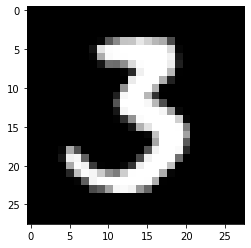

In [139]:
import matplotlib.pyplot as plt
# stddev = np.sqrt(1.0 / 128)

# z = torch.empty((2,128)).normal_(std=stddev)  
output = gen(z)
output_print = output[0]
plt.imshow(torch.squeeze(output_print).detach().numpy(), cmap='gray')
print(dis(output))

In [141]:
a = torch.randn((1,128))
a = a.clone().detach()
a.requires_grad = True
a.is_leaf
print(a.requires_grad)

True


In [142]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        net_dim = 64
        use_sn = False
        update_collection = None
        self.bn_linear = nn.BatchNorm1d(4*4*4*net_dim)
        self.relu = nn.ReLU()
        self.deconv_0 = nn.ConvTranspose2d(4*net_dim,2*net_dim,5,2, padding = 1)
        self.bn_0 = nn.BatchNorm2d(2*net_dim)
        self.deconv_1 = nn.ConvTranspose2d(2*net_dim,net_dim,5,2, padding = 1)
        self.bn_1 = nn.BatchNorm2d(net_dim)
        self.deconv_2 = nn.ConvTranspose2d(net_dim,1,5,2,padding = 1)
        self.linear = nn.Linear(128,4*4*4*net_dim)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        net_dim = 64
        output = self.linear(x)
        output = self.bn_linear(output)
        output = self.relu(output)
        output = output.view(-1,4,4,4*net_dim) #NHWC
        output = output.permute(0,3,1,2) #NCHW
        output = self.deconv_0(output)
        output = output.permute(0,2,3,1) #NHWC
        output = output[:,:8,:8,:] #(8,8)
        output = output.permute(0,3,1,2)
        output = self.bn_0(output) 
        output = self.relu(output)
        output = output.permute(0,2,3,1) #NHWC
        output = output[:,:7,:7,:] #(7,7)
        output = output.permute(0,3,1,2) #NHWC
        output = self.deconv_1(output) #(15,15)
        output = output[:,:,:14,:14]#(14,14)
        output = self.bn_1(output)
        output = self.relu(output)
        output = self.deconv_2(output) #(29,29)
        output = output[:,:,:28,:28] #(28,28)
        output = self.sigmoid(output)
        
        return output

    
class Surrogate(nn.Module):
    def __init__(self):
        super(Surrogate,self).__init__()
        net_dim = 64
        self.conv0 = nn.Conv2d(1,net_dim,5,2)
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(net_dim,2*net_dim,5,2)
        self.deconv_1 = nn.ConvTranspose2d(2*net_dim,net_dim,5,2, padding = 1)
        self.deconv_2 = nn.ConvTranspose2d(net_dim,1,5,2,padding = 1)
        self.bn_1 = nn.BatchNorm2d(net_dim)
        self.sigmoid = nn.Sigmoid()




    def forward(self,x):
        # x = (N,1,28,28)
        input_x = x
        net_dim = 64
        x = torch.nn.functional.pad(x, (1,2,1,2), mode='constant', value=0)
        output = self.conv0(x) 
        output = self.relu(output) #(N,64,14,14)
        output = torch.nn.functional.pad(output, (1,2,1,2), mode='constant', value=0)
        output = self.conv1(output)
        output = self.relu(output) #(N,128,7,7)
        #feed = (7,7)
        output = self.deconv_1(output) #(15,15)
        output = output[:,:,:14,:14]#(14,14)
        output = self.bn_1(output)
        output = self.relu(output)
        output = self.deconv_2(output) #(29,29)
        output = output[:,:,:28,:28] #(28,28)
        output = self.sigmoid(output)
        # print(output.shape,x.shape,"heloo")
        output = output+input_x #(skip connection)
        return output   #(N,1,28,28)


In [167]:

def abc(gen,surg,z_init):

    print(z_init[0])

    z_init = z_init.to("cpu")
    z_init.requires_grad = True
#     print(z_init.is_leaf)

    opt2 = torch.optim.Adam([z_init], lr=0.01)
    opt1 = torch.optim.Adam(surg.parameters(),lr = 0.002)
#     z_init = z_init.detach()
    for _ in range(5):
        print(z_init[0],"this is above")
        for i in range(5):
            opt1.zero_grad()
            k = gen(z_init)
            v = surg(k)
            loss = torch.sum(torch.mean(v*2,dim = (1,2,3)))
            loss.backward()
        #     print(z_init.grad)
            opt1.step()
        #     print(z_init[0])


        for _ in range(5):
            opt2.zero_grad()
            k = gen(z_init)
            v = surg(k)
            loss = torch.sum(torch.mean(v*2,dim = (1,2,3)))
            loss.backward()
            opt2.step()

        print(z_init[0],"this is below")

    
    

In [168]:
z_init = torch.randn((2,128))
gen = Generator()
surg = Surrogate()

abc(gen,surg,z_init)

tensor([ 0.4153,  1.4534,  1.0386, -0.7120,  1.5702,  0.7730,  1.4753,  0.3045,
        -1.1627, -0.2079, -0.3070, -0.1786,  0.2361, -1.5614,  0.8467,  0.5123,
         1.8950, -1.5881, -0.3939, -0.2880, -2.5304, -0.8318, -0.5239, -0.1632,
        -0.1972,  0.1579, -0.0786,  0.5737, -1.2407, -1.0773, -1.0788, -0.6366,
         0.8045,  0.6608, -0.6148, -0.3238, -2.0969,  1.9148, -0.3392, -0.7500,
        -0.9281,  0.4160,  1.1635, -0.9003, -0.0032, -0.4794, -0.9397, -1.1197,
         0.9646, -0.0613,  0.1492,  0.1723, -1.4711,  1.8949, -0.7830, -0.1646,
        -2.2651, -0.1166, -0.0996, -0.6046,  1.1002,  1.5474, -1.0741, -0.3724,
         0.3982, -0.4476,  0.7631, -0.8799, -0.9522,  0.0544, -0.5082, -0.8673,
        -0.4494,  1.3689, -0.6172,  0.3614,  0.3917,  0.3527, -0.1062, -0.6565,
         0.2947,  0.1982,  1.0956, -0.5553, -0.0293,  0.1094,  0.5310,  0.3471,
        -1.3918, -1.9585, -0.1175, -1.2449, -1.2833,  1.2860, -1.1237,  0.5375,
        -0.3343, -1.5599, -0.9120,  0.62

tensor([ 0.3770,  1.3965,  1.1247, -0.6378,  1.6240,  0.7879,  1.4847,  0.3691,
        -1.1625, -0.2378, -0.2999, -0.2739,  0.2996, -1.6011,  0.8094,  0.5372,
         1.8937, -1.5676, -0.4433, -0.3372, -2.5642, -0.7723, -0.5652, -0.1472,
        -0.1365,  0.1079, -0.0965,  0.6127, -1.2883, -1.0719, -0.9635, -0.6334,
         0.7846,  0.6510, -0.5505, -0.3015, -2.1872,  1.9547, -0.3899, -0.7674,
        -0.9421,  0.3128,  1.2624, -0.8369, -0.0388, -0.4313, -0.8918, -1.1103,
         0.9756, -0.0809,  0.1649,  0.1173, -1.4275,  1.8763, -0.7542, -0.1087,
        -2.1929, -0.1825, -0.1187, -0.6820,  1.0863,  1.5190, -0.9719, -0.3645,
         0.3717, -0.5401,  0.7686, -0.8958, -1.0560,  0.0168, -0.5953, -0.9247,
        -0.4401,  1.3273, -0.6677,  0.4187,  0.4025,  0.4239, -0.0365, -0.6436,
         0.2989,  0.2179,  1.0812, -0.6100, -0.0271,  0.1233,  0.6065,  0.2816,
        -1.3721, -1.8659, -0.0561, -1.2381, -1.2125,  1.3039, -1.1138,  0.4931,
        -0.3627, -1.5830, -0.8675,  0.61

In [ ]:
def batch_train_mg(surg,gen,dis,yobs,opt1,epoch,t = 15,t_1 = 10,t_2 = 10,yg = 0.08,z_init = None):


    batch_size = yobs.shape[0] #100
    latent_dim = 128
    if z_init == None:
        # z_init = torch.empty((batch_size,latent_dim)).normal_(std=stddev)  
        z_init = torch.randn((batch_size,latent_dim))
    
    yobs = yobs.to(device)

   

    z_init = z_init.to(device)
    z_init.requires_grad = True

  
    # opt2 = torch.optim.RMSprop([z_init],lr = yg)
    # opt2 = optim.SGD([z_init], lr=yg, momentum=0.7)
    opt2 = optim.Adam([z_init], lr=yg)

    for i in trange(t):
        
        # z_init = z_init.clone().detach()
        # print(z_init[0],f'outer loop is {i}')
        for _ in range(t_1):
            opt1.zero_grad()
            recon_pure_imgs = gen(z_init)
            recon_crpt_imgs = surg(recon_pure_imgs)
            loss = batch_loss(yobs,dis,recon_crpt_imgs,recon_pure_imgs)
            loss.backward(retain_graph = True)
            print(loss,epoch)
            opt1.step() #will update surg
        
        # print(z_init[0].grad, "this is emmm")


        # z_init = z_init.clone().detach()
        # z_init.requires_grad = True

        
        # for _ in range(t_2):
            
        #     opt2.zero_grad()
        #     recon_pure_imgs = gen(z_init)
        #     img_grid = torchvision.utils.make_grid(recon_pure_imgs[:15])
        #     writer.add_image("recons gen images :", img_grid,i)
        #     recon_crpt_imgs = surg(recon_pure_imgs)
        #     loss = batch_loss(yobs,dis,recon_crpt_imgs,recon_pure_imgs)
        #     loss.backward(retain_graph = True)
        #     # print(loss) 
        #     print(z_init[0].grad)
        #     opt2.step() #will update z_init
        #     z_init = torch.clamp(z_init, min = -1.0, max = 1.0)

        # print(z_init[0],f'outer loop is {i}')
          

    
    return (surg,recon_pure_imgs)


In [6]:
import torch 
z = torch.randn((1,128),requires_grad = True)
z = z.to("cuda:0")
z = z.clone().detach()
z.requires_grad = True
z.is_leaf
z.requires_grad

True

In [2]:
import torch 


In [4]:
a = torch.randn(2,1,28,28)
b = torch.randn(1,28,28)

a*b

tensor([[[[-7.2803e-01, -4.0230e-01, -1.3229e-01,  ..., -2.0779e-01,
           -1.7304e-01, -4.1926e-01],
          [ 2.1432e+00,  7.0885e-03, -2.9839e-01,  ..., -2.9815e-02,
            5.8157e-01, -6.3000e-01],
          [ 5.3359e-01, -5.1161e-01,  2.1197e+00,  ...,  1.6963e+00,
           -4.4955e-01,  1.8320e+00],
          ...,
          [ 2.7940e+00,  1.5937e-01,  6.2113e-02,  ..., -2.3054e-01,
            2.7775e+00, -4.7463e-04],
          [ 1.0533e+00, -6.9298e-01, -9.4802e-01,  ..., -1.2836e+00,
            4.5583e+00,  2.1755e-01],
          [ 7.7847e-02,  3.3707e-01, -1.2626e-01,  ...,  5.2004e-01,
           -1.9510e+00,  8.0899e-02]]],


        [[[ 1.8584e+00,  2.7746e-02,  2.0908e-01,  ...,  5.7131e-01,
           -6.7821e-01, -1.6569e+00],
          [ 9.3719e-01,  6.6212e-04,  1.2441e-01,  ..., -4.6022e-02,
           -4.4644e+00,  1.6158e+00],
          [-5.9056e-01,  2.4553e-01, -2.7653e+00,  ...,  1.0834e+00,
            4.6646e-01,  1.3191e+00],
          ...,
   

In [6]:
a = torch.nn.Parameter(torch.randn(1,28,28))
a.requires_grad
a.is_leaf

True